             ID  YEAR  MONTH  GRP1  GRP2  GRP3  GRP4  GRP5  GRP6  GRP7  ...  \
0  110000085731  2020      1     0     0     0     0     0     3     0  ...   
1  110000085731  2020      2     0     0     0     0     0     1     0  ...   
2  110000085731  2020      3     0     0     0     0     0     0     0  ...   
3  110000085731  2020      4     0     0     0     0     0     0     0  ...   
4  110000085731  2020      5     0     0     0     0     0     0     0  ...   

   GRP181  GRP182  GRP183  GRP184  GRP185  GRP186  GRP187  GRP188  GRP189  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   target  
0   17615  
1   21066  
2   47915  
3   88492  
4 

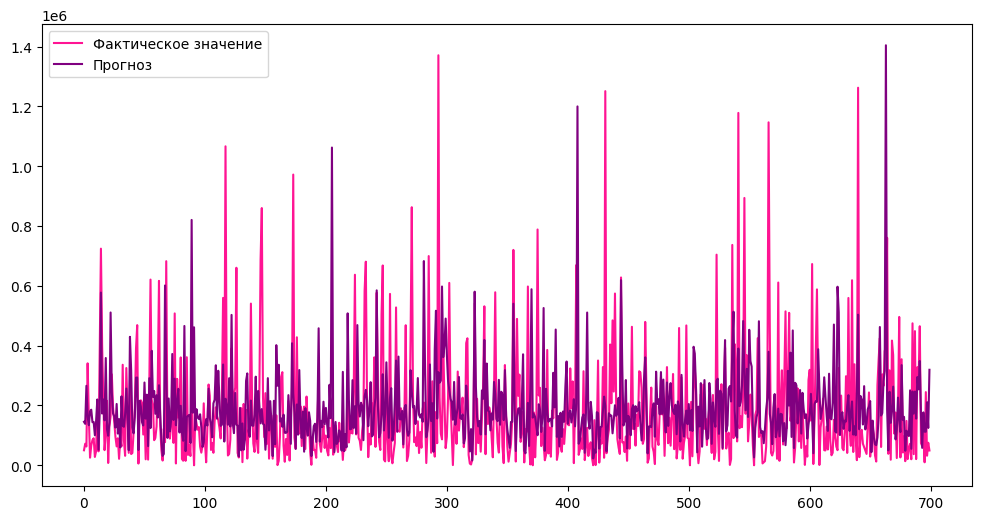

MAPE: 3.720038272716939e+18


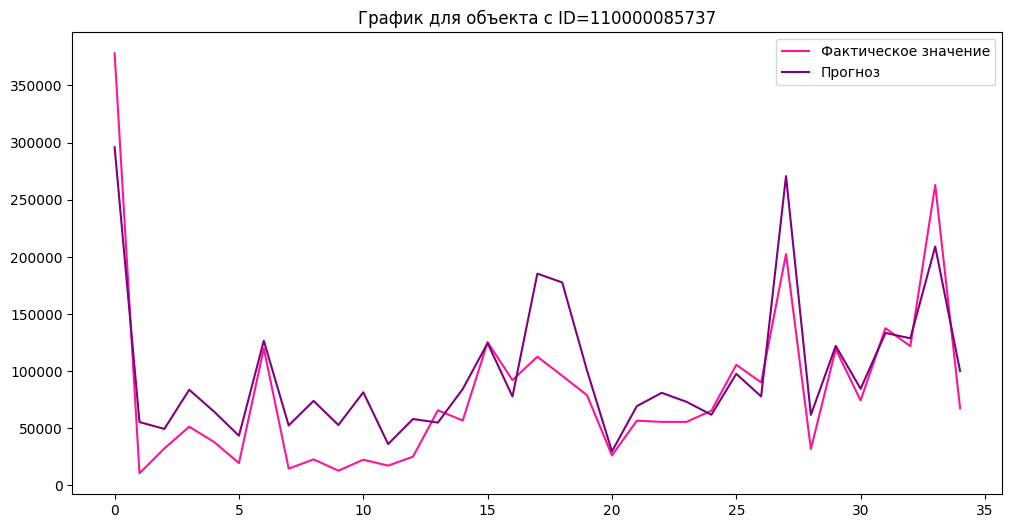

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt


data = pd.read_csv('1_train.csv')

print(data.head())
print(data.describe())

data['target'] = data['target'].shift(1, fill_value=0)

x = data.drop(['target'], axis=1)
y = data['target']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(x_train, y_train)

predictions = model.predict(x_val)

mape = mean_absolute_percentage_error(y_val, predictions)

plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Фактическое значение', color='deeppink')
plt.plot(predictions, label='Прогноз', color='purple')
plt.legend()
plt.show()

print(f'MAPE: {mape}')

model_full = RandomForestRegressor()
model_full.fit(x, y)

def plot_data_by_id(data, id):
    plt.figure(figsize=(12, 6))
    data_id = data[data['ID'] == id]
    plt.plot(data_id['target'].values, label='Фактическое значение', color='deeppink')
    predictions_id = model_full.predict(data_id.drop(columns=['target']))
    plt.plot(predictions_id, label='Прогноз', color='purple')
    plt.legend()
    plt.title(f'График для объекта с ID={id}')
    plt.show()


plot_data_by_id(data, 110000085737)


             ID  YEAR  MONTH  GRP1  GRP2  GRP3  GRP4  GRP5  GRP6  GRP7  ...  \
0  110000085731  2020      1     0     0     0     0     0     3     0  ...   
1  110000085731  2020      2     0     0     0     0     0     1     0  ...   
2  110000085731  2020      3     0     0     0     0     0     0     0  ...   
3  110000085731  2020      4     0     0     0     0     0     0     0  ...   
4  110000085731  2020      5     0     0     0     0     0     0     0  ...   

   GRP181  GRP182  GRP183  GRP184  GRP185  GRP186  GRP187  GRP188  GRP189  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   target  
0   17615  
1   21066  
2   47915  
3   88492  
4 

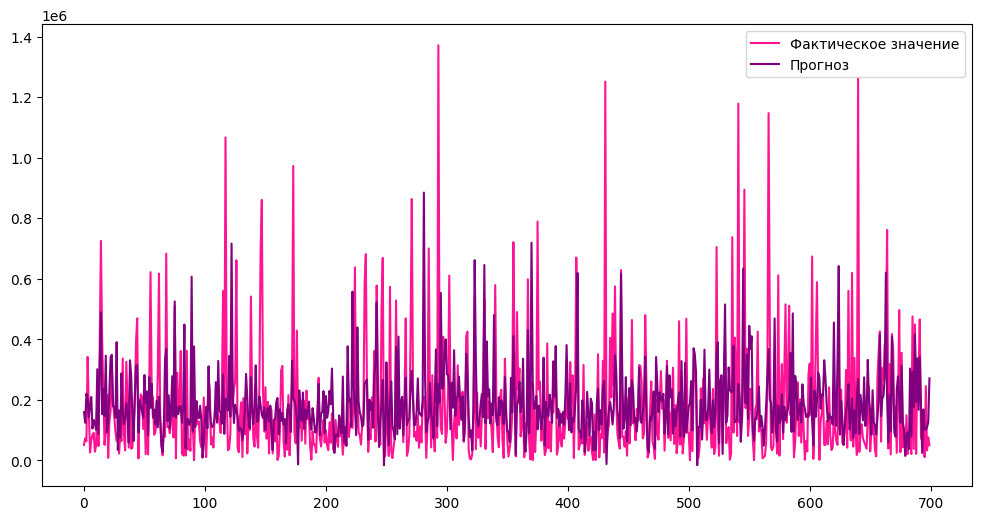

Learning rate set to 0.049905
0:	learn: 235277.4497645	total: 2.31ms	remaining: 2.31s
1:	learn: 234221.9709989	total: 4.02ms	remaining: 2.01s
2:	learn: 233337.0011463	total: 6.21ms	remaining: 2.06s
3:	learn: 232183.8366810	total: 8.34ms	remaining: 2.08s
4:	learn: 231280.4869989	total: 10.1ms	remaining: 2.01s
5:	learn: 230455.7870798	total: 12.4ms	remaining: 2.06s
6:	learn: 229309.7975800	total: 14.5ms	remaining: 2.06s
7:	learn: 228336.3605665	total: 17.7ms	remaining: 2.2s
8:	learn: 227243.1471072	total: 19.9ms	remaining: 2.19s
9:	learn: 226394.7657122	total: 22.9ms	remaining: 2.27s
10:	learn: 225573.5468102	total: 25.6ms	remaining: 2.3s
11:	learn: 224603.2113173	total: 27.6ms	remaining: 2.28s
12:	learn: 224048.5829160	total: 29.2ms	remaining: 2.21s
13:	learn: 223686.1300364	total: 31.2ms	remaining: 2.2s
14:	learn: 223042.7159163	total: 32.9ms	remaining: 2.16s
15:	learn: 222473.0750938	total: 34.3ms	remaining: 2.11s
16:	learn: 221677.0152978	total: 36ms	remaining: 2.08s
17:	learn: 22121

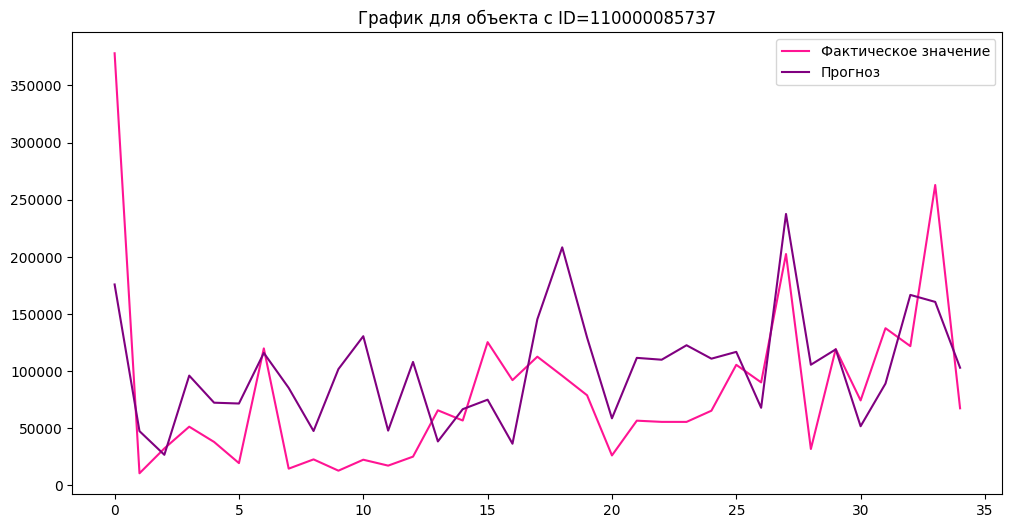

MAPE: 3.6225943595413325e+18


In [33]:
import pandas as pd
import numpy as np
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

data = pd.read_csv('1_train.csv')

print(data.head())
print(data.describe())

data['target'] = data['target'].shift(1, fill_value=0)

x = data.drop(['target'], axis=1)
y = data['target']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

model = CatBoostRegressor()
model.fit(x_train, y_train)

predictions = model.predict(x_val)

mape = mean_absolute_percentage_error(y_val, predictions)

plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Фактическое значение', color='deeppink')
plt.plot(predictions, label='Прогноз', color='purple')
plt.legend()
plt.show()



model_full = CatBoostRegressor()
model_full.fit(x, y)

def plot_data_by_id(data, id):
    plt.figure(figsize=(12, 6))
    data_id = data[data['ID'] == id]
    plt.plot(data_id['target'].values, label='Фактическое значение', color='deeppink')
    predictions_id = model_full.predict(data_id.drop(columns=['target']))
    plt.plot(predictions_id, label='Прогноз', color='purple')
    plt.legend()
    plt.title(f'График для объекта с ID={id}')
    plt.show()

plot_data_by_id(data, 110000085737)
print(f'MAPE: {mape}')

             ID  YEAR  MONTH  GRP1  GRP2  GRP3  GRP4  GRP5  GRP6  GRP7  ...  \
0  110000085731  2020      1     0     0     0     0     0     3     0  ...   
1  110000085731  2020      2     0     0     0     0     0     1     0  ...   
2  110000085731  2020      3     0     0     0     0     0     0     0  ...   
3  110000085731  2020      4     0     0     0     0     0     0     0  ...   
4  110000085731  2020      5     0     0     0     0     0     0     0  ...   

   GRP181  GRP182  GRP183  GRP184  GRP185  GRP186  GRP187  GRP188  GRP189  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   target  
0   17615  
1   21066  
2   47915  
3   88492  
4 

[I 2024-05-28 17:39:58,455] A new study created in memory with name: no-name-e048002f-763b-48f1-8c7e-928b56c4520e


                 ID         YEAR        MONTH         GRP1         GRP2  \
count  3.500000e+03  3500.000000  3500.000000  3500.000000  3500.000000   
mean   1.100001e+11  2020.971429     6.342857     0.033714     2.159143   
std    3.507248e+01     0.810256     3.372152     0.229331     6.068541   
min    1.100001e+11  2020.000000     1.000000     0.000000     0.000000   
25%    1.100001e+11  2020.000000     3.000000     0.000000     0.000000   
50%    1.100001e+11  2021.000000     6.000000     0.000000     0.000000   
75%    1.100001e+11  2022.000000     9.000000     0.000000     2.000000   
max    1.100001e+11  2022.000000    12.000000     3.000000    83.000000   

              GRP3         GRP4    GRP5         GRP6         GRP7  ...  \
count  3500.000000  3500.000000  3500.0  3500.000000  3500.000000  ...   
mean     11.384286     0.879429     0.0     5.454571     3.149429  ...   
std      32.260223     3.136010     0.0    16.806990    15.945040  ...   
min       0.000000     0.000

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


163:	learn: 219509.9479510	total: 150ms	remaining: 623ms
164:	learn: 219488.9210073	total: 151ms	remaining: 623ms
165:	learn: 219444.6862985	total: 151ms	remaining: 621ms
166:	learn: 219343.8023969	total: 152ms	remaining: 619ms
167:	learn: 219291.7521036	total: 153ms	remaining: 617ms
168:	learn: 219242.3787423	total: 153ms	remaining: 615ms
169:	learn: 219194.3958404	total: 155ms	remaining: 618ms
170:	learn: 219171.6021578	total: 156ms	remaining: 616ms
171:	learn: 219130.0203565	total: 157ms	remaining: 615ms
172:	learn: 218974.4087672	total: 157ms	remaining: 613ms
173:	learn: 218924.0924189	total: 158ms	remaining: 611ms
174:	learn: 218859.8154127	total: 159ms	remaining: 609ms
175:	learn: 218831.0557411	total: 159ms	remaining: 608ms
176:	learn: 218716.6997085	total: 160ms	remaining: 607ms
177:	learn: 218663.4820998	total: 161ms	remaining: 606ms
178:	learn: 218647.2463736	total: 162ms	remaining: 604ms
179:	learn: 218583.9645387	total: 164ms	remaining: 606ms
180:	learn: 218476.7809339	tota

[I 2024-05-28 17:39:59,403] Trial 0 finished with value: 2.8966808752525036e+18 and parameters: {'learning_rate': 0.03607037502129897, 'depth': 3, 'iterations': 847, 'l2_leaf_reg': 2.8589303081905024, 'random_state': 7}. Best is trial 0 with value: 2.8966808752525036e+18.


743:	learn: 189151.2681242	total: 682ms	remaining: 94.4ms
744:	learn: 189144.5020836	total: 684ms	remaining: 93.6ms
745:	learn: 189061.3195888	total: 685ms	remaining: 92.7ms
746:	learn: 188955.8165039	total: 685ms	remaining: 91.8ms
747:	learn: 188886.9709639	total: 686ms	remaining: 90.8ms
748:	learn: 188869.9432001	total: 687ms	remaining: 89.9ms
749:	learn: 188856.2556378	total: 689ms	remaining: 89.1ms
750:	learn: 188783.3015970	total: 689ms	remaining: 88.1ms
751:	learn: 188750.4347381	total: 690ms	remaining: 87.2ms
752:	learn: 188704.0490997	total: 691ms	remaining: 86.3ms
753:	learn: 188654.3435656	total: 693ms	remaining: 85.4ms
754:	learn: 188613.0366254	total: 694ms	remaining: 84.5ms
755:	learn: 188574.6938808	total: 694ms	remaining: 83.6ms
756:	learn: 188554.4223943	total: 696ms	remaining: 82.8ms
757:	learn: 188550.3298108	total: 697ms	remaining: 81.8ms
758:	learn: 188521.3704364	total: 698ms	remaining: 80.9ms
759:	learn: 188515.2041688	total: 699ms	remaining: 80ms
760:	learn: 1884

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


29:	learn: 220314.6666976	total: 35.9ms	remaining: 1.16s
30:	learn: 220041.5777016	total: 38.2ms	remaining: 1.19s
31:	learn: 219727.4804311	total: 39.5ms	remaining: 1.19s
32:	learn: 219362.7797706	total: 40.5ms	remaining: 1.18s
33:	learn: 219014.0328748	total: 41.3ms	remaining: 1.17s
34:	learn: 218813.1532356	total: 42.2ms	remaining: 1.16s
35:	learn: 218654.2679459	total: 43.2ms	remaining: 1.15s
36:	learn: 218305.2555406	total: 44.2ms	remaining: 1.15s
37:	learn: 218040.3819780	total: 45ms	remaining: 1.13s
38:	learn: 217672.0109839	total: 45.9ms	remaining: 1.12s
39:	learn: 217400.6325330	total: 46.7ms	remaining: 1.11s
40:	learn: 217078.4758648	total: 48.1ms	remaining: 1.12s
41:	learn: 216762.3221730	total: 49ms	remaining: 1.11s
42:	learn: 215296.0038823	total: 50ms	remaining: 1.11s
43:	learn: 214998.9430541	total: 51.1ms	remaining: 1.1s
44:	learn: 214875.3582566	total: 52ms	remaining: 1.1s
45:	learn: 214529.0728120	total: 52.8ms	remaining: 1.09s
46:	learn: 213803.0301124	total: 53.7ms	r

[I 2024-05-28 17:40:00,787] Trial 1 finished with value: 3.3619533753163894e+18 and parameters: {'learning_rate': 0.08928348820932479, 'depth': 3, 'iterations': 995, 'l2_leaf_reg': 0.19307614587216587, 'random_state': 5}. Best is trial 0 with value: 2.8966808752525036e+18.


945:	learn: 131495.5738441	total: 1.12s	remaining: 58.2ms
946:	learn: 131473.7822958	total: 1.12s	remaining: 57ms
947:	learn: 131453.3980684	total: 1.13s	remaining: 55.9ms
948:	learn: 131382.0832292	total: 1.13s	remaining: 54.7ms
949:	learn: 131344.8723265	total: 1.13s	remaining: 53.5ms
950:	learn: 131328.0801972	total: 1.13s	remaining: 52.3ms
951:	learn: 131314.5286991	total: 1.13s	remaining: 51.1ms
952:	learn: 131289.4614099	total: 1.13s	remaining: 49.9ms
953:	learn: 131258.9905890	total: 1.13s	remaining: 48.7ms
954:	learn: 131245.7233878	total: 1.13s	remaining: 47.5ms
955:	learn: 131226.8453240	total: 1.14s	remaining: 46.3ms
956:	learn: 131193.4342827	total: 1.14s	remaining: 45.1ms
957:	learn: 131145.8866375	total: 1.14s	remaining: 43.9ms
958:	learn: 131070.2633212	total: 1.14s	remaining: 42.7ms
959:	learn: 131044.4501647	total: 1.14s	remaining: 41.6ms
960:	learn: 130985.0853572	total: 1.14s	remaining: 40.4ms
961:	learn: 130932.2155544	total: 1.14s	remaining: 39.2ms
962:	learn: 1308

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


22:	learn: 204899.1996049	total: 80.8ms	remaining: 1.68s
23:	learn: 204051.1109773	total: 85ms	remaining: 1.69s
24:	learn: 202649.8835112	total: 88.1ms	remaining: 1.68s
25:	learn: 201487.8435006	total: 91.8ms	remaining: 1.68s
26:	learn: 198478.6444701	total: 98.4ms	remaining: 1.73s
27:	learn: 197787.2932232	total: 101ms	remaining: 1.71s
28:	learn: 197441.0491328	total: 113ms	remaining: 1.83s
29:	learn: 196226.3850656	total: 116ms	remaining: 1.82s
30:	learn: 196045.8514371	total: 119ms	remaining: 1.81s
31:	learn: 195843.7830979	total: 122ms	remaining: 1.79s
32:	learn: 195494.0339205	total: 125ms	remaining: 1.77s
33:	learn: 195364.6778617	total: 128ms	remaining: 1.76s
34:	learn: 194394.5299193	total: 130ms	remaining: 1.74s
35:	learn: 194240.8228374	total: 134ms	remaining: 1.73s
36:	learn: 193145.3184773	total: 136ms	remaining: 1.71s
37:	learn: 192692.4195928	total: 140ms	remaining: 1.7s
38:	learn: 192264.6436199	total: 143ms	remaining: 1.69s
39:	learn: 191827.5483850	total: 146ms	remaini

[I 2024-05-28 17:40:02,572] Trial 2 finished with value: 3.680583346183667e+18 and parameters: {'learning_rate': 0.14712633903390546, 'depth': 7, 'iterations': 501, 'l2_leaf_reg': 2.5246097033352597, 'random_state': 8}. Best is trial 0 with value: 2.8966808752525036e+18.


489:	learn: 73958.6561141	total: 1.59s	remaining: 35.6ms
490:	learn: 73734.2644238	total: 1.59s	remaining: 32.4ms
491:	learn: 73581.5996440	total: 1.59s	remaining: 29.1ms
492:	learn: 73380.7892791	total: 1.59s	remaining: 25.9ms
493:	learn: 73279.2652259	total: 1.6s	remaining: 22.6ms
494:	learn: 73131.3263066	total: 1.6s	remaining: 19.4ms
495:	learn: 73054.9942004	total: 1.6s	remaining: 16.2ms
496:	learn: 72994.2919180	total: 1.6s	remaining: 12.9ms
497:	learn: 72977.4791423	total: 1.61s	remaining: 9.68ms
498:	learn: 72819.5755688	total: 1.61s	remaining: 6.45ms
499:	learn: 72724.8105088	total: 1.61s	remaining: 3.23ms
500:	learn: 72718.9709752	total: 1.61s	remaining: 0us
0:	learn: 243159.4633099	total: 14.9ms	remaining: 12.6s
1:	learn: 239651.4055781	total: 37.7ms	remaining: 15.9s
2:	learn: 237760.8122863	total: 55.6ms	remaining: 15.6s
3:	learn: 235054.4912261	total: 75.1ms	remaining: 15.8s
4:	learn: 232110.8811225	total: 92.8ms	remaining: 15.6s
5:	learn: 229546.5230915	total: 110ms	remai

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


6:	learn: 226958.7213815	total: 130ms	remaining: 15.6s
7:	learn: 224749.7249767	total: 149ms	remaining: 15.6s
8:	learn: 222480.6184839	total: 168ms	remaining: 15.6s
9:	learn: 219176.0670540	total: 183ms	remaining: 15.3s
10:	learn: 217528.4433702	total: 202ms	remaining: 15.3s
11:	learn: 215427.6001972	total: 226ms	remaining: 15.7s
12:	learn: 212874.5269155	total: 242ms	remaining: 15.5s
13:	learn: 210675.9174297	total: 261ms	remaining: 15.4s
14:	learn: 208335.4870675	total: 278ms	remaining: 15.3s
15:	learn: 205596.0431180	total: 294ms	remaining: 15.2s
16:	learn: 204023.0871837	total: 310ms	remaining: 15.1s
17:	learn: 203185.1647261	total: 328ms	remaining: 15.1s
18:	learn: 201689.9707865	total: 349ms	remaining: 15.2s
19:	learn: 198795.1973949	total: 365ms	remaining: 15s
20:	learn: 197240.6646942	total: 380ms	remaining: 14.9s
21:	learn: 195711.3424332	total: 398ms	remaining: 14.9s
22:	learn: 194483.6417944	total: 413ms	remaining: 14.8s
23:	learn: 193211.0672679	total: 429ms	remaining: 14.7

[I 2024-05-28 17:40:15,346] Trial 3 finished with value: 3.001181862903756e+18 and parameters: {'learning_rate': 0.04980156684425926, 'depth': 10, 'iterations': 844, 'l2_leaf_reg': 0.28909459064679466, 'random_state': 96}. Best is trial 0 with value: 2.8966808752525036e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245283.7643386	total: 14.3ms	remaining: 9.04s
1:	learn: 244244.5347702	total: 31.3ms	remaining: 9.88s
2:	learn: 243509.8540129	total: 45.1ms	remaining: 9.48s
3:	learn: 242636.6485018	total: 58.2ms	remaining: 9.17s
4:	learn: 241493.3057722	total: 72.1ms	remaining: 9.07s
5:	learn: 240398.2751153	total: 86.5ms	remaining: 9.05s
6:	learn: 239209.1860963	total: 101ms	remaining: 9.05s
7:	learn: 238241.6769759	total: 113ms	remaining: 8.86s
8:	learn: 237138.3956065	total: 128ms	remaining: 8.86s
9:	learn: 236378.6657456	total: 141ms	remaining: 8.82s
10:	learn: 235423.6767213	total: 156ms	remaining: 8.85s
11:	learn: 234724.4494907	total: 170ms	remaining: 8.81s
12:	learn: 233759.9771992	total: 185ms	remaining: 8.84s
13:	learn: 232681.0649184	total: 206ms	remaining: 9.12s
14:	learn: 232018.9004145	total: 226ms	remaining: 9.34s
15:	learn: 230790.7226731	total: 245ms	remaining: 9.47s
16:	learn: 229948.9857040	total: 261ms	remaining: 9.47s
17:	learn: 229247.6850231	total: 277ms	remaining: 9.

[I 2024-05-28 17:40:25,876] Trial 4 finished with value: 2.8973343266428605e+18 and parameters: {'learning_rate': 0.01600455783769475, 'depth': 10, 'iterations': 634, 'l2_leaf_reg': 0.17630877362940356, 'random_state': 6}. Best is trial 0 with value: 2.8966808752525036e+18.


630:	learn: 102544.0479217	total: 10.2s	remaining: 48.5ms
631:	learn: 102429.1727415	total: 10.2s	remaining: 32.3ms
632:	learn: 102365.1639662	total: 10.2s	remaining: 16.2ms
633:	learn: 102200.5403030	total: 10.3s	remaining: 0us
0:	learn: 246170.5023821	total: 1.89ms	remaining: 863ms
1:	learn: 245873.9266621	total: 4.54ms	remaining: 1.03s
2:	learn: 245398.2811714	total: 6.76ms	remaining: 1.02s
3:	learn: 245188.2585782	total: 8.97ms	remaining: 1.01s
4:	learn: 244867.4079474	total: 11.9ms	remaining: 1.08s
5:	learn: 244611.2908135	total: 14ms	remaining: 1.05s
6:	learn: 244406.2621565	total: 15.7ms	remaining: 1.01s
7:	learn: 243914.1305216	total: 17.5ms	remaining: 982ms
8:	learn: 243728.3221167	total: 19.1ms	remaining: 952ms
9:	learn: 243400.8856985	total: 20.6ms	remaining: 922ms
10:	learn: 243033.4030612	total: 22.5ms	remaining: 914ms
11:	learn: 242624.7023787	total: 25.1ms	remaining: 930ms
12:	learn: 242224.9138539	total: 26.9ms	remaining: 919ms
13:	learn: 241814.8164721	total: 28.9ms	re

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


22:	learn: 239036.3895857	total: 45.1ms	remaining: 852ms
23:	learn: 238775.4337890	total: 47.6ms	remaining: 860ms
24:	learn: 238425.1959431	total: 49.9ms	remaining: 862ms
25:	learn: 238281.4584881	total: 51.9ms	remaining: 861ms
26:	learn: 238021.9928623	total: 54.1ms	remaining: 862ms
27:	learn: 237652.4754802	total: 57ms	remaining: 873ms
28:	learn: 237394.9402714	total: 59.6ms	remaining: 879ms
29:	learn: 237193.3005635	total: 61.4ms	remaining: 874ms
30:	learn: 236927.6704501	total: 63.7ms	remaining: 876ms
31:	learn: 236524.1426154	total: 66ms	remaining: 877ms
32:	learn: 236327.1815323	total: 70.7ms	remaining: 908ms
33:	learn: 236039.5484682	total: 72.8ms	remaining: 905ms
34:	learn: 235899.4899017	total: 74.9ms	remaining: 903ms
35:	learn: 235577.2705667	total: 77.4ms	remaining: 905ms
36:	learn: 235286.6647414	total: 79.8ms	remaining: 906ms
37:	learn: 234998.1099350	total: 82.5ms	remaining: 910ms
38:	learn: 234709.9400618	total: 85.2ms	remaining: 914ms
39:	learn: 234511.9528571	total: 87

[I 2024-05-28 17:40:27,147] Trial 5 finished with value: 2.524678436619772e+18 and parameters: {'learning_rate': 0.010739244456753883, 'depth': 6, 'iterations': 457, 'l2_leaf_reg': 0.483854436197578, 'random_state': 96}. Best is trial 5 with value: 2.524678436619772e+18.


385:	learn: 191552.8596283	total: 979ms	remaining: 180ms
386:	learn: 191485.2640527	total: 984ms	remaining: 178ms
387:	learn: 191368.8339693	total: 986ms	remaining: 175ms
388:	learn: 191309.3480588	total: 989ms	remaining: 173ms
389:	learn: 191282.6266168	total: 991ms	remaining: 170ms
390:	learn: 191266.9880039	total: 994ms	remaining: 168ms
391:	learn: 191248.4279112	total: 996ms	remaining: 165ms
392:	learn: 191214.5637626	total: 998ms	remaining: 162ms
393:	learn: 191140.2592387	total: 1s	remaining: 160ms
394:	learn: 191010.2738685	total: 1s	remaining: 157ms
395:	learn: 190913.8961585	total: 1.01s	remaining: 155ms
396:	learn: 190899.6805320	total: 1.01s	remaining: 152ms
397:	learn: 190835.4977016	total: 1.01s	remaining: 150ms
398:	learn: 190763.5853907	total: 1.01s	remaining: 147ms
399:	learn: 190730.9605239	total: 1.01s	remaining: 145ms
400:	learn: 190644.0617536	total: 1.02s	remaining: 142ms
401:	learn: 190602.6022663	total: 1.02s	remaining: 140ms
402:	learn: 190551.6048738	total: 1.0

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245629.2429681	total: 3.59ms	remaining: 1.69s
1:	learn: 244468.7288285	total: 7.82ms	remaining: 1.83s
2:	learn: 243151.2492385	total: 13.5ms	remaining: 2.11s
3:	learn: 242110.6472088	total: 17.8ms	remaining: 2.08s
4:	learn: 241019.9219228	total: 22.5ms	remaining: 2.1s
5:	learn: 239881.7357871	total: 28.1ms	remaining: 2.17s
6:	learn: 238947.1228120	total: 32.9ms	remaining: 2.18s
7:	learn: 237727.3642471	total: 38.2ms	remaining: 2.21s
8:	learn: 236778.9751545	total: 42.6ms	remaining: 2.19s
9:	learn: 235790.1529619	total: 47.4ms	remaining: 2.19s
10:	learn: 235120.2726508	total: 51.5ms	remaining: 2.15s
11:	learn: 234286.9350095	total: 55.8ms	remaining: 2.13s
12:	learn: 233499.2948976	total: 61ms	remaining: 2.15s
13:	learn: 233011.5995685	total: 66ms	remaining: 2.15s
14:	learn: 232414.0942821	total: 69.4ms	remaining: 2.11s
15:	learn: 231596.1333908	total: 73.8ms	remaining: 2.1s
16:	learn: 230938.5584986	total: 78.3ms	remaining: 2.09s
17:	learn: 230346.6774093	total: 82.7ms	remaini

[I 2024-05-28 17:40:29,820] Trial 6 finished with value: 3.041183119076352e+18 and parameters: {'learning_rate': 0.021270311378919975, 'depth': 8, 'iterations': 471, 'l2_leaf_reg': 0.3276373388833133, 'random_state': 54}. Best is trial 5 with value: 2.524678436619772e+18.


433:	learn: 140461.1066281	total: 2.35s	remaining: 201ms
434:	learn: 140236.1239090	total: 2.36s	remaining: 195ms
435:	learn: 139970.6132386	total: 2.37s	remaining: 190ms
436:	learn: 139741.6516244	total: 2.37s	remaining: 184ms
437:	learn: 139581.9198417	total: 2.38s	remaining: 179ms
438:	learn: 139521.2429204	total: 2.38s	remaining: 173ms
439:	learn: 139464.4565725	total: 2.38s	remaining: 168ms
440:	learn: 139397.1004007	total: 2.39s	remaining: 162ms
441:	learn: 139348.4401862	total: 2.39s	remaining: 157ms
442:	learn: 139224.7987018	total: 2.4s	remaining: 151ms
443:	learn: 139113.3276164	total: 2.4s	remaining: 146ms
444:	learn: 139027.6904734	total: 2.4s	remaining: 140ms
445:	learn: 138900.9623291	total: 2.41s	remaining: 135ms
446:	learn: 138729.5810418	total: 2.41s	remaining: 130ms
447:	learn: 138507.5194950	total: 2.42s	remaining: 124ms
448:	learn: 138295.7631774	total: 2.42s	remaining: 119ms
449:	learn: 138124.9502577	total: 2.42s	remaining: 113ms
450:	learn: 138060.4904342	total: 

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 240396.3361097	total: 4.21ms	remaining: 3.07s
1:	learn: 234871.1735749	total: 8.81ms	remaining: 3.21s
2:	learn: 231333.8160497	total: 14.9ms	remaining: 3.6s
3:	learn: 228446.6482935	total: 19.2ms	remaining: 3.49s
4:	learn: 228136.5829849	total: 23.4ms	remaining: 3.39s
5:	learn: 227790.2591572	total: 27.7ms	remaining: 3.34s
6:	learn: 225364.3053434	total: 31.9ms	remaining: 3.3s
7:	learn: 221971.1767151	total: 36ms	remaining: 3.25s
8:	learn: 221629.0992056	total: 41.7ms	remaining: 3.34s
9:	learn: 219722.2798230	total: 47ms	remaining: 3.38s
10:	learn: 219536.1028537	total: 51.9ms	remaining: 3.39s
11:	learn: 216986.0979954	total: 56.9ms	remaining: 3.4s
12:	learn: 214015.3824998	total: 62.3ms	remaining: 3.44s
13:	learn: 212926.3698647	total: 68.3ms	remaining: 3.49s
14:	learn: 212707.7732655	total: 73.6ms	remaining: 3.51s
15:	learn: 212550.1636754	total: 78.6ms	remaining: 3.51s
16:	learn: 212383.5708186	total: 83.4ms	remaining: 3.5s
17:	learn: 212232.4283498	total: 87.7ms	remaining

[I 2024-05-28 17:40:34,713] Trial 7 finished with value: 4.226816596343921e+18 and parameters: {'learning_rate': 0.278851319079688, 'depth': 8, 'iterations': 730, 'l2_leaf_reg': 8.577810226966285, 'random_state': 100}. Best is trial 5 with value: 2.524678436619772e+18.


709:	learn: 39345.2175224	total: 4.54s	remaining: 128ms
710:	learn: 39344.1156192	total: 4.54s	remaining: 121ms
711:	learn: 39333.5742186	total: 4.54s	remaining: 115ms
712:	learn: 39332.8012850	total: 4.55s	remaining: 108ms
713:	learn: 39331.9062633	total: 4.55s	remaining: 102ms
714:	learn: 39330.2705953	total: 4.56s	remaining: 95.6ms
715:	learn: 39178.1824558	total: 4.56s	remaining: 89.2ms
716:	learn: 39173.0801907	total: 4.56s	remaining: 82.8ms
717:	learn: 39093.3171812	total: 4.57s	remaining: 76.4ms
718:	learn: 39056.7417547	total: 4.57s	remaining: 70ms
719:	learn: 38931.6018892	total: 4.58s	remaining: 63.6ms
720:	learn: 38927.3864122	total: 4.58s	remaining: 57.2ms
721:	learn: 38769.7985611	total: 4.59s	remaining: 50.8ms
722:	learn: 38765.4132584	total: 4.59s	remaining: 44.4ms
723:	learn: 38764.5585329	total: 4.59s	remaining: 38.1ms
724:	learn: 38690.0654131	total: 4.6s	remaining: 31.7ms
725:	learn: 38689.2841261	total: 4.6s	remaining: 25.4ms
726:	learn: 38563.1057592	total: 4.61s	r

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


4:	learn: 194733.8079173	total: 51.6ms	remaining: 5.14s
5:	learn: 188283.3592498	total: 62.6ms	remaining: 5.2s
6:	learn: 185475.5567047	total: 77.4ms	remaining: 5.5s
7:	learn: 182269.1666336	total: 87.8ms	remaining: 5.44s
8:	learn: 179419.9202776	total: 98.4ms	remaining: 5.41s
9:	learn: 176551.8625709	total: 109ms	remaining: 5.38s
10:	learn: 170511.2828491	total: 126ms	remaining: 5.67s
11:	learn: 168118.1063446	total: 138ms	remaining: 5.64s
12:	learn: 167031.6864959	total: 149ms	remaining: 5.64s
13:	learn: 163775.1458452	total: 162ms	remaining: 5.68s
14:	learn: 161884.0698261	total: 187ms	remaining: 6.08s
15:	learn: 160258.6925799	total: 200ms	remaining: 6.1s
16:	learn: 157933.2586267	total: 212ms	remaining: 6.08s
17:	learn: 154394.8735698	total: 227ms	remaining: 6.13s
18:	learn: 153072.3876520	total: 238ms	remaining: 6.09s
19:	learn: 151623.6596597	total: 250ms	remaining: 6.04s
20:	learn: 150981.7813697	total: 263ms	remaining: 6.04s
21:	learn: 149664.8667425	total: 277ms	remaining: 6.

[I 2024-05-28 17:40:39,392] Trial 8 finished with value: 4.148754059109562e+18 and parameters: {'learning_rate': 0.3014943955185805, 'depth': 9, 'iterations': 504, 'l2_leaf_reg': 0.5761429667914647, 'random_state': 94}. Best is trial 5 with value: 2.524678436619772e+18.


498:	learn: 9036.5622559	total: 4.45s	remaining: 44.6ms
499:	learn: 9009.4533055	total: 4.46s	remaining: 35.7ms
500:	learn: 9004.6492088	total: 4.47s	remaining: 26.7ms
501:	learn: 8877.1139238	total: 4.47s	remaining: 17.8ms
502:	learn: 8848.4741902	total: 4.48s	remaining: 8.91ms
503:	learn: 8830.8088529	total: 4.49s	remaining: 0us
0:	learn: 234396.5793931	total: 2.18ms	remaining: 980ms
1:	learn: 226433.1600324	total: 4.03ms	remaining: 904ms
2:	learn: 225893.8155599	total: 5.58ms	remaining: 834ms
3:	learn: 223076.3119712	total: 7.39ms	remaining: 825ms
4:	learn: 222617.6499851	total: 9.44ms	remaining: 842ms
5:	learn: 218901.7945549	total: 12.6ms	remaining: 938ms
6:	learn: 214059.8446486	total: 14.9ms	remaining: 946ms
7:	learn: 213683.2275264	total: 16.8ms	remaining: 931ms
8:	learn: 212010.0361110	total: 18.8ms	remaining: 922ms
9:	learn: 210404.4805023	total: 20.4ms	remaining: 901ms
10:	learn: 208449.8470558	total: 22.4ms	remaining: 895ms
11:	learn: 208106.8914339	total: 24.1ms	remaining:

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


43:	learn: 162510.0946291	total: 90.4ms	remaining: 836ms
44:	learn: 161620.1793855	total: 92.4ms	remaining: 834ms
45:	learn: 159998.9859335	total: 94.4ms	remaining: 831ms
46:	learn: 159694.6491744	total: 96.3ms	remaining: 828ms
47:	learn: 157086.7395503	total: 98.4ms	remaining: 826ms
48:	learn: 156933.0191523	total: 100ms	remaining: 823ms
49:	learn: 156824.0337408	total: 102ms	remaining: 820ms
50:	learn: 155780.9816103	total: 105ms	remaining: 827ms
51:	learn: 154591.6231189	total: 108ms	remaining: 828ms
52:	learn: 153471.4463078	total: 110ms	remaining: 829ms
53:	learn: 151407.1948640	total: 112ms	remaining: 826ms
54:	learn: 151019.8976853	total: 114ms	remaining: 822ms
55:	learn: 150896.3137349	total: 116ms	remaining: 820ms
56:	learn: 150554.9273836	total: 119ms	remaining: 819ms
57:	learn: 149849.1321413	total: 121ms	remaining: 819ms
58:	learn: 149120.9061266	total: 123ms	remaining: 819ms
59:	learn: 148884.8456086	total: 125ms	remaining: 816ms
60:	learn: 148612.3127909	total: 127ms	rema

[I 2024-05-28 17:40:40,406] Trial 9 finished with value: 4.701899038281094e+18 and parameters: {'learning_rate': 0.5608332405217089, 'depth': 6, 'iterations': 451, 'l2_leaf_reg': 5.329008707152805, 'random_state': 32}. Best is trial 5 with value: 2.524678436619772e+18.


421:	learn: 49699.1092194	total: 841ms	remaining: 57.8ms
422:	learn: 49568.4177921	total: 843ms	remaining: 55.8ms
423:	learn: 49499.3322902	total: 845ms	remaining: 53.8ms
424:	learn: 49195.3634088	total: 847ms	remaining: 51.8ms
425:	learn: 49167.3483895	total: 849ms	remaining: 49.8ms
426:	learn: 49019.0184892	total: 851ms	remaining: 47.8ms
427:	learn: 48978.0116045	total: 853ms	remaining: 45.8ms
428:	learn: 48622.8456931	total: 855ms	remaining: 43.9ms
429:	learn: 48565.1657803	total: 858ms	remaining: 41.9ms
430:	learn: 48313.4470945	total: 859ms	remaining: 39.9ms
431:	learn: 48149.1054232	total: 861ms	remaining: 37.9ms
432:	learn: 48106.7658841	total: 863ms	remaining: 35.9ms
433:	learn: 47947.2196378	total: 865ms	remaining: 33.9ms
434:	learn: 47941.3956430	total: 867ms	remaining: 31.9ms
435:	learn: 47854.9086009	total: 869ms	remaining: 29.9ms
436:	learn: 47851.7385718	total: 871ms	remaining: 27.9ms
437:	learn: 47806.5898370	total: 872ms	remaining: 25.9ms
438:	learn: 47780.3158266	total

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


47:	learn: 234403.5782321	total: 65.5ms	remaining: 167ms
48:	learn: 234182.4745098	total: 67.4ms	remaining: 166ms
49:	learn: 234086.0712984	total: 69.1ms	remaining: 166ms
50:	learn: 233895.4565374	total: 70.9ms	remaining: 165ms
51:	learn: 233759.9100499	total: 72.3ms	remaining: 164ms
52:	learn: 233658.1437513	total: 73.7ms	remaining: 163ms
53:	learn: 233399.2466232	total: 75.1ms	remaining: 161ms
54:	learn: 233140.1063375	total: 82.1ms	remaining: 172ms
55:	learn: 232998.1793999	total: 83.5ms	remaining: 170ms
56:	learn: 232891.2546652	total: 84.9ms	remaining: 168ms
57:	learn: 232675.5287680	total: 86.5ms	remaining: 167ms
58:	learn: 232426.8628952	total: 87.9ms	remaining: 165ms
59:	learn: 232250.9598032	total: 89.3ms	remaining: 164ms
60:	learn: 232056.5546309	total: 91ms	remaining: 163ms
61:	learn: 231842.0590392	total: 92.4ms	remaining: 161ms
62:	learn: 231765.2103514	total: 93.9ms	remaining: 160ms
63:	learn: 231557.2346037	total: 96.7ms	remaining: 160ms
64:	learn: 231427.1508110	total: 

[I 2024-05-28 17:40:40,752] Trial 10 finished with value: 2.3051781490900086e+18 and parameters: {'learning_rate': 0.010971431364824195, 'depth': 5, 'iterations': 170, 'l2_leaf_reg': 1.092251344988997, 'random_state': 67}. Best is trial 10 with value: 2.3051781490900086e+18.


161:	learn: 218731.5063420	total: 250ms	remaining: 12.3ms
162:	learn: 218681.1228195	total: 251ms	remaining: 10.8ms
163:	learn: 218600.5911048	total: 253ms	remaining: 9.25ms
164:	learn: 218365.6647742	total: 255ms	remaining: 7.71ms
165:	learn: 218283.2416844	total: 256ms	remaining: 6.16ms
166:	learn: 218132.7418476	total: 257ms	remaining: 4.62ms
167:	learn: 218094.2290659	total: 259ms	remaining: 3.08ms
168:	learn: 217856.7096831	total: 260ms	remaining: 1.54ms
169:	learn: 217677.0838840	total: 262ms	remaining: 0us
0:	learn: 246117.8246186	total: 1.65ms	remaining: 259ms
1:	learn: 245801.8736859	total: 3.09ms	remaining: 241ms
2:	learn: 245541.7041884	total: 4.57ms	remaining: 236ms
3:	learn: 245290.2541927	total: 6.28ms	remaining: 242ms
4:	learn: 244979.6220543	total: 7.64ms	remaining: 234ms
5:	learn: 244770.6965715	total: 8.95ms	remaining: 227ms
6:	learn: 244479.4109576	total: 10.4ms	remaining: 224ms
7:	learn: 244133.1367991	total: 12.3ms	remaining: 232ms
8:	learn: 243965.0533576	total: 1

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
[I 2024-05-28 17:40:41,106] Trial 11 finished with value: 2.2782913052017482e+18 and parameters: {'learning_rate': 0.010116391914426221, 'depth': 5, 'iterations': 158, 'l2_leaf_reg': 1.0295046168983784, 'random_state': 71}. Best is trial 11 with value: 2.2782913052017482e+18.


71:	learn: 230113.6843463	total: 106ms	remaining: 127ms
72:	learn: 229976.7530427	total: 109ms	remaining: 126ms
73:	learn: 229773.8675668	total: 110ms	remaining: 125ms
74:	learn: 229591.5483924	total: 111ms	remaining: 123ms
75:	learn: 229500.5583615	total: 112ms	remaining: 121ms
76:	learn: 229349.0817379	total: 114ms	remaining: 120ms
77:	learn: 229186.1182269	total: 117ms	remaining: 120ms
78:	learn: 229078.2146200	total: 118ms	remaining: 118ms
79:	learn: 228825.2279254	total: 120ms	remaining: 117ms
80:	learn: 228671.5699432	total: 122ms	remaining: 116ms
81:	learn: 228482.9793598	total: 124ms	remaining: 115ms
82:	learn: 228368.8971212	total: 125ms	remaining: 113ms
83:	learn: 228204.7656124	total: 127ms	remaining: 112ms
84:	learn: 228002.0575235	total: 129ms	remaining: 111ms
85:	learn: 227836.6841392	total: 131ms	remaining: 110ms
86:	learn: 227786.1572242	total: 133ms	remaining: 108ms
87:	learn: 227650.6497389	total: 135ms	remaining: 107ms
88:	learn: 227445.5187713	total: 136ms	remaining

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246273.2730194	total: 1.35ms	remaining: 152ms
1:	learn: 245959.8440952	total: 2.88ms	remaining: 160ms
2:	learn: 245748.9105667	total: 4.63ms	remaining: 170ms
3:	learn: 245482.8721146	total: 6.12ms	remaining: 167ms
4:	learn: 245164.8734727	total: 7.63ms	remaining: 165ms
5:	learn: 244861.8672771	total: 8.97ms	remaining: 160ms
6:	learn: 244623.4130370	total: 10.4ms	remaining: 158ms
7:	learn: 244390.5795310	total: 11.8ms	remaining: 155ms
8:	learn: 244133.5181139	total: 13.2ms	remaining: 153ms
9:	learn: 243870.2515709	total: 15ms	remaining: 154ms
10:	learn: 243589.5625293	total: 16.5ms	remaining: 153ms
11:	learn: 243353.5030661	total: 18.7ms	remaining: 157ms
12:	learn: 243100.7708623	total: 20.7ms	remaining: 159ms
13:	learn: 242795.2413683	total: 22.5ms	remaining: 159ms
14:	learn: 242618.9032071	total: 24.1ms	remaining: 158ms
15:	learn: 242422.2636280	total: 25.8ms	remaining: 156ms
16:	learn: 242128.8939456	total: 27.3ms	remaining: 154ms
17:	learn: 241863.7497722	total: 29.3ms	rem

[I 2024-05-28 17:40:41,494] Trial 12 finished with value: 2.3058126947063926e+18 and parameters: {'learning_rate': 0.010319629291438993, 'depth': 5, 'iterations': 113, 'l2_leaf_reg': 1.3631246914796802, 'random_state': 66}. Best is trial 11 with value: 2.2782913052017482e+18.


92:	learn: 228590.4437869	total: 183ms	remaining: 39.4ms
93:	learn: 228380.5054889	total: 185ms	remaining: 37.4ms
94:	learn: 228204.5637475	total: 187ms	remaining: 35.4ms
95:	learn: 228068.4338093	total: 188ms	remaining: 33.3ms
96:	learn: 227985.6189042	total: 190ms	remaining: 31.3ms
97:	learn: 227882.9840773	total: 191ms	remaining: 29.3ms
98:	learn: 227697.8764248	total: 193ms	remaining: 27.3ms
99:	learn: 227621.0442706	total: 195ms	remaining: 25.3ms
100:	learn: 227493.2506350	total: 197ms	remaining: 23.4ms
101:	learn: 227370.0208880	total: 201ms	remaining: 21.7ms
102:	learn: 227304.6398847	total: 203ms	remaining: 19.7ms
103:	learn: 227205.5641771	total: 205ms	remaining: 17.7ms
104:	learn: 227047.4333546	total: 207ms	remaining: 15.8ms
105:	learn: 226958.9707603	total: 209ms	remaining: 13.8ms
106:	learn: 226904.6434616	total: 211ms	remaining: 11.8ms
107:	learn: 226816.1699126	total: 214ms	remaining: 9.88ms
108:	learn: 226644.6028559	total: 216ms	remaining: 7.91ms
109:	learn: 226517.311

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245705.2704859	total: 1.3ms	remaining: 133ms
1:	learn: 244903.2061596	total: 3.58ms	remaining: 181ms
2:	learn: 244212.5059710	total: 5.24ms	remaining: 175ms
3:	learn: 243528.7954917	total: 7.07ms	remaining: 175ms
4:	learn: 243118.4315182	total: 8.39ms	remaining: 165ms
5:	learn: 242692.6890434	total: 9.9ms	remaining: 160ms
6:	learn: 242069.8836102	total: 11.3ms	remaining: 155ms
7:	learn: 241597.4660368	total: 12.5ms	remaining: 148ms
8:	learn: 241068.1639443	total: 14.1ms	remaining: 147ms
9:	learn: 240406.2046863	total: 16ms	remaining: 148ms
10:	learn: 240050.1487091	total: 17.2ms	remaining: 144ms
11:	learn: 239574.7776019	total: 18.9ms	remaining: 143ms
12:	learn: 239212.0247679	total: 20.9ms	remaining: 145ms
13:	learn: 238494.1405112	total: 22.5ms	remaining: 143ms
14:	learn: 238137.8955096	total: 24.3ms	remaining: 142ms
15:	learn: 237803.1129576	total: 25.8ms	remaining: 140ms
16:	learn: 237377.6641736	total: 27.5ms	remaining: 139ms
17:	learn: 237022.3800917	total: 29.1ms	remai

[I 2024-05-28 17:40:41,812] Trial 13 finished with value: 2.368416257456357e+18 and parameters: {'learning_rate': 0.028615055315598395, 'depth': 4, 'iterations': 103, 'l2_leaf_reg': 1.0963380323332932, 'random_state': 73}. Best is trial 11 with value: 2.2782913052017482e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 244851.1918494	total: 2.22ms	remaining: 600ms
1:	learn: 243135.6837868	total: 5.06ms	remaining: 680ms
2:	learn: 241517.1754544	total: 6.91ms	remaining: 617ms
3:	learn: 239911.1651267	total: 12ms	remaining: 798ms
4:	learn: 238478.3907937	total: 14ms	remaining: 743ms
5:	learn: 236946.3361188	total: 15.7ms	remaining: 693ms
6:	learn: 236177.1488433	total: 17.3ms	remaining: 653ms
7:	learn: 235388.6492727	total: 19ms	remaining: 623ms
8:	learn: 234239.6379761	total: 20.8ms	remaining: 607ms
9:	learn: 233670.5383282	total: 22.3ms	remaining: 581ms
10:	learn: 232504.2982424	total: 23.9ms	remaining: 564ms
11:	learn: 231822.3301111	total: 25.4ms	remaining: 548ms
12:	learn: 231236.5972685	total: 29.9ms	remaining: 593ms
13:	learn: 230246.4644747	total: 31.5ms	remaining: 579ms
14:	learn: 229269.2070068	total: 33.8ms	remaining: 576ms
15:	learn: 228812.4074028	total: 35.7ms	remaining: 568ms
16:	learn: 228274.9925888	total: 37.6ms	remaining: 562ms
17:	learn: 228014.3813875	total: 40ms	remaining

[I 2024-05-28 17:40:42,487] Trial 14 finished with value: 2.8818808849089684e+18 and parameters: {'learning_rate': 0.06788781086582767, 'depth': 5, 'iterations': 271, 'l2_leaf_reg': 1.9137038354612117, 'random_state': 75}. Best is trial 11 with value: 2.2782913052017482e+18.


180:	learn: 182418.0014634	total: 371ms	remaining: 184ms
181:	learn: 182360.3812000	total: 373ms	remaining: 182ms
182:	learn: 182033.5577991	total: 374ms	remaining: 180ms
183:	learn: 182009.1033902	total: 376ms	remaining: 178ms
184:	learn: 181632.0383005	total: 378ms	remaining: 176ms
185:	learn: 181325.4248697	total: 380ms	remaining: 174ms
186:	learn: 181151.3057415	total: 382ms	remaining: 171ms
187:	learn: 180777.0966371	total: 384ms	remaining: 169ms
188:	learn: 180638.4217084	total: 386ms	remaining: 167ms
189:	learn: 180519.5380785	total: 388ms	remaining: 165ms
190:	learn: 180383.7320730	total: 391ms	remaining: 164ms
191:	learn: 180224.9612807	total: 393ms	remaining: 162ms
192:	learn: 179917.2236904	total: 395ms	remaining: 160ms
193:	learn: 179874.5452476	total: 399ms	remaining: 158ms
194:	learn: 179607.3135464	total: 401ms	remaining: 156ms
195:	learn: 179468.3772934	total: 403ms	remaining: 154ms
196:	learn: 179234.4142078	total: 404ms	remaining: 152ms
197:	learn: 179040.6081698	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246040.8939289	total: 1.71ms	remaining: 477ms
1:	learn: 245406.9598121	total: 3.46ms	remaining: 480ms
2:	learn: 244774.1830861	total: 4.99ms	remaining: 461ms
3:	learn: 244097.3513654	total: 7.01ms	remaining: 484ms
4:	learn: 243660.4346867	total: 8.86ms	remaining: 487ms
5:	learn: 243247.1041231	total: 10.8ms	remaining: 493ms
6:	learn: 242952.1548710	total: 12.8ms	remaining: 500ms
7:	learn: 242332.8535884	total: 14.6ms	remaining: 495ms
8:	learn: 241687.1922729	total: 16.2ms	remaining: 488ms
9:	learn: 241207.5185312	total: 18.2ms	remaining: 490ms
10:	learn: 240698.3920327	total: 19.5ms	remaining: 478ms
11:	learn: 240180.0252513	total: 21ms	remaining: 469ms
12:	learn: 239723.3286545	total: 22.8ms	remaining: 468ms
13:	learn: 239203.0145051	total: 24.7ms	remaining: 469ms
14:	learn: 238883.7448372	total: 27.5ms	remaining: 486ms
15:	learn: 238339.7158364	total: 29.1ms	remaining: 480ms
16:	learn: 238020.5770104	total: 30.6ms	remaining: 473ms
17:	learn: 237500.4120733	total: 31.9ms	rem

[I 2024-05-28 17:40:43,034] Trial 15 finished with value: 2.3238137222629105e+18 and parameters: {'learning_rate': 0.01787175442304265, 'depth': 5, 'iterations': 280, 'l2_leaf_reg': 0.7465415611410553, 'random_state': 41}. Best is trial 11 with value: 2.2782913052017482e+18.


237:	learn: 201243.1171491	total: 372ms	remaining: 65.7ms
238:	learn: 201128.6407433	total: 374ms	remaining: 64.1ms
239:	learn: 201073.5288611	total: 375ms	remaining: 62.5ms
240:	learn: 201021.0507454	total: 376ms	remaining: 60.9ms
241:	learn: 200990.7075999	total: 378ms	remaining: 59.3ms
242:	learn: 200923.8368079	total: 379ms	remaining: 57.7ms
243:	learn: 200716.3237487	total: 380ms	remaining: 56.1ms
244:	learn: 200591.8682683	total: 382ms	remaining: 54.5ms
245:	learn: 200502.7784416	total: 383ms	remaining: 53ms
246:	learn: 200434.9816700	total: 385ms	remaining: 51.4ms
247:	learn: 200268.8408509	total: 386ms	remaining: 49.9ms
248:	learn: 200198.0236990	total: 388ms	remaining: 48.3ms
249:	learn: 200137.5327668	total: 389ms	remaining: 46.7ms
250:	learn: 199956.6721298	total: 391ms	remaining: 45.1ms
251:	learn: 199918.7144365	total: 392ms	remaining: 43.6ms
252:	learn: 199831.0739883	total: 394ms	remaining: 42ms
253:	learn: 199776.6710360	total: 395ms	remaining: 40.5ms
254:	learn: 199620

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


57:	learn: 222567.2814832	total: 69ms	remaining: 240ms
58:	learn: 222509.8773863	total: 70.6ms	remaining: 240ms
59:	learn: 222288.3852669	total: 71.7ms	remaining: 239ms
60:	learn: 221904.5597144	total: 73.1ms	remaining: 238ms
61:	learn: 221482.4757868	total: 74.1ms	remaining: 237ms
62:	learn: 221329.9080097	total: 75ms	remaining: 235ms
63:	learn: 220886.7856571	total: 76.1ms	remaining: 233ms
64:	learn: 220429.4841702	total: 77.3ms	remaining: 232ms
65:	learn: 220276.5745193	total: 78.3ms	remaining: 230ms
66:	learn: 220039.0921058	total: 79.3ms	remaining: 229ms
67:	learn: 219951.2623887	total: 80.4ms	remaining: 227ms
68:	learn: 219855.5811942	total: 81.5ms	remaining: 226ms
69:	learn: 219607.5398010	total: 82.8ms	remaining: 225ms
70:	learn: 219518.0235660	total: 84.3ms	remaining: 224ms
71:	learn: 219106.0576887	total: 85.6ms	remaining: 224ms
72:	learn: 218892.9344193	total: 88.1ms	remaining: 226ms
73:	learn: 218613.8887654	total: 89.7ms	remaining: 225ms
74:	learn: 218374.2433335	total: 90

[I 2024-05-28 17:40:43,457] Trial 16 finished with value: 2.546382053336305e+18 and parameters: {'learning_rate': 0.03546964867110109, 'depth': 4, 'iterations': 260, 'l2_leaf_reg': 1.3045077091116926, 'random_state': 59}. Best is trial 11 with value: 2.2782913052017482e+18.


195:	learn: 201782.0949820	total: 249ms	remaining: 81.4ms
196:	learn: 201634.3994409	total: 251ms	remaining: 80.2ms
197:	learn: 201564.5687437	total: 252ms	remaining: 78.9ms
198:	learn: 201449.4460154	total: 253ms	remaining: 77.6ms
199:	learn: 201380.8782025	total: 254ms	remaining: 76.2ms
200:	learn: 201331.0509425	total: 255ms	remaining: 74.9ms
201:	learn: 201246.7448533	total: 256ms	remaining: 73.6ms
202:	learn: 201111.3460799	total: 257ms	remaining: 72.2ms
203:	learn: 200962.8947244	total: 258ms	remaining: 70.9ms
204:	learn: 200891.2561379	total: 259ms	remaining: 69.6ms
205:	learn: 200580.7493062	total: 261ms	remaining: 68.5ms
206:	learn: 200523.7103120	total: 263ms	remaining: 67.2ms
207:	learn: 200403.9432854	total: 264ms	remaining: 65.9ms
208:	learn: 200282.8156433	total: 265ms	remaining: 64.7ms
209:	learn: 200124.8627078	total: 267ms	remaining: 63.5ms
210:	learn: 199977.0984319	total: 268ms	remaining: 62.3ms
211:	learn: 199949.2139975	total: 270ms	remaining: 61ms
212:	learn: 1998

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 232385.1313824	total: 34.8ms	remaining: 12.4s
1:	learn: 222653.1975861	total: 38.4ms	remaining: 6.8s
2:	learn: 215399.3801178	total: 41.7ms	remaining: 4.9s
3:	learn: 210046.2591631	total: 45.1ms	remaining: 3.97s
4:	learn: 208938.6532448	total: 47.8ms	remaining: 3.36s
5:	learn: 208266.0458595	total: 50.3ms	remaining: 2.94s
6:	learn: 205883.1889660	total: 53.8ms	remaining: 2.68s
7:	learn: 201156.7220064	total: 56.6ms	remaining: 2.46s
8:	learn: 194219.4867595	total: 59.7ms	remaining: 2.3s
9:	learn: 191313.4035507	total: 63.5ms	remaining: 2.2s
10:	learn: 190420.8627923	total: 82.3ms	remaining: 2.58s
11:	learn: 183609.2095272	total: 86.3ms	remaining: 2.47s
12:	learn: 182950.9651893	total: 89ms	remaining: 2.35s
13:	learn: 181686.6566322	total: 92ms	remaining: 2.25s
14:	learn: 174646.3947149	total: 95.1ms	remaining: 2.16s
15:	learn: 174392.9006095	total: 97.9ms	remaining: 2.08s
16:	learn: 168686.3721348	total: 101ms	remaining: 2.02s
17:	learn: 165911.5317386	total: 104ms	remaining: 

[I 2024-05-28 17:40:44,762] Trial 17 finished with value: 3.068211715018996e+18 and parameters: {'learning_rate': 0.9277685312910098, 'depth': 7, 'iterations': 356, 'l2_leaf_reg': 4.360594570481718, 'random_state': 82}. Best is trial 11 with value: 2.2782913052017482e+18.


301:	learn: 27558.0905127	total: 991ms	remaining: 177ms
302:	learn: 27471.7966981	total: 994ms	remaining: 174ms
303:	learn: 27302.7311779	total: 996ms	remaining: 170ms
304:	learn: 27298.7462483	total: 999ms	remaining: 167ms
305:	learn: 27259.3011694	total: 1s	remaining: 164ms
306:	learn: 27146.0873535	total: 1s	remaining: 160ms
307:	learn: 27135.4132317	total: 1.01s	remaining: 157ms
308:	learn: 27110.6925157	total: 1.01s	remaining: 154ms
309:	learn: 27107.0816198	total: 1.01s	remaining: 150ms
310:	learn: 27104.3973765	total: 1.01s	remaining: 147ms
311:	learn: 27032.2363432	total: 1.02s	remaining: 144ms
312:	learn: 26817.9816685	total: 1.02s	remaining: 140ms
313:	learn: 26758.0444872	total: 1.02s	remaining: 137ms
314:	learn: 26598.9368857	total: 1.03s	remaining: 134ms
315:	learn: 26468.9200303	total: 1.03s	remaining: 130ms
316:	learn: 26403.8827730	total: 1.03s	remaining: 127ms
317:	learn: 26343.2440048	total: 1.03s	remaining: 124ms
318:	learn: 26134.9371745	total: 1.04s	remaining: 120m

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246122.0334328	total: 1.5ms	remaining: 251ms
1:	learn: 245846.1029310	total: 2.9ms	remaining: 240ms
2:	learn: 245522.0396849	total: 4.18ms	remaining: 230ms
3:	learn: 245247.6570004	total: 5.39ms	remaining: 221ms
4:	learn: 244967.4073785	total: 6.67ms	remaining: 217ms
5:	learn: 244611.9197399	total: 7.98ms	remaining: 216ms
6:	learn: 244352.5199444	total: 9.42ms	remaining: 217ms
7:	learn: 243976.2591403	total: 10.8ms	remaining: 217ms
8:	learn: 243492.9220876	total: 12.3ms	remaining: 218ms
9:	learn: 243107.9233980	total: 13.9ms	remaining: 220ms
10:	learn: 242819.7150703	total: 15.2ms	remaining: 217ms
11:	learn: 242554.2167825	total: 16.4ms	remaining: 213ms
12:	learn: 242118.4261039	total: 17.6ms	remaining: 210ms
13:	learn: 241770.0377217	total: 18.8ms	remaining: 206ms
14:	learn: 241530.2578590	total: 20.2ms	remaining: 206ms
15:	learn: 241195.4752043	total: 21.7ms	remaining: 206ms
16:	learn: 240788.6307769	total: 23.2ms	remaining: 206ms
17:	learn: 240470.8659112	total: 24.7ms	rem

[I 2024-05-28 17:40:45,075] Trial 18 finished with value: 2.301121788048858e+18 and parameters: {'learning_rate': 0.014305614605585625, 'depth': 4, 'iterations': 168, 'l2_leaf_reg': 0.8161211793474188, 'random_state': 43}. Best is trial 11 with value: 2.2782913052017482e+18.


140:	learn: 220552.4054866	total: 184ms	remaining: 35.2ms
141:	learn: 220480.3395920	total: 185ms	remaining: 33.9ms
142:	learn: 220290.3231105	total: 186ms	remaining: 32.6ms
143:	learn: 220238.5151172	total: 187ms	remaining: 31.2ms
144:	learn: 220149.4999904	total: 188ms	remaining: 29.9ms
145:	learn: 219982.5156022	total: 189ms	remaining: 28.5ms
146:	learn: 219917.1895322	total: 191ms	remaining: 27.2ms
147:	learn: 219720.1814909	total: 192ms	remaining: 25.9ms
148:	learn: 219620.2782534	total: 193ms	remaining: 24.6ms
149:	learn: 219537.6822473	total: 194ms	remaining: 23.3ms
150:	learn: 219496.1072029	total: 195ms	remaining: 22ms
151:	learn: 219378.3399117	total: 197ms	remaining: 20.7ms
152:	learn: 219283.9831268	total: 198ms	remaining: 19.4ms
153:	learn: 219082.0240898	total: 200ms	remaining: 18.1ms
154:	learn: 218991.0912920	total: 201ms	remaining: 16.9ms
155:	learn: 218956.7383026	total: 203ms	remaining: 15.6ms
156:	learn: 218823.3852351	total: 205ms	remaining: 14.4ms
157:	learn: 2187

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


55:	learn: 188891.4344276	total: 71.8ms	remaining: 394ms
56:	learn: 188441.8006012	total: 73.1ms	remaining: 392ms
57:	learn: 188046.1361582	total: 74.1ms	remaining: 390ms
58:	learn: 187530.4693750	total: 75.5ms	remaining: 389ms
59:	learn: 186993.9375312	total: 76.8ms	remaining: 388ms
60:	learn: 186041.8316512	total: 78ms	remaining: 386ms
61:	learn: 185415.4251195	total: 79.2ms	remaining: 384ms
62:	learn: 184682.6317672	total: 80.4ms	remaining: 383ms
63:	learn: 184429.1843248	total: 81.8ms	remaining: 382ms
64:	learn: 183494.7151668	total: 83.2ms	remaining: 381ms
65:	learn: 183202.3667535	total: 84.5ms	remaining: 380ms
66:	learn: 182462.5609709	total: 86.1ms	remaining: 380ms
67:	learn: 181942.3028005	total: 88.7ms	remaining: 385ms
68:	learn: 181749.3110630	total: 92.2ms	remaining: 393ms
69:	learn: 181490.9316973	total: 93.6ms	remaining: 392ms
70:	learn: 181102.3344750	total: 94.9ms	remaining: 390ms
71:	learn: 180641.4453075	total: 96.3ms	remaining: 389ms
72:	learn: 180438.9273105	total: 

[I 2024-05-28 17:40:45,696] Trial 19 finished with value: 3.1119188934976256e+18 and parameters: {'learning_rate': 0.15921031967317886, 'depth': 4, 'iterations': 363, 'l2_leaf_reg': 0.12875220681908553, 'random_state': 27}. Best is trial 11 with value: 2.2782913052017482e+18.


323:	learn: 123597.8499238	total: 435ms	remaining: 52.4ms
324:	learn: 123504.7950845	total: 437ms	remaining: 51.1ms
325:	learn: 123434.7887729	total: 438ms	remaining: 49.7ms
326:	learn: 123342.1235314	total: 439ms	remaining: 48.3ms
327:	learn: 123234.0075877	total: 440ms	remaining: 47ms
328:	learn: 123164.7760880	total: 441ms	remaining: 45.6ms
329:	learn: 123063.2050368	total: 442ms	remaining: 44.2ms
330:	learn: 122953.3919193	total: 443ms	remaining: 42.9ms
331:	learn: 122818.2692550	total: 444ms	remaining: 41.5ms
332:	learn: 122755.6532527	total: 446ms	remaining: 40.2ms
333:	learn: 122688.5806198	total: 447ms	remaining: 38.8ms
334:	learn: 122649.8850877	total: 448ms	remaining: 37.4ms
335:	learn: 122259.4866087	total: 450ms	remaining: 36.2ms
336:	learn: 122155.3254483	total: 451ms	remaining: 34.8ms
337:	learn: 122062.8705486	total: 452ms	remaining: 33.5ms
338:	learn: 122026.5020427	total: 454ms	remaining: 32.1ms
339:	learn: 121906.8625555	total: 455ms	remaining: 30.8ms
340:	learn: 1217

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


57:	learn: 228747.0109813	total: 62.4ms	remaining: 153ms
58:	learn: 228500.0689801	total: 63.8ms	remaining: 153ms
59:	learn: 228410.4817216	total: 65.2ms	remaining: 152ms
60:	learn: 228280.7151743	total: 67.5ms	remaining: 154ms
61:	learn: 228165.9941564	total: 68.5ms	remaining: 153ms
62:	learn: 227917.9153079	total: 69.6ms	remaining: 151ms
63:	learn: 227782.1046590	total: 70.6ms	remaining: 150ms
64:	learn: 227479.1154518	total: 71.8ms	remaining: 149ms
65:	learn: 227337.7239376	total: 72.8ms	remaining: 148ms
66:	learn: 227232.1101245	total: 73.9ms	remaining: 147ms
67:	learn: 226928.3659046	total: 75.1ms	remaining: 146ms
68:	learn: 226845.5439529	total: 76.2ms	remaining: 145ms
69:	learn: 226725.4471680	total: 77.3ms	remaining: 144ms
70:	learn: 226465.1227709	total: 78.5ms	remaining: 143ms
71:	learn: 226181.2825459	total: 79.9ms	remaining: 142ms
72:	learn: 226095.4415394	total: 81.3ms	remaining: 141ms
73:	learn: 225818.7026824	total: 82.5ms	remaining: 140ms
74:	learn: 225725.3124055	total

[I 2024-05-28 17:40:46,030] Trial 20 finished with value: 2.2691664617534577e+18 and parameters: {'learning_rate': 0.017908343849574997, 'depth': 4, 'iterations': 200, 'l2_leaf_reg': 0.7208041425313375, 'random_state': 46}. Best is trial 20 with value: 2.2691664617534577e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246157.5653762	total: 1.1ms	remaining: 224ms
1:	learn: 245789.6525156	total: 2.26ms	remaining: 228ms
2:	learn: 245297.1874540	total: 3.16ms	remaining: 212ms
3:	learn: 244924.6742999	total: 4.09ms	remaining: 204ms
4:	learn: 244658.7850260	total: 5.06ms	remaining: 201ms
5:	learn: 244364.6514435	total: 5.99ms	remaining: 198ms
6:	learn: 243974.0253589	total: 7.48ms	remaining: 210ms
7:	learn: 243569.4428715	total: 8.68ms	remaining: 213ms
8:	learn: 243256.7809915	total: 10ms	remaining: 217ms
9:	learn: 242922.9574217	total: 11.3ms	remaining: 220ms
10:	learn: 242573.8086119	total: 14.8ms	remaining: 259ms
11:	learn: 242358.0517401	total: 15.9ms	remaining: 255ms
12:	learn: 242060.3326912	total: 17.3ms	remaining: 254ms
13:	learn: 241757.3830322	total: 18.7ms	remaining: 253ms
14:	learn: 241401.7691508	total: 19.9ms	remaining: 251ms
15:	learn: 241169.4746659	total: 21ms	remaining: 247ms
16:	learn: 240894.6740468	total: 22.1ms	remaining: 243ms
17:	learn: 240616.1115289	total: 23.9ms	remain

[I 2024-05-28 17:40:46,400] Trial 21 finished with value: 2.2259609558079089e+18 and parameters: {'learning_rate': 0.019223300890649022, 'depth': 3, 'iterations': 204, 'l2_leaf_reg': 0.7157073678885506, 'random_state': 45}. Best is trial 21 with value: 2.2259609558079089e+18.


175:	learn: 221738.7041189	total: 180ms	remaining: 28.7ms
176:	learn: 221709.5869811	total: 182ms	remaining: 27.7ms
177:	learn: 221666.1647270	total: 182ms	remaining: 26.7ms
178:	learn: 221603.3022147	total: 183ms	remaining: 25.6ms
179:	learn: 221534.4979015	total: 184ms	remaining: 24.6ms
180:	learn: 221395.1437266	total: 185ms	remaining: 23.6ms
181:	learn: 221323.3431886	total: 186ms	remaining: 22.5ms
182:	learn: 221270.1317980	total: 187ms	remaining: 21.5ms
183:	learn: 221235.5197958	total: 188ms	remaining: 20.5ms
184:	learn: 221185.4257619	total: 189ms	remaining: 19.5ms
185:	learn: 221105.9733627	total: 190ms	remaining: 18.4ms
186:	learn: 220912.8887687	total: 191ms	remaining: 17.4ms
187:	learn: 220874.0486887	total: 192ms	remaining: 16.4ms
188:	learn: 220853.2945864	total: 193ms	remaining: 15.3ms
189:	learn: 220618.5479430	total: 194ms	remaining: 14.3ms
190:	learn: 220528.7824227	total: 196ms	remaining: 13.3ms
191:	learn: 220494.7649046	total: 197ms	remaining: 12.3ms
192:	learn: 22

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


1:	learn: 245509.6983981	total: 3.5ms	remaining: 355ms
2:	learn: 245000.3553925	total: 5.34ms	remaining: 360ms
3:	learn: 244513.1252903	total: 6.35ms	remaining: 319ms
4:	learn: 244116.6171932	total: 7.36ms	remaining: 294ms
5:	learn: 243762.6791928	total: 8.35ms	remaining: 277ms
6:	learn: 243380.2737945	total: 9.34ms	remaining: 264ms
7:	learn: 243053.7903794	total: 10.6ms	remaining: 261ms
8:	learn: 242658.8907159	total: 11.6ms	remaining: 252ms
9:	learn: 242221.9693018	total: 12.8ms	remaining: 249ms
10:	learn: 241895.7614556	total: 13.9ms	remaining: 246ms
11:	learn: 241516.9334502	total: 15ms	remaining: 242ms
12:	learn: 241216.3321199	total: 16.1ms	remaining: 238ms
13:	learn: 240868.7996219	total: 17.2ms	remaining: 234ms
14:	learn: 240550.0370880	total: 18.4ms	remaining: 233ms
15:	learn: 240263.3457339	total: 19.8ms	remaining: 234ms
16:	learn: 240065.6478819	total: 21.2ms	remaining: 234ms
17:	learn: 239758.5971783	total: 22.5ms	remaining: 234ms
18:	learn: 239548.4569678	total: 23.8ms	rem

[I 2024-05-28 17:40:46,771] Trial 22 finished with value: 2.288215867722527e+18 and parameters: {'learning_rate': 0.023795979850849157, 'depth': 3, 'iterations': 205, 'l2_leaf_reg': 0.43164599981203433, 'random_state': 47}. Best is trial 21 with value: 2.2259609558079089e+18.


167:	learn: 216594.6007700	total: 183ms	remaining: 40.4ms
168:	learn: 216547.1437059	total: 185ms	remaining: 39.4ms
169:	learn: 216503.2115598	total: 186ms	remaining: 38.3ms
170:	learn: 216459.1990448	total: 187ms	remaining: 37.2ms
171:	learn: 216419.5151957	total: 188ms	remaining: 36.1ms
172:	learn: 216381.4405759	total: 189ms	remaining: 35ms
173:	learn: 216309.1177076	total: 190ms	remaining: 33.9ms
174:	learn: 215979.8473673	total: 192ms	remaining: 32.8ms
175:	learn: 215933.7703138	total: 192ms	remaining: 31.7ms
176:	learn: 215721.4801063	total: 193ms	remaining: 30.6ms
177:	learn: 215637.9914949	total: 194ms	remaining: 29.5ms
178:	learn: 215559.9625269	total: 195ms	remaining: 28.4ms
179:	learn: 215368.6331852	total: 196ms	remaining: 27.2ms
180:	learn: 215339.4433409	total: 197ms	remaining: 26.2ms
181:	learn: 215273.0292132	total: 199ms	remaining: 25.1ms
182:	learn: 215255.9182807	total: 200ms	remaining: 24ms
183:	learn: 215219.3575772	total: 202ms	remaining: 23ms
184:	learn: 215191.1

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


72:	learn: 220118.3506257	total: 62.3ms	remaining: 226ms
73:	learn: 220005.0889207	total: 63.4ms	remaining: 226ms
74:	learn: 219927.2277041	total: 64.3ms	remaining: 225ms
75:	learn: 219820.8260292	total: 65.1ms	remaining: 225ms
76:	learn: 219705.6938567	total: 66ms	remaining: 224ms
77:	learn: 219561.7927908	total: 66.7ms	remaining: 222ms
78:	learn: 219492.1064903	total: 67.7ms	remaining: 222ms
79:	learn: 219430.1886073	total: 68.6ms	remaining: 221ms
80:	learn: 218788.3346802	total: 69.6ms	remaining: 221ms
81:	learn: 218739.9518073	total: 70.5ms	remaining: 220ms
82:	learn: 218670.8082338	total: 71.4ms	remaining: 219ms
83:	learn: 218239.0764420	total: 72.4ms	remaining: 219ms
84:	learn: 218002.9245280	total: 73.5ms	remaining: 219ms
85:	learn: 217813.0689825	total: 74.6ms	remaining: 218ms
86:	learn: 217717.2599019	total: 75.5ms	remaining: 218ms
87:	learn: 217682.1640720	total: 76.4ms	remaining: 217ms
88:	learn: 217651.2402930	total: 77.7ms	remaining: 217ms
89:	learn: 217486.5885618	total: 

[I 2024-05-28 17:40:47,210] Trial 23 finished with value: 2.7299321801425526e+18 and parameters: {'learning_rate': 0.049370269438650034, 'depth': 3, 'iterations': 338, 'l2_leaf_reg': 0.6225517817386959, 'random_state': 30}. Best is trial 21 with value: 2.2259609558079089e+18.


256:	learn: 196791.3202127	total: 244ms	remaining: 76.8ms
257:	learn: 196735.1619692	total: 245ms	remaining: 76ms
258:	learn: 196627.2661977	total: 246ms	remaining: 75.1ms
259:	learn: 196530.5569414	total: 249ms	remaining: 74.6ms
260:	learn: 196454.4577401	total: 250ms	remaining: 73.7ms
261:	learn: 196281.9310692	total: 251ms	remaining: 72.7ms
262:	learn: 196179.1379761	total: 252ms	remaining: 71.8ms
263:	learn: 196109.5765047	total: 253ms	remaining: 70.8ms
264:	learn: 195945.8852952	total: 254ms	remaining: 69.9ms
265:	learn: 195850.6366906	total: 255ms	remaining: 68.9ms
266:	learn: 195360.5622558	total: 256ms	remaining: 68ms
267:	learn: 195279.5407950	total: 257ms	remaining: 67ms
268:	learn: 195261.6880438	total: 257ms	remaining: 66ms
269:	learn: 195106.3836117	total: 258ms	remaining: 65.1ms
270:	learn: 195042.8867299	total: 259ms	remaining: 64.1ms
271:	learn: 194978.9273427	total: 260ms	remaining: 63.2ms
272:	learn: 194833.2067530	total: 262ms	remaining: 62.3ms
273:	learn: 194799.324

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


20:	learn: 239176.6431120	total: 32.2ms	remaining: 320ms
21:	learn: 238864.0084083	total: 33.5ms	remaining: 317ms
22:	learn: 238701.2353644	total: 34.4ms	remaining: 310ms
23:	learn: 238426.4829404	total: 35.4ms	remaining: 304ms
24:	learn: 238191.9746938	total: 36.4ms	remaining: 298ms
25:	learn: 237950.8330289	total: 37.8ms	remaining: 297ms
26:	learn: 237759.1279726	total: 38.8ms	remaining: 292ms
27:	learn: 237525.8646820	total: 39.9ms	remaining: 288ms
28:	learn: 237348.7913259	total: 40.9ms	remaining: 283ms
29:	learn: 237096.7238973	total: 41.9ms	remaining: 280ms
30:	learn: 236803.1378434	total: 43.7ms	remaining: 280ms
31:	learn: 236654.7353363	total: 44.8ms	remaining: 277ms
32:	learn: 236402.2760267	total: 45.9ms	remaining: 274ms
33:	learn: 236116.0041408	total: 47.3ms	remaining: 273ms
34:	learn: 235820.5947098	total: 48.9ms	remaining: 272ms
35:	learn: 235515.8712809	total: 50.9ms	remaining: 274ms
36:	learn: 235296.3855540	total: 52.5ms	remaining: 274ms
37:	learn: 235094.5283279	total

[I 2024-05-28 17:40:47,725] Trial 24 finished with value: 2.2316680123526198e+18 and parameters: {'learning_rate': 0.01651578932981558, 'depth': 4, 'iterations': 230, 'l2_leaf_reg': 1.6650146118122415, 'random_state': 58}. Best is trial 21 with value: 2.2259609558079089e+18.


229:	learn: 214779.5692446	total: 400ms	remaining: 0us
0:	learn: 245740.3739494	total: 1.09ms	remaining: 653ms
1:	learn: 244879.5286394	total: 2.09ms	remaining: 627ms
2:	learn: 244337.3779399	total: 3.09ms	remaining: 617ms
3:	learn: 243882.7915227	total: 4.18ms	remaining: 625ms
4:	learn: 243073.0465344	total: 5.26ms	remaining: 628ms
5:	learn: 242505.0831719	total: 6.51ms	remaining: 646ms
6:	learn: 242115.4843091	total: 7.74ms	remaining: 658ms
7:	learn: 241671.0791233	total: 9.38ms	remaining: 697ms
8:	learn: 241147.1856384	total: 10.6ms	remaining: 697ms
9:	learn: 240609.4289317	total: 11.7ms	remaining: 691ms
10:	learn: 240166.5645255	total: 12.8ms	remaining: 687ms
11:	learn: 239746.9850755	total: 14.3ms	remaining: 704ms
12:	learn: 239184.1309556	total: 16.7ms	remaining: 756ms
13:	learn: 238617.7480218	total: 18.2ms	remaining: 766ms
14:	learn: 238390.7019837	total: 19.3ms	remaining: 754ms
15:	learn: 237934.6424223	total: 20.4ms	remaining: 747ms
16:	learn: 237464.8052232	total: 21.5ms	rem

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


101:	learn: 219925.9889987	total: 116ms	remaining: 568ms
102:	learn: 219823.9796173	total: 117ms	remaining: 567ms
103:	learn: 219672.7409822	total: 118ms	remaining: 566ms
104:	learn: 219399.7220971	total: 119ms	remaining: 564ms
105:	learn: 219178.1488290	total: 120ms	remaining: 563ms
106:	learn: 219100.3128247	total: 121ms	remaining: 562ms
107:	learn: 219005.1885054	total: 123ms	remaining: 560ms
108:	learn: 218892.0896515	total: 124ms	remaining: 559ms
109:	learn: 218860.4202136	total: 125ms	remaining: 557ms
110:	learn: 218647.7388762	total: 126ms	remaining: 556ms
111:	learn: 218587.3289391	total: 127ms	remaining: 556ms
112:	learn: 218486.8201173	total: 128ms	remaining: 554ms
113:	learn: 218239.6501472	total: 129ms	remaining: 553ms
114:	learn: 218114.4809962	total: 132ms	remaining: 560ms
115:	learn: 217837.7661805	total: 134ms	remaining: 561ms
116:	learn: 217604.6474498	total: 136ms	remaining: 564ms
117:	learn: 217547.1958456	total: 137ms	remaining: 563ms
118:	learn: 217512.8445798	tota

[I 2024-05-28 17:40:48,598] Trial 25 finished with value: 3.01580060899781e+18 and parameters: {'learning_rate': 0.028778770578166198, 'depth': 4, 'iterations': 602, 'l2_leaf_reg': 1.8388820768261995, 'random_state': 20}. Best is trial 21 with value: 2.2259609558079089e+18.


551:	learn: 184531.1037431	total: 665ms	remaining: 60.2ms
552:	learn: 184525.8335274	total: 666ms	remaining: 59ms
553:	learn: 184492.1493411	total: 667ms	remaining: 57.8ms
554:	learn: 184415.6034653	total: 668ms	remaining: 56.6ms
555:	learn: 184346.5560609	total: 669ms	remaining: 55.4ms
556:	learn: 184250.8594398	total: 670ms	remaining: 54.2ms
557:	learn: 184229.4331796	total: 672ms	remaining: 53ms
558:	learn: 184162.0274998	total: 673ms	remaining: 51.7ms
559:	learn: 184119.1482271	total: 674ms	remaining: 50.5ms
560:	learn: 184111.5617654	total: 675ms	remaining: 49.3ms
561:	learn: 184051.6537384	total: 676ms	remaining: 48.1ms
562:	learn: 184004.2081273	total: 677ms	remaining: 46.9ms
563:	learn: 183936.5874480	total: 680ms	remaining: 45.8ms
564:	learn: 183892.8131171	total: 681ms	remaining: 44.6ms
565:	learn: 183855.2919303	total: 683ms	remaining: 43.4ms
566:	learn: 183766.1116246	total: 684ms	remaining: 42.2ms
567:	learn: 183757.5177239	total: 686ms	remaining: 41.1ms
568:	learn: 183695

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


69:	learn: 223637.5189443	total: 58.6ms	remaining: 141ms
70:	learn: 223296.8395157	total: 60.3ms	remaining: 142ms
71:	learn: 223159.7121209	total: 61.2ms	remaining: 141ms
72:	learn: 223033.0619817	total: 62.2ms	remaining: 141ms
73:	learn: 222810.6824819	total: 63.1ms	remaining: 140ms
74:	learn: 222587.2174014	total: 63.9ms	remaining: 139ms
75:	learn: 222482.7131627	total: 64.7ms	remaining: 138ms
76:	learn: 222405.7815920	total: 65.5ms	remaining: 137ms
77:	learn: 221932.1573426	total: 66.3ms	remaining: 136ms
78:	learn: 221855.6972154	total: 67.2ms	remaining: 135ms
79:	learn: 221796.6816860	total: 68ms	remaining: 134ms
80:	learn: 221652.6069333	total: 68.8ms	remaining: 133ms
81:	learn: 221471.9064120	total: 69.7ms	remaining: 133ms
82:	learn: 221331.3699499	total: 71.4ms	remaining: 133ms
83:	learn: 221196.5509559	total: 72.3ms	remaining: 133ms
84:	learn: 220991.3564944	total: 73.2ms	remaining: 132ms
85:	learn: 220896.9978404	total: 74.1ms	remaining: 131ms
86:	learn: 220819.9101969	total: 

[I 2024-05-28 17:40:48,950] Trial 26 finished with value: 2.487836557516524e+18 and parameters: {'learning_rate': 0.04633993015070469, 'depth': 3, 'iterations': 238, 'l2_leaf_reg': 1.587004106629897, 'random_state': 56}. Best is trial 21 with value: 2.2259609558079089e+18.


224:	learn: 206425.9337737	total: 239ms	remaining: 13.8ms
225:	learn: 206374.8041332	total: 241ms	remaining: 12.8ms
226:	learn: 206354.0982529	total: 242ms	remaining: 11.7ms
227:	learn: 206277.5696210	total: 243ms	remaining: 10.7ms
228:	learn: 206212.9448156	total: 244ms	remaining: 9.59ms
229:	learn: 206135.3197019	total: 245ms	remaining: 8.53ms
230:	learn: 206050.0039529	total: 246ms	remaining: 7.46ms
231:	learn: 205910.6079827	total: 247ms	remaining: 6.39ms
232:	learn: 205891.9508109	total: 248ms	remaining: 5.32ms
233:	learn: 205781.2485892	total: 249ms	remaining: 4.26ms
234:	learn: 205647.3891082	total: 251ms	remaining: 3.2ms
235:	learn: 205630.7451511	total: 252ms	remaining: 2.13ms
236:	learn: 205502.3623068	total: 253ms	remaining: 1.07ms
237:	learn: 205486.8318740	total: 254ms	remaining: 0us
0:	learn: 246035.8311907	total: 5.07ms	remaining: 1.89s
1:	learn: 245643.3442605	total: 8.56ms	remaining: 1.59s
2:	learn: 245225.1809586	total: 11.4ms	remaining: 1.41s
3:	learn: 244866.5655834

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


7:	learn: 243616.8268053	total: 31.9ms	remaining: 1.46s
8:	learn: 243315.8322873	total: 36ms	remaining: 1.45s
9:	learn: 242842.9805165	total: 39.5ms	remaining: 1.43s
10:	learn: 242515.2375846	total: 42.9ms	remaining: 1.41s
11:	learn: 242117.7787655	total: 45.7ms	remaining: 1.37s
12:	learn: 241782.8149335	total: 48.1ms	remaining: 1.33s
13:	learn: 241463.8271016	total: 50.5ms	remaining: 1.29s
14:	learn: 241093.4399953	total: 52.9ms	remaining: 1.26s
15:	learn: 240713.8080237	total: 55.4ms	remaining: 1.24s
16:	learn: 240459.6573287	total: 57.4ms	remaining: 1.2s
17:	learn: 240146.5256505	total: 60.3ms	remaining: 1.19s
18:	learn: 239770.5276639	total: 63ms	remaining: 1.17s
19:	learn: 239386.0880374	total: 65.7ms	remaining: 1.16s
20:	learn: 239055.7010283	total: 68.2ms	remaining: 1.14s
21:	learn: 238789.5633206	total: 70.4ms	remaining: 1.12s
22:	learn: 238425.5081342	total: 72.8ms	remaining: 1.11s
23:	learn: 238050.9271195	total: 75.3ms	remaining: 1.09s
24:	learn: 237688.6616862	total: 77.4ms

[I 2024-05-28 17:40:50,090] Trial 27 finished with value: 2.4380867872194816e+18 and parameters: {'learning_rate': 0.015702787114505335, 'depth': 6, 'iterations': 373, 'l2_leaf_reg': 2.9429880972216407, 'random_state': 39}. Best is trial 21 with value: 2.2259609558079089e+18.


309:	learn: 203256.9986096	total: 777ms	remaining: 158ms
310:	learn: 203244.1241179	total: 780ms	remaining: 155ms
311:	learn: 203231.8233900	total: 781ms	remaining: 153ms
312:	learn: 203223.4691223	total: 783ms	remaining: 150ms
313:	learn: 203190.1348611	total: 785ms	remaining: 147ms
314:	learn: 203179.5250374	total: 786ms	remaining: 145ms
315:	learn: 203170.8382264	total: 789ms	remaining: 142ms
316:	learn: 203108.1260598	total: 791ms	remaining: 140ms
317:	learn: 203094.8843291	total: 793ms	remaining: 137ms
318:	learn: 203035.7747319	total: 795ms	remaining: 135ms
319:	learn: 203023.0424625	total: 797ms	remaining: 132ms
320:	learn: 203015.1333601	total: 799ms	remaining: 129ms
321:	learn: 203006.5170435	total: 801ms	remaining: 127ms
322:	learn: 202997.6885003	total: 804ms	remaining: 124ms
323:	learn: 202990.3240223	total: 806ms	remaining: 122ms
324:	learn: 202979.0403011	total: 808ms	remaining: 119ms
325:	learn: 202934.0051617	total: 810ms	remaining: 117ms
326:	learn: 202923.4528578	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 243709.9657659	total: 1.12ms	remaining: 313ms
1:	learn: 242031.6090376	total: 2.57ms	remaining: 357ms
2:	learn: 240842.3609441	total: 3.61ms	remaining: 332ms
3:	learn: 239577.4995915	total: 4.71ms	remaining: 324ms
4:	learn: 238179.6156941	total: 5.89ms	remaining: 323ms
5:	learn: 236926.1375591	total: 7.37ms	remaining: 335ms
6:	learn: 235867.3452716	total: 8.6ms	remaining: 334ms
7:	learn: 234495.0448935	total: 10ms	remaining: 339ms
8:	learn: 232518.8997660	total: 11.5ms	remaining: 344ms
9:	learn: 231277.4986179	total: 12.9ms	remaining: 348ms
10:	learn: 230431.4164444	total: 14.9ms	remaining: 364ms
11:	learn: 229752.8897215	total: 16.2ms	remaining: 361ms
12:	learn: 228260.6873998	total: 17.6ms	remaining: 359ms
13:	learn: 227752.2846008	total: 18.8ms	remaining: 356ms
14:	learn: 227129.2372691	total: 20ms	remaining: 352ms
15:	learn: 226481.2975103	total: 21.2ms	remaining: 349ms
16:	learn: 225612.4533166	total: 22.4ms	remaining: 346ms
17:	learn: 224962.6734889	total: 23.5ms	remain

[I 2024-05-28 17:40:50,588] Trial 28 finished with value: 3.1351833700794404e+18 and parameters: {'learning_rate': 0.07255835764253418, 'depth': 4, 'iterations': 279, 'l2_leaf_reg': 0.35783075039452555, 'random_state': 50}. Best is trial 21 with value: 2.2259609558079089e+18.


266:	learn: 161540.0492482	total: 364ms	remaining: 16.4ms
267:	learn: 161356.4731191	total: 366ms	remaining: 15ms
268:	learn: 161271.0205153	total: 367ms	remaining: 13.7ms
269:	learn: 161196.4337711	total: 369ms	remaining: 12.3ms
270:	learn: 161022.1804381	total: 370ms	remaining: 10.9ms
271:	learn: 160900.2790753	total: 372ms	remaining: 9.56ms
272:	learn: 160604.4239348	total: 373ms	remaining: 8.2ms
273:	learn: 160472.0474165	total: 374ms	remaining: 6.83ms
274:	learn: 160439.5597589	total: 377ms	remaining: 5.48ms
275:	learn: 160326.9836009	total: 379ms	remaining: 4.12ms
276:	learn: 160227.5720680	total: 380ms	remaining: 2.75ms
277:	learn: 160154.2530781	total: 382ms	remaining: 1.37ms
278:	learn: 160097.9476565	total: 383ms	remaining: 0us
0:	learn: 245938.9929524	total: 978us	remaining: 383ms
1:	learn: 245318.5094654	total: 1.77ms	remaining: 346ms
2:	learn: 244742.0729759	total: 2.57ms	remaining: 333ms
3:	learn: 244059.3888127	total: 3.36ms	remaining: 326ms
4:	learn: 243453.3933639	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


109:	learn: 225101.6559203	total: 97.1ms	remaining: 249ms
110:	learn: 225079.6707765	total: 98.1ms	remaining: 248ms
111:	learn: 224939.9077791	total: 99ms	remaining: 247ms
112:	learn: 224918.2423926	total: 99.8ms	remaining: 246ms
113:	learn: 224768.1144479	total: 101ms	remaining: 245ms
114:	learn: 224598.9438395	total: 101ms	remaining: 244ms
115:	learn: 224432.6475073	total: 102ms	remaining: 243ms
116:	learn: 224252.3231111	total: 103ms	remaining: 242ms
117:	learn: 224223.3750136	total: 104ms	remaining: 241ms
118:	learn: 224165.2561903	total: 105ms	remaining: 241ms
119:	learn: 224056.8410236	total: 106ms	remaining: 240ms
120:	learn: 223989.0102764	total: 107ms	remaining: 239ms
121:	learn: 223959.1295194	total: 107ms	remaining: 238ms
122:	learn: 223770.1182138	total: 109ms	remaining: 238ms
123:	learn: 223538.9952892	total: 110ms	remaining: 238ms
124:	learn: 223388.0182173	total: 111ms	remaining: 237ms
125:	learn: 223337.7331977	total: 112ms	remaining: 236ms
126:	learn: 223304.5535521	to

[I 2024-05-28 17:40:51,081] Trial 29 finished with value: 2.5198899589428844e+18 and parameters: {'learning_rate': 0.03572281592046432, 'depth': 3, 'iterations': 392, 'l2_leaf_reg': 3.4353342368009128, 'random_state': 61}. Best is trial 21 with value: 2.2259609558079089e+18.


289:	learn: 211648.6635729	total: 277ms	remaining: 97.5ms
290:	learn: 211590.7513030	total: 278ms	remaining: 96.7ms
291:	learn: 211513.8644607	total: 279ms	remaining: 95.7ms
292:	learn: 211466.9624769	total: 280ms	remaining: 94.7ms
293:	learn: 211393.5377507	total: 281ms	remaining: 93.8ms
294:	learn: 211381.4554470	total: 282ms	remaining: 92.8ms
295:	learn: 211313.4970667	total: 283ms	remaining: 91.8ms
296:	learn: 211301.2536136	total: 284ms	remaining: 90.9ms
297:	learn: 211220.6786884	total: 285ms	remaining: 89.9ms
298:	learn: 211176.4212068	total: 286ms	remaining: 88.9ms
299:	learn: 211162.9230176	total: 287ms	remaining: 88ms
300:	learn: 211109.7886842	total: 288ms	remaining: 87ms
301:	learn: 211045.5344260	total: 289ms	remaining: 86.1ms
302:	learn: 210977.1793804	total: 290ms	remaining: 85.1ms
303:	learn: 210917.6307241	total: 291ms	remaining: 84.2ms
304:	learn: 210900.4663230	total: 292ms	remaining: 83.2ms
305:	learn: 210889.6603878	total: 293ms	remaining: 82.3ms
306:	learn: 210776

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


10:	learn: 242041.0493459	total: 16.2ms	remaining: 286ms
11:	learn: 241724.9507558	total: 17.3ms	remaining: 280ms
12:	learn: 241265.9778668	total: 18.3ms	remaining: 271ms
13:	learn: 241000.9881649	total: 19.3ms	remaining: 265ms
14:	learn: 240676.2797268	total: 20.4ms	remaining: 260ms
15:	learn: 240420.0287624	total: 21.5ms	remaining: 256ms
16:	learn: 240104.4045411	total: 22.7ms	remaining: 252ms
17:	learn: 239830.8975441	total: 23.8ms	remaining: 248ms
18:	learn: 239530.2098627	total: 25ms	remaining: 246ms
19:	learn: 239250.8809497	total: 26.2ms	remaining: 244ms
20:	learn: 238773.6050717	total: 27.4ms	remaining: 241ms
21:	learn: 238635.7252944	total: 28.3ms	remaining: 237ms
22:	learn: 238363.2235929	total: 29.6ms	remaining: 236ms
23:	learn: 238046.1944266	total: 30.7ms	remaining: 233ms
24:	learn: 237640.3818486	total: 31.8ms	remaining: 230ms
25:	learn: 237440.2345367	total: 32.9ms	remaining: 228ms
26:	learn: 237115.7000251	total: 34.1ms	remaining: 226ms
27:	learn: 236913.8607705	total: 

[I 2024-05-28 17:40:51,626] Trial 30 finished with value: 2.2566526146791698e+18 and parameters: {'learning_rate': 0.02234216816679956, 'depth': 3, 'iterations': 206, 'l2_leaf_reg': 0.7937586003242043, 'random_state': 18}. Best is trial 21 with value: 2.2259609558079089e+18.


186:	learn: 216905.8753677	total: 393ms	remaining: 39.9ms
187:	learn: 216854.8609202	total: 395ms	remaining: 37.8ms
188:	learn: 216794.9860125	total: 396ms	remaining: 35.6ms
189:	learn: 216740.9443540	total: 397ms	remaining: 33.5ms
190:	learn: 216674.8035541	total: 399ms	remaining: 31.4ms
191:	learn: 216617.8280005	total: 401ms	remaining: 29.3ms
192:	learn: 216597.7413884	total: 403ms	remaining: 27.2ms
193:	learn: 216554.7480231	total: 405ms	remaining: 25.1ms
194:	learn: 216475.9370209	total: 407ms	remaining: 22.9ms
195:	learn: 216446.0624246	total: 409ms	remaining: 20.9ms
196:	learn: 216415.3503725	total: 410ms	remaining: 18.7ms
197:	learn: 216376.2105120	total: 412ms	remaining: 16.6ms
198:	learn: 216246.1906696	total: 413ms	remaining: 14.5ms
199:	learn: 216166.3080390	total: 414ms	remaining: 12.4ms
200:	learn: 216129.0726308	total: 416ms	remaining: 10.3ms
201:	learn: 216024.4124812	total: 419ms	remaining: 8.29ms
202:	learn: 215905.1127274	total: 420ms	remaining: 6.21ms
203:	learn: 21

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


78:	learn: 228317.3190435	total: 73.9ms	remaining: 122ms
79:	learn: 228172.0568979	total: 75ms	remaining: 121ms
80:	learn: 228075.5025463	total: 75.8ms	remaining: 120ms
81:	learn: 227829.2560428	total: 76.6ms	remaining: 119ms
82:	learn: 227679.8339534	total: 77.5ms	remaining: 118ms
83:	learn: 227480.5883348	total: 78.4ms	remaining: 117ms
84:	learn: 227295.6148921	total: 79.3ms	remaining: 116ms
85:	learn: 227243.1000917	total: 80.2ms	remaining: 115ms
86:	learn: 227138.6902216	total: 81ms	remaining: 114ms
87:	learn: 227053.4544172	total: 81.8ms	remaining: 113ms
88:	learn: 226909.1496399	total: 82.8ms	remaining: 112ms
89:	learn: 226771.2279679	total: 83.7ms	remaining: 111ms
90:	learn: 226650.8156963	total: 84.9ms	remaining: 110ms
91:	learn: 226519.1360777	total: 85.8ms	remaining: 109ms
92:	learn: 226401.4949833	total: 86.7ms	remaining: 108ms
93:	learn: 226333.0019498	total: 87.5ms	remaining: 107ms
94:	learn: 226219.6587364	total: 88.5ms	remaining: 106ms
95:	learn: 226157.3551082	total: 89

[I 2024-05-28 17:40:51,983] Trial 31 finished with value: 2.281593486635463e+18 and parameters: {'learning_rate': 0.02090877325726913, 'depth': 3, 'iterations': 209, 'l2_leaf_reg': 0.7541963059508681, 'random_state': 14}. Best is trial 21 with value: 2.2259609558079089e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245812.8877378	total: 1.31ms	remaining: 415ms
1:	learn: 245274.8132901	total: 2.71ms	remaining: 428ms
2:	learn: 244764.9103605	total: 4.01ms	remaining: 422ms
3:	learn: 244100.1980747	total: 5.19ms	remaining: 408ms
4:	learn: 243473.5554115	total: 6.39ms	remaining: 400ms
5:	learn: 242909.6290755	total: 7.85ms	remaining: 408ms
6:	learn: 242381.6639764	total: 8.98ms	remaining: 399ms
7:	learn: 241858.2185080	total: 9.94ms	remaining: 385ms
8:	learn: 241137.5381970	total: 10.9ms	remaining: 375ms
9:	learn: 240384.5937139	total: 11.9ms	remaining: 366ms
10:	learn: 239926.3496639	total: 13ms	remaining: 363ms
11:	learn: 239518.3882796	total: 14.1ms	remaining: 361ms
12:	learn: 239056.2618424	total: 15.2ms	remaining: 357ms
13:	learn: 238654.2251257	total: 16.6ms	remaining: 360ms
14:	learn: 238391.9266951	total: 17.8ms	remaining: 359ms
15:	learn: 237931.3442285	total: 18.9ms	remaining: 357ms
16:	learn: 237469.7968690	total: 20.1ms	remaining: 356ms
17:	learn: 237132.1063686	total: 21.2ms	rem

[I 2024-05-28 17:40:52,536] Trial 32 finished with value: 2.561074720213759e+18 and parameters: {'learning_rate': 0.030105440696018806, 'depth': 3, 'iterations': 318, 'l2_leaf_reg': 0.24900935870858207, 'random_state': 36}. Best is trial 21 with value: 2.2259609558079089e+18.


292:	learn: 202187.1038122	total: 370ms	remaining: 31.6ms
293:	learn: 202128.4262356	total: 379ms	remaining: 31ms
294:	learn: 202044.6979361	total: 381ms	remaining: 29.7ms
295:	learn: 202017.1448931	total: 382ms	remaining: 28.4ms
296:	learn: 201940.9786151	total: 384ms	remaining: 27.1ms
297:	learn: 201878.7498894	total: 385ms	remaining: 25.9ms
298:	learn: 201647.3515128	total: 387ms	remaining: 24.6ms
299:	learn: 201589.5022219	total: 389ms	remaining: 23.3ms
300:	learn: 201430.0996360	total: 392ms	remaining: 22.1ms
301:	learn: 201362.6525705	total: 393ms	remaining: 20.8ms
302:	learn: 201307.6918480	total: 394ms	remaining: 19.5ms
303:	learn: 201235.6182060	total: 395ms	remaining: 18.2ms
304:	learn: 201157.2010107	total: 396ms	remaining: 16.9ms
305:	learn: 201125.3749433	total: 397ms	remaining: 15.6ms
306:	learn: 201057.1438563	total: 398ms	remaining: 14.3ms
307:	learn: 201039.4085003	total: 399ms	remaining: 13ms
308:	learn: 200963.4101740	total: 401ms	remaining: 11.7ms
309:	learn: 200889

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
[I 2024-05-28 17:40:52,827] Trial 33 finished with value: 2.2863590578850237e+18 and parameters: {'learning_rate': 0.014529459858971779, 'depth': 4, 'iterations': 142, 'l2_leaf_reg': 2.060481325856888, 'random_state': 23}. Best is trial 21 with value: 2.2259609558079089e+18.


51:	learn: 234247.5703309	total: 58.8ms	remaining: 102ms
52:	learn: 234021.9118867	total: 60.2ms	remaining: 101ms
53:	learn: 233925.0713203	total: 61.2ms	remaining: 99.7ms
54:	learn: 233723.0194869	total: 62.3ms	remaining: 98.5ms
55:	learn: 233579.7685261	total: 63.3ms	remaining: 97.3ms
56:	learn: 233431.9755142	total: 64.5ms	remaining: 96.2ms
57:	learn: 233196.1945478	total: 65.6ms	remaining: 94.9ms
58:	learn: 233158.1853411	total: 66.7ms	remaining: 93.8ms
59:	learn: 233078.1146935	total: 68ms	remaining: 92.9ms
60:	learn: 232962.1654012	total: 69.2ms	remaining: 91.9ms
61:	learn: 232854.0160547	total: 70.4ms	remaining: 90.8ms
62:	learn: 232748.4042177	total: 71.5ms	remaining: 89.7ms
63:	learn: 232477.4713975	total: 72.6ms	remaining: 88.5ms
64:	learn: 232292.2949751	total: 73.6ms	remaining: 87.2ms
65:	learn: 232139.5723311	total: 74.7ms	remaining: 86ms
66:	learn: 232057.4259799	total: 75.9ms	remaining: 85ms
67:	learn: 231916.2585793	total: 77.2ms	remaining: 84ms
68:	learn: 231717.666617

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 244418.1514567	total: 999us	remaining: 209ms
1:	learn: 242522.1486492	total: 2.06ms	remaining: 214ms
2:	learn: 240901.9172664	total: 2.78ms	remaining: 192ms
3:	learn: 239738.7175325	total: 3.51ms	remaining: 181ms
4:	learn: 238307.5452932	total: 4.25ms	remaining: 174ms
5:	learn: 236857.1035031	total: 5.05ms	remaining: 172ms
6:	learn: 236237.6117786	total: 6ms	remaining: 174ms
7:	learn: 235317.6458040	total: 6.91ms	remaining: 174ms
8:	learn: 234713.2978141	total: 7.76ms	remaining: 173ms
9:	learn: 233888.2786787	total: 8.52ms	remaining: 170ms
10:	learn: 233095.4646995	total: 9.4ms	remaining: 170ms
11:	learn: 232527.7695811	total: 10.5ms	remaining: 174ms
12:	learn: 230022.5169184	total: 11.5ms	remaining: 175ms
13:	learn: 229423.9335571	total: 12.5ms	remaining: 175ms
14:	learn: 228933.4875062	total: 13.5ms	remaining: 176ms
15:	learn: 228181.8433357	total: 14.6ms	remaining: 177ms
16:	learn: 226929.1330600	total: 15.5ms	remaining: 176ms
17:	learn: 226479.6447078	total: 16.4ms	remain

[I 2024-05-28 17:40:53,147] Trial 34 finished with value: 2.799371777508106e+18 and parameters: {'learning_rate': 0.11829146727777477, 'depth': 3, 'iterations': 210, 'l2_leaf_reg': 0.47975310264421095, 'random_state': 49}. Best is trial 21 with value: 2.2259609558079089e+18.


184:	learn: 178989.9840044	total: 180ms	remaining: 24.3ms
185:	learn: 178882.3909740	total: 181ms	remaining: 23.4ms
186:	learn: 178460.5079346	total: 183ms	remaining: 22.4ms
187:	learn: 178430.8420316	total: 185ms	remaining: 21.6ms
188:	learn: 178315.0592345	total: 186ms	remaining: 20.7ms
189:	learn: 178252.3487255	total: 187ms	remaining: 19.7ms
190:	learn: 178177.3025969	total: 188ms	remaining: 18.7ms
191:	learn: 178129.3838360	total: 189ms	remaining: 17.8ms
192:	learn: 177646.8876021	total: 190ms	remaining: 16.8ms
193:	learn: 177247.1549427	total: 192ms	remaining: 15.8ms
194:	learn: 177089.4062738	total: 193ms	remaining: 14.8ms
195:	learn: 177036.5763587	total: 194ms	remaining: 13.9ms
196:	learn: 176935.5613823	total: 195ms	remaining: 12.9ms
197:	learn: 176767.1971283	total: 196ms	remaining: 11.9ms
198:	learn: 176637.8897507	total: 198ms	remaining: 10.9ms
199:	learn: 176589.4489669	total: 199ms	remaining: 9.95ms
200:	learn: 176270.1291094	total: 206ms	remaining: 9.23ms
201:	learn: 17

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


60:	learn: 226747.8368539	total: 68.4ms	remaining: 1.04s
61:	learn: 226658.1127969	total: 69.8ms	remaining: 1.05s
62:	learn: 226539.4665051	total: 71.2ms	remaining: 1.05s
63:	learn: 226367.1357727	total: 72.3ms	remaining: 1.05s
64:	learn: 226261.0721068	total: 73.3ms	remaining: 1.05s
65:	learn: 226130.3077738	total: 74.4ms	remaining: 1.04s
66:	learn: 226042.9537229	total: 75.5ms	remaining: 1.04s
67:	learn: 225867.5430348	total: 76.5ms	remaining: 1.04s
68:	learn: 225663.3649226	total: 77.5ms	remaining: 1.04s
69:	learn: 225501.1266013	total: 78.6ms	remaining: 1.04s
70:	learn: 225424.4541587	total: 79.8ms	remaining: 1.04s
71:	learn: 225024.9232811	total: 81.1ms	remaining: 1.04s
72:	learn: 224537.2201626	total: 82.2ms	remaining: 1.04s
73:	learn: 224418.7730552	total: 83.3ms	remaining: 1.03s
74:	learn: 224304.8630994	total: 84.4ms	remaining: 1.03s
75:	learn: 224233.3413548	total: 85.6ms	remaining: 1.03s
76:	learn: 224042.4278469	total: 86.9ms	remaining: 1.03s
77:	learn: 223899.0994855	total

[I 2024-05-28 17:40:55,014] Trial 35 finished with value: 3.117044676754429e+18 and parameters: {'learning_rate': 0.02328145300159078, 'depth': 4, 'iterations': 993, 'l2_leaf_reg': 0.848453168251469, 'random_state': 0}. Best is trial 21 with value: 2.2259609558079089e+18.


944:	learn: 162865.2332938	total: 1.52s	remaining: 77.5ms
945:	learn: 162839.0473966	total: 1.53s	remaining: 75.9ms
946:	learn: 162816.1049297	total: 1.53s	remaining: 74.3ms
947:	learn: 162764.7751425	total: 1.53s	remaining: 72.6ms
948:	learn: 162708.5734027	total: 1.53s	remaining: 71ms
949:	learn: 162671.9706541	total: 1.53s	remaining: 69.4ms
950:	learn: 162594.7851783	total: 1.53s	remaining: 67.8ms
951:	learn: 162586.6565211	total: 1.54s	remaining: 66.2ms
952:	learn: 162545.1902458	total: 1.54s	remaining: 64.5ms
953:	learn: 162485.3106289	total: 1.54s	remaining: 62.9ms
954:	learn: 162481.1528179	total: 1.54s	remaining: 61.3ms
955:	learn: 162414.2806634	total: 1.54s	remaining: 59.7ms
956:	learn: 162353.6979087	total: 1.54s	remaining: 58.1ms
957:	learn: 162325.7249606	total: 1.55s	remaining: 56.5ms
958:	learn: 162309.5790654	total: 1.55s	remaining: 54.9ms
959:	learn: 162251.0021589	total: 1.55s	remaining: 53.3ms
960:	learn: 162247.3156184	total: 1.55s	remaining: 51.7ms
961:	learn: 1621

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


29:	learn: 239918.3328961	total: 27.5ms	remaining: 355ms
30:	learn: 239731.9729976	total: 28.5ms	remaining: 356ms
31:	learn: 239588.3000365	total: 29.4ms	remaining: 354ms
32:	learn: 239400.7812981	total: 30.3ms	remaining: 354ms
33:	learn: 239243.5055252	total: 31.3ms	remaining: 353ms
34:	learn: 239086.5875316	total: 32.1ms	remaining: 352ms
35:	learn: 238934.9956477	total: 33.4ms	remaining: 355ms
36:	learn: 238820.0010836	total: 34.4ms	remaining: 354ms
37:	learn: 238604.7338532	total: 35.3ms	remaining: 353ms
38:	learn: 238448.5283089	total: 36.3ms	remaining: 352ms
39:	learn: 238300.4931504	total: 38.6ms	remaining: 365ms
40:	learn: 238139.0873734	total: 39.8ms	remaining: 366ms
41:	learn: 237947.7569952	total: 41.1ms	remaining: 368ms
42:	learn: 237784.1273447	total: 42.2ms	remaining: 368ms
43:	learn: 237536.4110921	total: 43.4ms	remaining: 369ms
44:	learn: 237249.7094008	total: 44.6ms	remaining: 369ms
45:	learn: 237095.7290965	total: 46.2ms	remaining: 374ms
46:	learn: 237006.0708435	total

[I 2024-05-28 17:40:55,646] Trial 36 finished with value: 2.2971523834009388e+18 and parameters: {'learning_rate': 0.013658189749595491, 'depth': 3, 'iterations': 418, 'l2_leaf_reg': 0.6053737682394887, 'random_state': 14}. Best is trial 21 with value: 2.2259609558079089e+18.


334:	learn: 215824.6240680	total: 385ms	remaining: 95.3ms
335:	learn: 215803.9424776	total: 386ms	remaining: 94.3ms
336:	learn: 215776.3042094	total: 387ms	remaining: 93.1ms
337:	learn: 215740.1059334	total: 389ms	remaining: 92ms
338:	learn: 215699.9756834	total: 390ms	remaining: 90.8ms
339:	learn: 215662.6633053	total: 391ms	remaining: 89.7ms
340:	learn: 215617.6384023	total: 392ms	remaining: 88.5ms
341:	learn: 215448.9649700	total: 393ms	remaining: 87.3ms
342:	learn: 215423.8203976	total: 395ms	remaining: 86.3ms
343:	learn: 215393.8168570	total: 396ms	remaining: 85.1ms
344:	learn: 215360.7434786	total: 397ms	remaining: 84ms
345:	learn: 215271.6225794	total: 398ms	remaining: 82.8ms
346:	learn: 215245.7860261	total: 399ms	remaining: 81.6ms
347:	learn: 215223.1590192	total: 400ms	remaining: 80.5ms
348:	learn: 215208.4023894	total: 401ms	remaining: 79.4ms
349:	learn: 215159.5894687	total: 403ms	remaining: 78.2ms
350:	learn: 215129.3740802	total: 404ms	remaining: 77ms
351:	learn: 215083.5

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 244321.0873731	total: 1.73ms	remaining: 524ms
1:	learn: 243315.7532798	total: 4.04ms	remaining: 610ms
2:	learn: 242344.7349192	total: 5.6ms	remaining: 562ms
3:	learn: 241041.0822634	total: 7.16ms	remaining: 537ms
4:	learn: 240135.9996862	total: 8.63ms	remaining: 516ms
5:	learn: 239171.0124541	total: 10.1ms	remaining: 500ms
6:	learn: 238107.3241328	total: 11.7ms	remaining: 496ms
7:	learn: 237386.2307187	total: 13.1ms	remaining: 485ms
8:	learn: 236282.8069445	total: 16ms	remaining: 526ms
9:	learn: 235488.6061221	total: 18.3ms	remaining: 539ms
10:	learn: 234041.1294816	total: 20.2ms	remaining: 538ms
11:	learn: 233349.6238859	total: 22.1ms	remaining: 537ms
12:	learn: 232450.3248454	total: 24ms	remaining: 538ms
13:	learn: 231855.4728591	total: 26.8ms	remaining: 554ms
14:	learn: 230593.1823025	total: 28.7ms	remaining: 552ms
15:	learn: 229356.8589809	total: 38.6ms	remaining: 695ms
16:	learn: 228508.4124712	total: 40.5ms	remaining: 683ms
17:	learn: 227320.3576355	total: 42.9ms	remain

[I 2024-05-28 17:40:56,449] Trial 37 finished with value: 3.114215687938128e+18 and parameters: {'learning_rate': 0.04305192099511888, 'depth': 5, 'iterations': 304, 'l2_leaf_reg': 0.2203707531906342, 'random_state': 86}. Best is trial 21 with value: 2.2259609558079089e+18.


259:	learn: 166661.9058895	total: 560ms	remaining: 94.8ms
260:	learn: 166545.7942176	total: 562ms	remaining: 92.6ms
261:	learn: 166467.3627356	total: 564ms	remaining: 90.4ms
262:	learn: 166165.4727136	total: 566ms	remaining: 88.2ms
263:	learn: 166011.2182678	total: 567ms	remaining: 86ms
264:	learn: 165766.9002522	total: 569ms	remaining: 83.7ms
265:	learn: 165705.3304437	total: 571ms	remaining: 81.6ms
266:	learn: 165489.6672572	total: 573ms	remaining: 79.3ms
267:	learn: 165290.1132656	total: 574ms	remaining: 77.1ms
268:	learn: 165135.3990567	total: 576ms	remaining: 74.9ms
269:	learn: 164949.6942464	total: 578ms	remaining: 72.8ms
270:	learn: 164778.3137179	total: 581ms	remaining: 70.7ms
271:	learn: 164641.7487640	total: 583ms	remaining: 68.6ms
272:	learn: 164198.8161061	total: 585ms	remaining: 66.4ms
273:	learn: 164060.5118841	total: 587ms	remaining: 64.3ms
274:	learn: 163634.3885151	total: 589ms	remaining: 62.1ms
275:	learn: 163512.1633338	total: 590ms	remaining: 59.9ms
276:	learn: 1634

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


11:	learn: 242142.2323624	total: 20.8ms	remaining: 371ms
12:	learn: 241681.7810700	total: 23.4ms	remaining: 383ms
13:	learn: 241334.1425589	total: 24.6ms	remaining: 373ms
14:	learn: 241007.6149000	total: 25.8ms	remaining: 363ms
15:	learn: 240597.3888321	total: 27ms	remaining: 355ms
16:	learn: 240266.2748103	total: 28.4ms	remaining: 350ms
17:	learn: 239977.8403982	total: 29.8ms	remaining: 345ms
18:	learn: 239674.3233548	total: 31.3ms	remaining: 341ms
19:	learn: 239363.4627751	total: 32.8ms	remaining: 337ms
20:	learn: 239146.6718881	total: 34.3ms	remaining: 334ms
21:	learn: 238837.9095553	total: 36.1ms	remaining: 335ms
22:	learn: 238559.9742158	total: 37.6ms	remaining: 332ms
23:	learn: 238216.0182311	total: 39.3ms	remaining: 331ms
24:	learn: 238022.7678050	total: 43.1ms	remaining: 347ms
25:	learn: 237746.8928040	total: 44.3ms	remaining: 341ms
26:	learn: 237553.8674262	total: 45.7ms	remaining: 336ms
27:	learn: 237281.6027530	total: 47ms	remaining: 332ms
28:	learn: 237062.6456817	total: 48

[I 2024-05-28 17:40:56,974] Trial 38 finished with value: 2.2166485876591683e+18 and parameters: {'learning_rate': 0.01786233194479236, 'depth': 4, 'iterations': 226, 'l2_leaf_reg': 2.3725411674618844, 'random_state': 35}. Best is trial 38 with value: 2.2166485876591683e+18.


219:	learn: 216912.9496743	total: 384ms	remaining: 10.5ms
220:	learn: 216862.9248760	total: 385ms	remaining: 8.72ms
221:	learn: 216842.9088186	total: 387ms	remaining: 6.97ms
222:	learn: 216769.7748698	total: 388ms	remaining: 5.22ms
223:	learn: 216756.4636693	total: 389ms	remaining: 3.48ms
224:	learn: 216744.8096163	total: 390ms	remaining: 1.74ms
225:	learn: 216605.4838263	total: 392ms	remaining: 0us
0:	learn: 245284.9717898	total: 1.2ms	remaining: 889ms
1:	learn: 244199.8959613	total: 2.58ms	remaining: 954ms
2:	learn: 243247.7155053	total: 3.6ms	remaining: 887ms
3:	learn: 242126.8415773	total: 4.63ms	remaining: 855ms
4:	learn: 241487.5248272	total: 5.66ms	remaining: 836ms
5:	learn: 240802.5768002	total: 6.83ms	remaining: 839ms
6:	learn: 240206.4135416	total: 7.85ms	remaining: 825ms
7:	learn: 239523.3857947	total: 9.61ms	remaining: 883ms
8:	learn: 238887.6255117	total: 10.6ms	remaining: 865ms
9:	learn: 237942.8953696	total: 11.7ms	remaining: 858ms
10:	learn: 237514.7177301	total: 12.8ms

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


79:	learn: 218775.2555577	total: 84.8ms	remaining: 702ms
80:	learn: 218725.5506756	total: 86.1ms	remaining: 704ms
81:	learn: 218546.8411004	total: 87.1ms	remaining: 702ms
82:	learn: 218377.3567704	total: 88.3ms	remaining: 702ms
83:	learn: 218026.1667658	total: 90.4ms	remaining: 709ms
84:	learn: 217903.8772230	total: 91.7ms	remaining: 710ms
85:	learn: 217846.4610400	total: 92.9ms	remaining: 710ms
86:	learn: 217717.2283417	total: 94ms	remaining: 709ms
87:	learn: 217585.6542388	total: 95.3ms	remaining: 709ms
88:	learn: 217455.5509345	total: 96.3ms	remaining: 708ms
89:	learn: 217359.6524296	total: 97.3ms	remaining: 706ms
90:	learn: 217245.6080667	total: 98.4ms	remaining: 705ms
91:	learn: 217157.0993569	total: 99.4ms	remaining: 703ms
92:	learn: 217104.0896883	total: 101ms	remaining: 703ms
93:	learn: 216963.1454908	total: 102ms	remaining: 702ms
94:	learn: 216873.6688293	total: 103ms	remaining: 703ms
95:	learn: 216710.3238057	total: 105ms	remaining: 705ms
96:	learn: 216413.7170865	total: 106m

[I 2024-05-28 17:40:58,069] Trial 39 finished with value: 3.074604281682262e+18 and parameters: {'learning_rate': 0.06375309795380768, 'depth': 3, 'iterations': 743, 'l2_leaf_reg': 2.393990356237539, 'random_state': 15}. Best is trial 38 with value: 2.2166485876591683e+18.


670:	learn: 171987.9891656	total: 805ms	remaining: 86.4ms
671:	learn: 171982.5954490	total: 806ms	remaining: 85.2ms
672:	learn: 171945.8063164	total: 807ms	remaining: 83.9ms
673:	learn: 171940.6719249	total: 808ms	remaining: 82.7ms
674:	learn: 171781.8699730	total: 809ms	remaining: 81.5ms
675:	learn: 171595.8641113	total: 810ms	remaining: 80.2ms
676:	learn: 171572.3393853	total: 810ms	remaining: 79ms
677:	learn: 171561.2863202	total: 811ms	remaining: 77.8ms
678:	learn: 171541.2436594	total: 812ms	remaining: 76.6ms
679:	learn: 171422.0658847	total: 813ms	remaining: 75.3ms
680:	learn: 171383.5387161	total: 814ms	remaining: 74.1ms
681:	learn: 171349.9481545	total: 815ms	remaining: 72.9ms
682:	learn: 171345.1857025	total: 817ms	remaining: 71.8ms
683:	learn: 171284.6589550	total: 818ms	remaining: 70.5ms
684:	learn: 171190.5506589	total: 819ms	remaining: 69.3ms
685:	learn: 171147.4358816	total: 820ms	remaining: 68.1ms
686:	learn: 171110.8111099	total: 821ms	remaining: 66.9ms
687:	learn: 1710

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


6:	learn: 243463.8675895	total: 19.5ms	remaining: 657ms
7:	learn: 243109.8369011	total: 22.1ms	remaining: 648ms
8:	learn: 242639.4995229	total: 24.4ms	remaining: 635ms
9:	learn: 242242.9872576	total: 26.8ms	remaining: 625ms
10:	learn: 241803.9301866	total: 30.7ms	remaining: 648ms
11:	learn: 241383.1459816	total: 33.7ms	remaining: 649ms
12:	learn: 241037.3325633	total: 37.1ms	remaining: 657ms
13:	learn: 240719.9412802	total: 43.5ms	remaining: 711ms
14:	learn: 240306.0086864	total: 46.7ms	remaining: 710ms
15:	learn: 239957.9930222	total: 50.8ms	remaining: 721ms
16:	learn: 239591.7604113	total: 54.3ms	remaining: 721ms
17:	learn: 239279.9772640	total: 57ms	remaining: 712ms
18:	learn: 238928.3689513	total: 60.4ms	remaining: 712ms
19:	learn: 238641.9766543	total: 63.2ms	remaining: 705ms
20:	learn: 238403.0570364	total: 66.3ms	remaining: 701ms
21:	learn: 238094.2267259	total: 69.1ms	remaining: 694ms
22:	learn: 237775.1636304	total: 71.9ms	remaining: 688ms
23:	learn: 237371.0362260	total: 75.9

[I 2024-05-28 17:40:59,028] Trial 40 finished with value: 2.378020539106565e+18 and parameters: {'learning_rate': 0.020548657286062227, 'depth': 7, 'iterations': 243, 'l2_leaf_reg': 6.44097041422746, 'random_state': 32}. Best is trial 38 with value: 2.2166485876591683e+18.


234:	learn: 210380.0561023	total: 782ms	remaining: 26.6ms
235:	learn: 210360.1779845	total: 785ms	remaining: 23.3ms
236:	learn: 210257.7972500	total: 787ms	remaining: 19.9ms
237:	learn: 210092.1322668	total: 791ms	remaining: 16.6ms
238:	learn: 209911.9396498	total: 795ms	remaining: 13.3ms
239:	learn: 209899.2665876	total: 798ms	remaining: 9.97ms
240:	learn: 209717.8791941	total: 800ms	remaining: 6.64ms
241:	learn: 209538.5720666	total: 803ms	remaining: 3.32ms
242:	learn: 209510.5528531	total: 806ms	remaining: 0us
0:	learn: 246157.7272415	total: 1.26ms	remaining: 278ms
1:	learn: 245731.8478175	total: 2.63ms	remaining: 288ms
2:	learn: 245242.2213400	total: 3.78ms	remaining: 275ms
3:	learn: 244744.7357684	total: 4.99ms	remaining: 271ms
4:	learn: 244409.1294501	total: 8.3ms	remaining: 358ms
5:	learn: 244140.2910891	total: 9.78ms	remaining: 350ms
6:	learn: 243639.3362169	total: 11.1ms	remaining: 341ms
7:	learn: 243263.5576242	total: 12.7ms	remaining: 338ms
8:	learn: 242836.5715805	total: 14

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


43:	learn: 233340.8999513	total: 60.6ms	remaining: 244ms
44:	learn: 233152.3369570	total: 62.8ms	remaining: 246ms
45:	learn: 232854.1971831	total: 63.9ms	remaining: 243ms
46:	learn: 232576.1377997	total: 65.2ms	remaining: 241ms
47:	learn: 232430.7943375	total: 66.4ms	remaining: 239ms
48:	learn: 232181.6328287	total: 67.6ms	remaining: 237ms
49:	learn: 231954.9963896	total: 69ms	remaining: 236ms
50:	learn: 231898.5403469	total: 70.4ms	remaining: 235ms
51:	learn: 231679.5772841	total: 71.6ms	remaining: 233ms
52:	learn: 231578.6152235	total: 72.8ms	remaining: 231ms
53:	learn: 231181.2726050	total: 74.1ms	remaining: 229ms
54:	learn: 231003.4021503	total: 75.3ms	remaining: 227ms
55:	learn: 230867.6751295	total: 76.5ms	remaining: 225ms
56:	learn: 230721.8257614	total: 77.8ms	remaining: 224ms
57:	learn: 230478.5338839	total: 81.5ms	remaining: 229ms
58:	learn: 230384.0464889	total: 83.4ms	remaining: 229ms
59:	learn: 230224.1288420	total: 85.1ms	remaining: 228ms
60:	learn: 230139.4843927	total: 

[I 2024-05-28 17:40:59,552] Trial 41 finished with value: 2.2515762943214374e+18 and parameters: {'learning_rate': 0.018118806780744328, 'depth': 4, 'iterations': 221, 'l2_leaf_reg': 1.412882725437177, 'random_state': 51}. Best is trial 38 with value: 2.2166485876591683e+18.


145:	learn: 219753.7150909	total: 243ms	remaining: 125ms
146:	learn: 219626.7904119	total: 245ms	remaining: 123ms
147:	learn: 219537.9185755	total: 247ms	remaining: 122ms
148:	learn: 219439.2254696	total: 250ms	remaining: 121ms
149:	learn: 219227.6201025	total: 252ms	remaining: 119ms
150:	learn: 219168.9413876	total: 254ms	remaining: 118ms
151:	learn: 218984.6382481	total: 257ms	remaining: 116ms
152:	learn: 218801.6062008	total: 258ms	remaining: 115ms
153:	learn: 218769.9006065	total: 260ms	remaining: 113ms
154:	learn: 218699.8149144	total: 262ms	remaining: 112ms
155:	learn: 218672.2052707	total: 264ms	remaining: 110ms
156:	learn: 218619.5003626	total: 265ms	remaining: 108ms
157:	learn: 218385.9551306	total: 267ms	remaining: 106ms
158:	learn: 218321.1635644	total: 269ms	remaining: 105ms
159:	learn: 218264.4526579	total: 270ms	remaining: 103ms
160:	learn: 218083.9394336	total: 272ms	remaining: 101ms
161:	learn: 217968.2378157	total: 273ms	remaining: 99.6ms
162:	learn: 217894.3126538	tot

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246213.0160661	total: 1.8ms	remaining: 243ms
1:	learn: 245910.8330217	total: 4.26ms	remaining: 285ms
2:	learn: 245565.3143765	total: 6.31ms	remaining: 280ms
3:	learn: 245228.6622407	total: 16.9ms	remaining: 559ms
4:	learn: 244936.5601811	total: 19.1ms	remaining: 499ms
5:	learn: 244652.9279565	total: 20.6ms	remaining: 447ms
6:	learn: 244309.3800628	total: 24.2ms	remaining: 445ms
7:	learn: 244086.4437934	total: 25.7ms	remaining: 411ms
8:	learn: 243827.0582135	total: 27.1ms	remaining: 383ms
9:	learn: 243506.1558223	total: 28.4ms	remaining: 358ms
10:	learn: 243218.8181467	total: 30.8ms	remaining: 350ms
11:	learn: 242943.4226220	total: 32.6ms	remaining: 337ms
12:	learn: 242565.7102627	total: 34.2ms	remaining: 324ms
13:	learn: 242370.0639661	total: 66.1ms	remaining: 576ms
14:	learn: 242182.8395440	total: 67.5ms	remaining: 545ms
15:	learn: 241863.1267332	total: 69.2ms	remaining: 519ms
16:	learn: 241660.4831480	total: 70.7ms	remaining: 495ms
17:	learn: 241452.2479601	total: 72.4ms	re

[I 2024-05-28 17:41:00,067] Trial 42 finished with value: 2.3075426489258583e+18 and parameters: {'learning_rate': 0.012877537686004015, 'depth': 4, 'iterations': 136, 'l2_leaf_reg': 1.449616454548211, 'random_state': 53}. Best is trial 38 with value: 2.2166485876591683e+18.


75:	learn: 230714.7688151	total: 187ms	remaining: 148ms
76:	learn: 230614.6717771	total: 189ms	remaining: 145ms
77:	learn: 230507.3733982	total: 191ms	remaining: 142ms
78:	learn: 230350.2689666	total: 192ms	remaining: 139ms
79:	learn: 230265.5856012	total: 194ms	remaining: 136ms
80:	learn: 230182.7385886	total: 195ms	remaining: 133ms
81:	learn: 230132.0222179	total: 196ms	remaining: 129ms
82:	learn: 230022.3806658	total: 198ms	remaining: 126ms
83:	learn: 229936.5606176	total: 199ms	remaining: 123ms
84:	learn: 229895.5759314	total: 201ms	remaining: 120ms
85:	learn: 229822.3173593	total: 202ms	remaining: 118ms
86:	learn: 229685.8848226	total: 204ms	remaining: 115ms
87:	learn: 229643.2179384	total: 205ms	remaining: 112ms
88:	learn: 229440.4941911	total: 207ms	remaining: 109ms
89:	learn: 229389.4060243	total: 208ms	remaining: 106ms
90:	learn: 229330.3458575	total: 211ms	remaining: 104ms
91:	learn: 229232.4109737	total: 213ms	remaining: 102ms
92:	learn: 229173.7058089	total: 215ms	remaining

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245963.6295774	total: 2.17ms	remaining: 672ms
1:	learn: 245271.7045618	total: 5.48ms	remaining: 846ms
2:	learn: 244615.2796176	total: 7.66ms	remaining: 786ms
3:	learn: 243929.0922521	total: 9.86ms	remaining: 757ms
4:	learn: 243244.2740423	total: 11.6ms	remaining: 708ms
5:	learn: 242633.8329261	total: 13.3ms	remaining: 677ms
6:	learn: 241972.6235575	total: 15.2ms	remaining: 662ms
7:	learn: 241488.2926009	total: 16.9ms	remaining: 639ms
8:	learn: 241007.7404484	total: 18.5ms	remaining: 621ms
9:	learn: 240421.2446753	total: 20.2ms	remaining: 608ms
10:	learn: 240016.5408940	total: 22.2ms	remaining: 605ms
11:	learn: 239415.8270628	total: 23.9ms	remaining: 595ms
12:	learn: 238893.1000377	total: 25.5ms	remaining: 585ms
13:	learn: 238366.5097802	total: 27.6ms	remaining: 585ms
14:	learn: 237875.5710402	total: 29.1ms	remaining: 574ms
15:	learn: 237509.3704418	total: 30.6ms	remaining: 564ms
16:	learn: 237158.4509333	total: 32.2ms	remaining: 557ms
17:	learn: 236782.9830049	total: 35.9ms	r

[I 2024-05-28 17:41:00,975] Trial 43 finished with value: 2.540729313314955e+18 and parameters: {'learning_rate': 0.02599961363430437, 'depth': 5, 'iterations': 311, 'l2_leaf_reg': 3.4809595693921422, 'random_state': 36}. Best is trial 38 with value: 2.2166485876591683e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245900.4925383	total: 9.18ms	remaining: 1.56s
1:	learn: 245286.1772129	total: 19.8ms	remaining: 1.67s
2:	learn: 244685.9251583	total: 29.3ms	remaining: 1.64s
3:	learn: 244353.4276808	total: 39.3ms	remaining: 1.64s
4:	learn: 243755.6970629	total: 54.5ms	remaining: 1.81s
5:	learn: 243146.2674639	total: 65.7ms	remaining: 1.8s
6:	learn: 242526.8389929	total: 75.4ms	remaining: 1.77s
7:	learn: 242006.0913344	total: 87.5ms	remaining: 1.78s
8:	learn: 241413.3933055	total: 96.7ms	remaining: 1.74s
9:	learn: 240907.5101326	total: 106ms	remaining: 1.7s
10:	learn: 240288.8674448	total: 115ms	remaining: 1.67s
11:	learn: 239539.1004080	total: 126ms	remaining: 1.66s
12:	learn: 238993.6488327	total: 143ms	remaining: 1.74s
13:	learn: 238322.0366099	total: 152ms	remaining: 1.7s
14:	learn: 237762.5040826	total: 164ms	remaining: 1.7s
15:	learn: 237239.1043487	total: 173ms	remaining: 1.68s
16:	learn: 236694.6706310	total: 184ms	remaining: 1.67s
17:	learn: 235994.6342740	total: 195ms	remaining: 1.6

[I 2024-05-28 17:41:02,782] Trial 44 finished with value: 2.3890366556009743e+18 and parameters: {'learning_rate': 0.01720291248870581, 'depth': 9, 'iterations': 171, 'l2_leaf_reg': 2.3639348725086182, 'random_state': 65}. Best is trial 38 with value: 2.2166485876591683e+18.


166:	learn: 195883.2209489	total: 1.61s	remaining: 38.6ms
167:	learn: 195794.4094386	total: 1.62s	remaining: 29ms
168:	learn: 195756.2369153	total: 1.63s	remaining: 19.3ms
169:	learn: 195577.9068721	total: 1.64s	remaining: 9.65ms
170:	learn: 195390.5930959	total: 1.65s	remaining: 0us
0:	learn: 245114.0850245	total: 5.66ms	remaining: 3s
1:	learn: 244177.9416862	total: 8.96ms	remaining: 2.37s


/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


2:	learn: 242985.3557736	total: 13.5ms	remaining: 2.38s
3:	learn: 241738.9004005	total: 21.4ms	remaining: 2.82s
4:	learn: 240671.2666598	total: 43.3ms	remaining: 4.56s
5:	learn: 239537.8850866	total: 46.6ms	remaining: 4.08s
6:	learn: 238598.7664915	total: 49.7ms	remaining: 3.72s
7:	learn: 237522.4747730	total: 52.6ms	remaining: 3.44s
8:	learn: 236544.3112186	total: 55.6ms	remaining: 3.22s
9:	learn: 235830.9223991	total: 57.8ms	remaining: 3.01s
10:	learn: 234921.1811111	total: 60ms	remaining: 2.84s
11:	learn: 233824.3437103	total: 62.1ms	remaining: 2.68s
12:	learn: 233452.6086551	total: 65.2ms	remaining: 2.6s
13:	learn: 232617.3347191	total: 67.7ms	remaining: 2.5s
14:	learn: 231828.4041582	total: 69.8ms	remaining: 2.4s
15:	learn: 231005.7369850	total: 72.2ms	remaining: 2.32s
16:	learn: 230194.2466521	total: 74.9ms	remaining: 2.26s
17:	learn: 229810.3423799	total: 77.2ms	remaining: 2.2s
18:	learn: 229371.0947368	total: 79.7ms	remaining: 2.15s
19:	learn: 228595.6602440	total: 83.1ms	remai

[I 2024-05-28 17:41:04,372] Trial 45 finished with value: 3.3616275298515523e+18 and parameters: {'learning_rate': 0.03820414970214085, 'depth': 6, 'iterations': 531, 'l2_leaf_reg': 1.2320950610296653, 'random_state': 59}. Best is trial 38 with value: 2.2166485876591683e+18.


528:	learn: 138496.0226287	total: 1.32s	remaining: 5.01ms
529:	learn: 138394.7051339	total: 1.33s	remaining: 2.51ms
530:	learn: 138297.9513814	total: 1.33s	remaining: 0us
0:	learn: 246229.1035995	total: 1.17ms	remaining: 272ms
1:	learn: 246047.9756064	total: 2.25ms	remaining: 260ms
2:	learn: 245803.4150341	total: 3.43ms	remaining: 263ms
3:	learn: 245540.4160925	total: 4.93ms	remaining: 282ms
4:	learn: 245257.3979664	total: 6.09ms	remaining: 278ms
5:	learn: 245059.1488192	total: 7.02ms	remaining: 266ms
6:	learn: 244800.3867811	total: 7.96ms	remaining: 257ms
7:	learn: 244505.9182158	total: 8.88ms	remaining: 250ms
8:	learn: 244232.5575357	total: 9.76ms	remaining: 243ms
9:	learn: 244029.9163844	total: 10.6ms	remaining: 236ms
10:	learn: 243826.6467796	total: 11.4ms	remaining: 230ms
11:	learn: 243588.1788252	total: 12.5ms	remaining: 231ms
12:	learn: 243380.5440399	total: 13.8ms	remaining: 233ms
13:	learn: 243144.0084783	total: 15.1ms	remaining: 236ms
14:	learn: 242978.4046984	total: 16.9ms	r

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


60:	learn: 236246.1044130	total: 69.4ms	remaining: 196ms
61:	learn: 236154.7662275	total: 72ms	remaining: 199ms
62:	learn: 236006.5170024	total: 73.7ms	remaining: 199ms
63:	learn: 235893.0652611	total: 75ms	remaining: 198ms
64:	learn: 235821.6233376	total: 76.2ms	remaining: 197ms
65:	learn: 235692.9714047	total: 78.3ms	remaining: 198ms
66:	learn: 235599.9008687	total: 80ms	remaining: 198ms
67:	learn: 235527.8076516	total: 81.3ms	remaining: 197ms
68:	learn: 235406.7775494	total: 83.1ms	remaining: 198ms
69:	learn: 235261.1095048	total: 84.5ms	remaining: 197ms
70:	learn: 235227.2255391	total: 85.8ms	remaining: 196ms
71:	learn: 235148.2898404	total: 87.2ms	remaining: 195ms
72:	learn: 234994.8868464	total: 88.5ms	remaining: 194ms
73:	learn: 234916.1033736	total: 89.8ms	remaining: 193ms
74:	learn: 234777.4613130	total: 91.4ms	remaining: 192ms
75:	learn: 234645.7007989	total: 93.9ms	remaining: 194ms
76:	learn: 234586.4484917	total: 95.2ms	remaining: 193ms
77:	learn: 234481.4410806	total: 97.1

[I 2024-05-28 17:41:04,945] Trial 46 finished with value: 2.2227312498130844e+18 and parameters: {'learning_rate': 0.012864585708778695, 'depth': 3, 'iterations': 233, 'l2_leaf_reg': 1.718860351009372, 'random_state': 22}. Best is trial 38 with value: 2.2166485876591683e+18.


171:	learn: 227434.7577026	total: 273ms	remaining: 96.7ms
172:	learn: 227388.9630433	total: 277ms	remaining: 96.1ms
173:	learn: 227310.4063065	total: 279ms	remaining: 94.6ms
174:	learn: 227265.2263934	total: 287ms	remaining: 95.1ms
175:	learn: 227233.0538992	total: 288ms	remaining: 93.4ms
176:	learn: 227178.2192952	total: 290ms	remaining: 91.7ms
177:	learn: 227153.8921780	total: 291ms	remaining: 90ms
178:	learn: 227092.7845884	total: 307ms	remaining: 92.7ms
179:	learn: 227039.2464723	total: 309ms	remaining: 91ms
180:	learn: 226897.5537520	total: 329ms	remaining: 94.4ms
181:	learn: 226842.8625714	total: 330ms	remaining: 92.5ms
182:	learn: 226804.0499868	total: 331ms	remaining: 90.5ms
183:	learn: 226764.2502039	total: 333ms	remaining: 88.6ms
184:	learn: 226720.1853209	total: 334ms	remaining: 86.6ms
185:	learn: 226580.0756025	total: 335ms	remaining: 84.7ms
186:	learn: 226554.5335352	total: 336ms	remaining: 82.8ms
187:	learn: 226526.7865551	total: 338ms	remaining: 80.8ms
188:	learn: 226459

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246133.5654118	total: 1.92ms	remaining: 806ms
1:	learn: 245889.4556236	total: 4.05ms	remaining: 846ms
2:	learn: 245621.9048844	total: 5.65ms	remaining: 785ms
3:	learn: 245416.5005363	total: 7.34ms	remaining: 764ms
4:	learn: 245033.0834790	total: 8.83ms	remaining: 733ms
5:	learn: 244694.3376183	total: 10.9ms	remaining: 750ms
6:	learn: 244494.4587221	total: 12.2ms	remaining: 721ms
7:	learn: 244205.4754578	total: 14ms	remaining: 722ms
8:	learn: 244028.0534012	total: 15.5ms	remaining: 710ms
9:	learn: 243797.8204926	total: 17ms	remaining: 696ms
10:	learn: 243505.2489222	total: 18.6ms	remaining: 692ms
11:	learn: 243247.9830802	total: 20.2ms	remaining: 686ms
12:	learn: 243068.9106643	total: 21.7ms	remaining: 679ms
13:	learn: 242842.0061124	total: 23.6ms	remaining: 684ms
14:	learn: 242688.0320367	total: 25.2ms	remaining: 680ms
15:	learn: 242477.4300460	total: 26.7ms	remaining: 675ms
16:	learn: 242224.9202974	total: 28.2ms	remaining: 668ms
17:	learn: 241956.9400813	total: 30.4ms	remai

[I 2024-05-28 17:41:05,782] Trial 47 finished with value: 2.32401874526749e+18 and parameters: {'learning_rate': 0.011807134290708276, 'depth': 4, 'iterations': 420, 'l2_leaf_reg': 1.840925275899511, 'random_state': 26}. Best is trial 38 with value: 2.2166485876591683e+18.


354:	learn: 213630.4414119	total: 549ms	remaining: 100ms
355:	learn: 213614.4082003	total: 550ms	remaining: 98.9ms
356:	learn: 213506.2103411	total: 552ms	remaining: 97.4ms
357:	learn: 213462.1512145	total: 553ms	remaining: 95.8ms
358:	learn: 213430.0726442	total: 554ms	remaining: 94.2ms
359:	learn: 213416.5390714	total: 556ms	remaining: 92.6ms
360:	learn: 213408.2522895	total: 557ms	remaining: 91ms
361:	learn: 213397.2053788	total: 558ms	remaining: 89.4ms
362:	learn: 213380.5488429	total: 559ms	remaining: 87.8ms
363:	learn: 213309.6843124	total: 560ms	remaining: 86.2ms
364:	learn: 213297.2179923	total: 562ms	remaining: 84.6ms
365:	learn: 213264.1739924	total: 563ms	remaining: 83.1ms
366:	learn: 213223.8695186	total: 565ms	remaining: 81.6ms
367:	learn: 213198.7375101	total: 566ms	remaining: 80ms
368:	learn: 213187.8573008	total: 568ms	remaining: 78.4ms
369:	learn: 213176.8783884	total: 569ms	remaining: 76.9ms
370:	learn: 213165.6822113	total: 570ms	remaining: 75.3ms
371:	learn: 213159.

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


3:	learn: 230617.9738977	total: 15.8ms	remaining: 391ms
4:	learn: 229880.8182914	total: 17.6ms	remaining: 345ms
5:	learn: 229408.6494800	total: 19.3ms	remaining: 312ms
6:	learn: 228356.6649764	total: 21.4ms	remaining: 294ms
7:	learn: 227214.4508404	total: 23.1ms	remaining: 274ms
8:	learn: 226753.0297000	total: 24.7ms	remaining: 258ms
9:	learn: 226322.1672198	total: 26.4ms	remaining: 246ms
10:	learn: 225865.0144447	total: 28.4ms	remaining: 237ms
11:	learn: 224323.1725103	total: 30ms	remaining: 228ms
12:	learn: 224042.7434520	total: 31.6ms	remaining: 218ms
13:	learn: 222501.8521222	total: 33.2ms	remaining: 211ms
14:	learn: 221475.5242117	total: 35ms	remaining: 205ms
15:	learn: 221245.0174488	total: 37.1ms	remaining: 202ms
16:	learn: 218865.8539508	total: 41ms	remaining: 207ms
17:	learn: 217011.5317387	total: 42.9ms	remaining: 202ms
18:	learn: 216699.9910061	total: 44.8ms	remaining: 198ms
19:	learn: 215295.8607019	total: 46.8ms	remaining: 194ms
20:	learn: 214635.8285327	total: 48.8ms	rema

[I 2024-05-28 17:41:06,111] Trial 48 finished with value: 2.817053754225902e+18 and parameters: {'learning_rate': 0.23913015349591765, 'depth': 5, 'iterations': 103, 'l2_leaf_reg': 2.896104058804213, 'random_state': 44}. Best is trial 38 with value: 2.2166485876591683e+18.


99:	learn: 164025.8745605	total: 198ms	remaining: 5.95ms
100:	learn: 163586.8163205	total: 203ms	remaining: 4.01ms
101:	learn: 163096.5260285	total: 205ms	remaining: 2.01ms
102:	learn: 162613.8684033	total: 206ms	remaining: 0us
0:	learn: 245875.5597369	total: 3.18ms	remaining: 812ms
1:	learn: 245150.3743422	total: 5.92ms	remaining: 751ms
2:	learn: 244477.7737399	total: 8.33ms	remaining: 702ms
3:	learn: 243695.3172898	total: 11.2ms	remaining: 708ms
4:	learn: 243198.4107074	total: 13.6ms	remaining: 685ms
5:	learn: 242572.1001570	total: 16.6ms	remaining: 690ms
6:	learn: 241917.9220477	total: 18.9ms	remaining: 671ms
7:	learn: 241401.1227526	total: 21.3ms	remaining: 660ms
8:	learn: 240773.2036245	total: 24.1ms	remaining: 660ms
9:	learn: 240320.2146041	total: 26.1ms	remaining: 643ms
10:	learn: 239847.8980157	total: 28.7ms	remaining: 640ms
11:	learn: 239518.0816538	total: 31.2ms	remaining: 634ms
12:	learn: 238920.0667149	total: 33.3ms	remaining: 623ms
13:	learn: 238412.4386487	total: 35.2ms	r

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


30:	learn: 231180.8205134	total: 76.5ms	remaining: 555ms
31:	learn: 230860.5460997	total: 80.7ms	remaining: 565ms
32:	learn: 230483.9382011	total: 83.4ms	remaining: 563ms
33:	learn: 230009.4095549	total: 87.6ms	remaining: 572ms
34:	learn: 229742.5426162	total: 91.5ms	remaining: 578ms
35:	learn: 229314.0625188	total: 94ms	remaining: 574ms
36:	learn: 228911.9964168	total: 97ms	remaining: 574ms
37:	learn: 228472.9922299	total: 112ms	remaining: 643ms
38:	learn: 228118.1582321	total: 115ms	remaining: 642ms
39:	learn: 227702.9479903	total: 118ms	remaining: 637ms
40:	learn: 227323.9375649	total: 122ms	remaining: 637ms
41:	learn: 227102.0491725	total: 125ms	remaining: 639ms
42:	learn: 226884.4465877	total: 128ms	remaining: 633ms
43:	learn: 226606.6706573	total: 131ms	remaining: 629ms
44:	learn: 226185.4553842	total: 134ms	remaining: 629ms
45:	learn: 225950.3399085	total: 138ms	remaining: 629ms
46:	learn: 225791.5210789	total: 141ms	remaining: 625ms
47:	learn: 225486.7626748	total: 143ms	remain

[I 2024-05-28 17:41:07,079] Trial 49 finished with value: 2.3436785173302856e+18 and parameters: {'learning_rate': 0.018540391285750354, 'depth': 6, 'iterations': 256, 'l2_leaf_reg': 0.9819651913750761, 'random_state': 53}. Best is trial 38 with value: 2.2166485876591683e+18.


199:	learn: 198255.9132709	total: 652ms	remaining: 183ms
200:	learn: 198201.6194396	total: 655ms	remaining: 179ms
201:	learn: 198122.6530685	total: 657ms	remaining: 176ms
202:	learn: 197962.8878330	total: 659ms	remaining: 172ms
203:	learn: 197835.3592531	total: 662ms	remaining: 169ms
204:	learn: 197760.2259049	total: 665ms	remaining: 165ms
205:	learn: 197670.6921990	total: 667ms	remaining: 162ms
206:	learn: 197602.8627249	total: 674ms	remaining: 159ms
207:	learn: 197470.9199974	total: 676ms	remaining: 156ms
208:	learn: 197274.8948765	total: 678ms	remaining: 153ms
209:	learn: 197243.8437881	total: 681ms	remaining: 149ms
210:	learn: 196999.7969197	total: 685ms	remaining: 146ms
211:	learn: 196779.4601900	total: 687ms	remaining: 143ms
212:	learn: 196579.5222402	total: 690ms	remaining: 139ms
213:	learn: 196411.7617854	total: 692ms	remaining: 136ms
214:	learn: 196318.4453053	total: 695ms	remaining: 132ms
215:	learn: 196245.4747198	total: 698ms	remaining: 129ms
216:	learn: 196204.8649684	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246079.9816379	total: 5.18ms	remaining: 3.5s
1:	learn: 245556.9378528	total: 10.6ms	remaining: 3.56s
2:	learn: 245203.1132333	total: 16.1ms	remaining: 3.61s
3:	learn: 244778.7446987	total: 21.1ms	remaining: 3.55s
4:	learn: 244358.4880003	total: 27.6ms	remaining: 3.71s
5:	learn: 243871.6843464	total: 34.3ms	remaining: 3.83s
6:	learn: 243474.5776963	total: 39.9ms	remaining: 3.81s
7:	learn: 243042.9355377	total: 45.7ms	remaining: 3.82s
8:	learn: 242674.0399250	total: 51.6ms	remaining: 3.82s
9:	learn: 242316.5210986	total: 58.6ms	remaining: 3.9s
10:	learn: 241920.4535317	total: 65.8ms	remaining: 3.98s
11:	learn: 241449.7929300	total: 70.7ms	remaining: 3.91s
12:	learn: 241067.5465877	total: 75.5ms	remaining: 3.85s
13:	learn: 240593.2778911	total: 82.3ms	remaining: 3.89s
14:	learn: 240246.3030460	total: 88.6ms	remaining: 3.9s
15:	learn: 239809.5320105	total: 95.6ms	remaining: 3.94s
16:	learn: 239442.3862223	total: 101ms	remaining: 3.92s
17:	learn: 238973.4391280	total: 106ms	remain

[I 2024-05-28 17:41:10,975] Trial 50 finished with value: 2.812688763272833e+18 and parameters: {'learning_rate': 0.01174580621570417, 'depth': 8, 'iterations': 676, 'l2_leaf_reg': 1.6558781442674333, 'random_state': 38}. Best is trial 38 with value: 2.2166485876591683e+18.


660:	learn: 167087.8218923	total: 3.53s	remaining: 80.1ms
661:	learn: 166994.1465597	total: 3.53s	remaining: 74.7ms
662:	learn: 166888.8532209	total: 3.54s	remaining: 69.4ms
663:	learn: 166796.7359795	total: 3.54s	remaining: 64ms
664:	learn: 166760.5899933	total: 3.55s	remaining: 58.7ms
665:	learn: 166723.5351502	total: 3.55s	remaining: 53.3ms
666:	learn: 166618.8794570	total: 3.56s	remaining: 48ms
667:	learn: 166609.4021361	total: 3.56s	remaining: 42.7ms
668:	learn: 166538.4279393	total: 3.57s	remaining: 37.3ms
669:	learn: 166459.8705078	total: 3.57s	remaining: 32ms
670:	learn: 166413.0990933	total: 3.58s	remaining: 26.7ms
671:	learn: 166393.3989044	total: 3.59s	remaining: 21.3ms
672:	learn: 166269.8757588	total: 3.59s	remaining: 16ms
673:	learn: 166255.8671960	total: 3.6s	remaining: 10.7ms
674:	learn: 166156.2447590	total: 3.6s	remaining: 5.34ms
675:	learn: 166082.4232201	total: 3.61s	remaining: 0us


/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246072.3633700	total: 1.21ms	remaining: 279ms
1:	learn: 245570.4833416	total: 2.7ms	remaining: 309ms
2:	learn: 245221.1231413	total: 3.87ms	remaining: 294ms
3:	learn: 244855.7733693	total: 5.38ms	remaining: 306ms
4:	learn: 244495.7575217	total: 6.92ms	remaining: 313ms
5:	learn: 244132.0051925	total: 8.42ms	remaining: 316ms
6:	learn: 243756.1282937	total: 10.1ms	remaining: 322ms
7:	learn: 243466.3358340	total: 11ms	remaining: 308ms
8:	learn: 243195.6678823	total: 12.1ms	remaining: 299ms
9:	learn: 242827.0600967	total: 13.2ms	remaining: 291ms
10:	learn: 242531.0966458	total: 14.2ms	remaining: 285ms
11:	learn: 242258.5888795	total: 18.9ms	remaining: 344ms
12:	learn: 241911.7627274	total: 20.2ms	remaining: 339ms
13:	learn: 241612.7900732	total: 21.5ms	remaining: 333ms
14:	learn: 241351.5031906	total: 23.1ms	remaining: 333ms
15:	learn: 240951.6748919	total: 24.8ms	remaining: 333ms
16:	learn: 240661.3734589	total: 26.6ms	remaining: 335ms
17:	learn: 240254.7904578	total: 27.9ms	rema

[I 2024-05-28 17:41:11,474] Trial 51 finished with value: 2.1938160784745413e+18 and parameters: {'learning_rate': 0.021705171981247266, 'depth': 3, 'iterations': 231, 'l2_leaf_reg': 0.9259060341830122, 'random_state': 9}. Best is trial 51 with value: 2.1938160784745413e+18.


125:	learn: 223844.0799746	total: 182ms	remaining: 151ms
126:	learn: 223563.8508596	total: 184ms	remaining: 151ms
127:	learn: 223519.7002762	total: 185ms	remaining: 149ms
128:	learn: 223453.1822782	total: 187ms	remaining: 148ms
129:	learn: 223393.4810032	total: 188ms	remaining: 146ms
130:	learn: 223261.1252406	total: 189ms	remaining: 145ms
131:	learn: 223208.8173197	total: 191ms	remaining: 143ms
132:	learn: 223101.6469017	total: 193ms	remaining: 142ms
133:	learn: 223046.2870702	total: 194ms	remaining: 140ms
134:	learn: 222996.3693656	total: 197ms	remaining: 140ms
135:	learn: 222934.7695069	total: 198ms	remaining: 139ms
136:	learn: 222740.2258206	total: 200ms	remaining: 137ms
137:	learn: 222624.3011223	total: 201ms	remaining: 136ms
138:	learn: 222566.5100241	total: 203ms	remaining: 134ms
139:	learn: 222335.1179418	total: 204ms	remaining: 132ms
140:	learn: 222298.1029583	total: 205ms	remaining: 131ms
141:	learn: 222194.8402729	total: 206ms	remaining: 129ms
142:	learn: 222158.0953885	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246153.9455460	total: 1.53ms	remaining: 350ms
1:	learn: 245818.9274457	total: 5.22ms	remaining: 596ms
2:	learn: 245459.2756833	total: 8.31ms	remaining: 629ms
3:	learn: 245229.5721210	total: 11.7ms	remaining: 659ms
4:	learn: 244949.4112052	total: 41.2ms	remaining: 1.86s
5:	learn: 244604.5198786	total: 42.6ms	remaining: 1.59s
6:	learn: 244331.5329244	total: 53.4ms	remaining: 1.7s
7:	learn: 244102.1438553	total: 55.2ms	remaining: 1.53s
8:	learn: 243780.5078743	total: 57.1ms	remaining: 1.4s
9:	learn: 243546.2002153	total: 58.6ms	remaining: 1.29s
10:	learn: 243222.4351031	total: 71.1ms	remaining: 1.42s
11:	learn: 242929.9389133	total: 72.4ms	remaining: 1.31s
12:	learn: 242594.5208174	total: 73.5ms	remaining: 1.23s
13:	learn: 242394.4998539	total: 74.6ms	remaining: 1.15s
14:	learn: 242170.1777755	total: 75.9ms	remaining: 1.09s
15:	learn: 241806.1844587	total: 77.9ms	remaining: 1.04s
16:	learn: 241601.5721183	total: 79.1ms	remaining: 991ms
17:	learn: 241388.1704969	total: 80.3ms	rem

[I 2024-05-28 17:41:12,017] Trial 52 finished with value: 2.1904725681684685e+18 and parameters: {'learning_rate': 0.015794073276134673, 'depth': 3, 'iterations': 230, 'l2_leaf_reg': 0.9816119420147338, 'random_state': 6}. Best is trial 52 with value: 2.1904725681684685e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246169.7306835	total: 1.46ms	remaining: 246ms
1:	learn: 245845.1200697	total: 3.04ms	remaining: 256ms
2:	learn: 245555.0750248	total: 4.17ms	remaining: 232ms
3:	learn: 245216.2753541	total: 5.29ms	remaining: 220ms
4:	learn: 244939.0459491	total: 6.29ms	remaining: 207ms
5:	learn: 244617.0616110	total: 7.33ms	remaining: 200ms
6:	learn: 244373.0424978	total: 8.53ms	remaining: 199ms
7:	learn: 244064.1094813	total: 9.45ms	remaining: 191ms
8:	learn: 243803.3404489	total: 10.5ms	remaining: 187ms
9:	learn: 243533.8116602	total: 11.8ms	remaining: 189ms
10:	learn: 243324.2841995	total: 12.9ms	remaining: 187ms
11:	learn: 243127.4110526	total: 13.9ms	remaining: 183ms
12:	learn: 242872.5145490	total: 14.9ms	remaining: 180ms
13:	learn: 242689.2662221	total: 15.9ms	remaining: 177ms
14:	learn: 242493.6206631	total: 17.1ms	remaining: 176ms
15:	learn: 242286.9002437	total: 18.5ms	remaining: 178ms
16:	learn: 241994.5408239	total: 19.7ms	remaining: 177ms
17:	learn: 241776.8248194	total: 21.2ms	r

[I 2024-05-28 17:41:12,371] Trial 53 finished with value: 2.2407552493974275e+18 and parameters: {'learning_rate': 0.014846238758071532, 'depth': 3, 'iterations': 170, 'l2_leaf_reg': 0.9816146271787632, 'random_state': 8}. Best is trial 52 with value: 2.1904725681684685e+18.


145:	learn: 226747.0996614	total: 180ms	remaining: 29.6ms
146:	learn: 226659.7283827	total: 182ms	remaining: 28.5ms
147:	learn: 226586.3161670	total: 183ms	remaining: 27.2ms
148:	learn: 226395.9816379	total: 184ms	remaining: 25.9ms
149:	learn: 226319.7216160	total: 185ms	remaining: 24.7ms
150:	learn: 226281.5924084	total: 187ms	remaining: 23.5ms
151:	learn: 226253.9181630	total: 188ms	remaining: 22.2ms
152:	learn: 226199.1333540	total: 189ms	remaining: 21ms
153:	learn: 226131.9526930	total: 190ms	remaining: 19.8ms
154:	learn: 226061.6133330	total: 192ms	remaining: 18.6ms
155:	learn: 226007.3677468	total: 195ms	remaining: 17.5ms
156:	learn: 225967.8705813	total: 196ms	remaining: 16.2ms
157:	learn: 225758.4480919	total: 198ms	remaining: 15ms
158:	learn: 225732.3350748	total: 199ms	remaining: 13.7ms
159:	learn: 225702.5871671	total: 200ms	remaining: 12.5ms
160:	learn: 225630.8660854	total: 201ms	remaining: 11.3ms
161:	learn: 225495.9777962	total: 202ms	remaining: 10ms
162:	learn: 225410.6

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246293.9823458	total: 11.1ms	remaining: 3.21s
1:	learn: 246066.0146473	total: 13.1ms	remaining: 1.88s
2:	learn: 245878.6215137	total: 20.1ms	remaining: 1.92s
3:	learn: 245651.0036916	total: 21.7ms	remaining: 1.55s
4:	learn: 245400.9109631	total: 23.3ms	remaining: 1.32s
5:	learn: 245277.2825534	total: 24.7ms	remaining: 1.17s
6:	learn: 245124.9032626	total: 26.3ms	remaining: 1.06s
7:	learn: 244934.6356707	total: 27.8ms	remaining: 977ms
8:	learn: 244786.5553478	total: 29.4ms	remaining: 913ms
9:	learn: 244625.3358813	total: 30.8ms	remaining: 858ms
10:	learn: 244478.3789188	total: 32.3ms	remaining: 817ms
11:	learn: 244322.5699182	total: 33.8ms	remaining: 780ms
12:	learn: 244150.3558042	total: 35.4ms	remaining: 751ms
13:	learn: 243994.0886448	total: 38.3ms	remaining: 753ms
14:	learn: 243802.4183270	total: 40ms	remaining: 730ms
15:	learn: 243616.6157933	total: 41.6ms	remaining: 710ms
16:	learn: 243415.2479609	total: 43.2ms	remaining: 691ms
17:	learn: 243302.7782214	total: 44.7ms	rem

[I 2024-05-28 17:41:13,174] Trial 54 finished with value: 2.2830936816713508e+18 and parameters: {'learning_rate': 0.010032987775376952, 'depth': 3, 'iterations': 289, 'l2_leaf_reg': 1.1409715695037563, 'random_state': 10}. Best is trial 52 with value: 2.1904725681684685e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245831.2529894	total: 1.56ms	remaining: 516ms
1:	learn: 245157.5957493	total: 3.67ms	remaining: 605ms
2:	learn: 244641.9297409	total: 5.39ms	remaining: 592ms
3:	learn: 244124.6389125	total: 6.54ms	remaining: 536ms
4:	learn: 243526.5949235	total: 7.75ms	remaining: 507ms
5:	learn: 243028.9373409	total: 8.83ms	remaining: 480ms
6:	learn: 242535.2652796	total: 10.1ms	remaining: 469ms
7:	learn: 242002.7315753	total: 11.4ms	remaining: 461ms
8:	learn: 241461.9380439	total: 12.6ms	remaining: 453ms
9:	learn: 241059.6767385	total: 14ms	remaining: 450ms
10:	learn: 240702.8509490	total: 15.2ms	remaining: 443ms
11:	learn: 240233.1529413	total: 16.2ms	remaining: 431ms
12:	learn: 239901.7333576	total: 17.6ms	remaining: 432ms
13:	learn: 239483.6077921	total: 21.1ms	remaining: 480ms
14:	learn: 239244.2732143	total: 22.4ms	remaining: 472ms
15:	learn: 238822.1087342	total: 23.5ms	remaining: 465ms
16:	learn: 238464.0112495	total: 24.7ms	remaining: 458ms
17:	learn: 238183.0774941	total: 25.9ms	rem

[I 2024-05-28 17:41:13,802] Trial 55 finished with value: 2.3941534289729997e+18 and parameters: {'learning_rate': 0.03176266933506655, 'depth': 3, 'iterations': 332, 'l2_leaf_reg': 2.159247828664565, 'random_state': 3}. Best is trial 52 with value: 2.1904725681684685e+18.


256:	learn: 212165.2926544	total: 357ms	remaining: 104ms
257:	learn: 212111.8609584	total: 358ms	remaining: 103ms
258:	learn: 212062.0346519	total: 361ms	remaining: 102ms
259:	learn: 212049.4347278	total: 362ms	remaining: 100ms
260:	learn: 211961.8699889	total: 363ms	remaining: 98.8ms
261:	learn: 211922.5482409	total: 365ms	remaining: 97.4ms
262:	learn: 211831.3796969	total: 366ms	remaining: 95.9ms
263:	learn: 211793.1265336	total: 367ms	remaining: 94.5ms
264:	learn: 211726.5513478	total: 368ms	remaining: 93.1ms
265:	learn: 211648.3730939	total: 369ms	remaining: 91.7ms
266:	learn: 211630.0825256	total: 371ms	remaining: 90.2ms
267:	learn: 211587.1730486	total: 372ms	remaining: 88.8ms
268:	learn: 211525.1500775	total: 373ms	remaining: 87.3ms
269:	learn: 211459.2699537	total: 374ms	remaining: 85.9ms
270:	learn: 211438.8580929	total: 377ms	remaining: 84.8ms
271:	learn: 211389.0623069	total: 378ms	remaining: 83.4ms
272:	learn: 211234.4159065	total: 380ms	remaining: 82.1ms
273:	learn: 211153

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246001.9617944	total: 1.25ms	remaining: 175ms
1:	learn: 245550.5948705	total: 2.73ms	remaining: 190ms
2:	learn: 245198.1936152	total: 3.8ms	remaining: 175ms
3:	learn: 244686.7195526	total: 4.86ms	remaining: 166ms
4:	learn: 244304.4217209	total: 6.01ms	remaining: 163ms
5:	learn: 243880.1814092	total: 7.21ms	remaining: 162ms
6:	learn: 243540.6286578	total: 8.39ms	remaining: 161ms
7:	learn: 242971.9416424	total: 9.45ms	remaining: 157ms
8:	learn: 242516.1889437	total: 10.8ms	remaining: 159ms
9:	learn: 242075.3786367	total: 12.2ms	remaining: 160ms
10:	learn: 241753.0016490	total: 13.7ms	remaining: 161ms
11:	learn: 241440.4073491	total: 14.9ms	remaining: 160ms
12:	learn: 241072.0352915	total: 16ms	remaining: 157ms
13:	learn: 240648.5116528	total: 17.2ms	remaining: 156ms
14:	learn: 240059.7310546	total: 18.4ms	remaining: 155ms
15:	learn: 239752.9174739	total: 19.6ms	remaining: 153ms
16:	learn: 239481.9210086	total: 20.8ms	remaining: 152ms
17:	learn: 239156.1720137	total: 22ms	remain

[I 2024-05-28 17:41:14,124] Trial 56 finished with value: 2.1392698272911892e+18 and parameters: {'learning_rate': 0.026057708295449688, 'depth': 3, 'iterations': 141, 'l2_leaf_reg': 0.9415248814220931, 'random_state': 11}. Best is trial 56 with value: 2.1392698272911892e+18.


126:	learn: 221532.6994242	total: 183ms	remaining: 20.1ms
127:	learn: 221493.0203045	total: 185ms	remaining: 18.7ms
128:	learn: 221418.0390485	total: 186ms	remaining: 17.3ms
129:	learn: 221274.8863675	total: 187ms	remaining: 15.8ms
130:	learn: 221244.2000860	total: 188ms	remaining: 14.4ms
131:	learn: 221145.7657314	total: 190ms	remaining: 12.9ms
132:	learn: 221106.4349740	total: 191ms	remaining: 11.5ms
133:	learn: 221083.0318452	total: 192ms	remaining: 10ms
134:	learn: 221025.6042569	total: 194ms	remaining: 8.6ms
135:	learn: 220997.5063602	total: 195ms	remaining: 7.16ms
136:	learn: 220960.3914308	total: 196ms	remaining: 5.71ms
137:	learn: 220845.0046869	total: 197ms	remaining: 4.28ms
138:	learn: 220774.9188336	total: 198ms	remaining: 2.85ms
139:	learn: 220740.5646488	total: 199ms	remaining: 1.42ms
140:	learn: 220620.9246205	total: 201ms	remaining: 0us
0:	learn: 246039.1343061	total: 1.84ms	remaining: 227ms
1:	learn: 245576.2695297	total: 3.18ms	remaining: 194ms
2:	learn: 245239.2789460

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


10:	learn: 241579.4593758	total: 14.1ms	remaining: 145ms
11:	learn: 241201.4053300	total: 15.6ms	remaining: 145ms
12:	learn: 240821.5327061	total: 16.6ms	remaining: 142ms
13:	learn: 240406.8001374	total: 17.6ms	remaining: 138ms
14:	learn: 240128.2210360	total: 18.7ms	remaining: 136ms
15:	learn: 239832.5694120	total: 19.7ms	remaining: 133ms
16:	learn: 239568.3620215	total: 21.7ms	remaining: 137ms
17:	learn: 239250.3694646	total: 22.9ms	remaining: 135ms
18:	learn: 238880.4175708	total: 24.8ms	remaining: 137ms
19:	learn: 238671.8503241	total: 35.5ms	remaining: 185ms
20:	learn: 238366.9479052	total: 52.3ms	remaining: 256ms
21:	learn: 238089.4883296	total: 53.6ms	remaining: 248ms
22:	learn: 237907.7076776	total: 55.5ms	remaining: 244ms
23:	learn: 237558.3776477	total: 57.1ms	remaining: 238ms
24:	learn: 237340.6308707	total: 59ms	remaining: 234ms
25:	learn: 237073.2314484	total: 62.3ms	remaining: 235ms
26:	learn: 236560.8557000	total: 65ms	remaining: 234ms
27:	learn: 236302.9147582	total: 69

[I 2024-05-28 17:41:14,526] Trial 57 finished with value: 2.1648515175218458e+18 and parameters: {'learning_rate': 0.024718987962513955, 'depth': 3, 'iterations': 124, 'l2_leaf_reg': 0.4968777495236141, 'random_state': 11}. Best is trial 56 with value: 2.1392698272911892e+18.


110:	learn: 222638.4131759	total: 194ms	remaining: 22.8ms
111:	learn: 222561.2013212	total: 197ms	remaining: 21.1ms
112:	learn: 222498.3072769	total: 198ms	remaining: 19.3ms
113:	learn: 222432.7337658	total: 199ms	remaining: 17.5ms
114:	learn: 222356.2646275	total: 200ms	remaining: 15.7ms
115:	learn: 222302.2720887	total: 202ms	remaining: 13.9ms
116:	learn: 222243.6572666	total: 203ms	remaining: 12.1ms
117:	learn: 222099.9646224	total: 204ms	remaining: 10.4ms
118:	learn: 222071.5927005	total: 205ms	remaining: 8.63ms
119:	learn: 221979.4143786	total: 207ms	remaining: 6.89ms
120:	learn: 221822.6431403	total: 208ms	remaining: 5.15ms
121:	learn: 221715.7429408	total: 209ms	remaining: 3.42ms
122:	learn: 221564.7785068	total: 210ms	remaining: 1.71ms
123:	learn: 221505.6514515	total: 211ms	remaining: 0us
0:	learn: 246008.4906700	total: 1.54ms	remaining: 224ms
1:	learn: 245508.8521014	total: 2.58ms	remaining: 186ms
2:	learn: 245151.3974739	total: 3.64ms	remaining: 174ms
3:	learn: 244629.937041

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
[I 2024-05-28 17:41:14,855] Trial 58 finished with value: 2.1502060448167478e+18 and parameters: {'learning_rate': 0.02636499208086668, 'depth': 3, 'iterations': 146, 'l2_leaf_reg': 0.430673528466171, 'random_state': 11}. Best is trial 56 with value: 2.1392698272911892e+18.


53:	learn: 229878.7848050	total: 64ms	remaining: 109ms
54:	learn: 229735.2712552	total: 65.2ms	remaining: 108ms
55:	learn: 229490.5655529	total: 66.2ms	remaining: 106ms
56:	learn: 229304.4915957	total: 67.1ms	remaining: 105ms
57:	learn: 229054.1608974	total: 68.1ms	remaining: 103ms
58:	learn: 228884.0888991	total: 69.1ms	remaining: 102ms
59:	learn: 228744.4675143	total: 70ms	remaining: 100ms
60:	learn: 228600.6923138	total: 70.9ms	remaining: 98.8ms
61:	learn: 228507.4855707	total: 71.8ms	remaining: 97.3ms
62:	learn: 228354.2062358	total: 72.8ms	remaining: 95.9ms
63:	learn: 228200.2759408	total: 73.7ms	remaining: 94.4ms
64:	learn: 228129.4013320	total: 74.6ms	remaining: 93ms
65:	learn: 227999.7085092	total: 75.6ms	remaining: 91.7ms
66:	learn: 227890.7675958	total: 76.6ms	remaining: 90.3ms
67:	learn: 227788.3968706	total: 84.2ms	remaining: 96.6ms
68:	learn: 227675.1262695	total: 85.5ms	remaining: 95.4ms
69:	learn: 227515.1488981	total: 86.9ms	remaining: 94.3ms
70:	learn: 227412.7967611	t

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245973.2217594	total: 1.41ms	remaining: 183ms
1:	learn: 245453.0980565	total: 3.96ms	remaining: 256ms
2:	learn: 245081.4738975	total: 5.29ms	remaining: 226ms
3:	learn: 244589.6390034	total: 6.75ms	remaining: 214ms
4:	learn: 244149.3617039	total: 8.1ms	remaining: 204ms
5:	learn: 243667.7588924	total: 10.8ms	remaining: 225ms
6:	learn: 243310.4994937	total: 12.4ms	remaining: 219ms
7:	learn: 242642.9013291	total: 13.6ms	remaining: 210ms
8:	learn: 242160.8559797	total: 29.6ms	remaining: 401ms
9:	learn: 241695.9373785	total: 32.9ms	remaining: 397ms
10:	learn: 241328.0460175	total: 34.6ms	remaining: 378ms
11:	learn: 240911.9409292	total: 51.1ms	remaining: 507ms
12:	learn: 240496.7641661	total: 52.7ms	remaining: 479ms
13:	learn: 240045.2653737	total: 54.1ms	remaining: 452ms
14:	learn: 239537.9886216	total: 55.4ms	remaining: 429ms
15:	learn: 239156.7911067	total: 56.9ms	remaining: 409ms
16:	learn: 238889.3664076	total: 58.6ms	remaining: 393ms
17:	learn: 238563.0865360	total: 60.2ms	re

[I 2024-05-28 17:41:15,330] Trial 59 finished with value: 2.1869147213020262e+18 and parameters: {'learning_rate': 0.027503242009557616, 'depth': 3, 'iterations': 131, 'l2_leaf_reg': 0.39461759332684415, 'random_state': 11}. Best is trial 56 with value: 2.1392698272911892e+18.


64:	learn: 227578.2339624	total: 192ms	remaining: 195ms
65:	learn: 227446.7438250	total: 196ms	remaining: 193ms
66:	learn: 227337.8868349	total: 198ms	remaining: 189ms
67:	learn: 227229.4291882	total: 200ms	remaining: 185ms
68:	learn: 227110.2373165	total: 210ms	remaining: 189ms
69:	learn: 226947.8722317	total: 212ms	remaining: 184ms
70:	learn: 226842.6939617	total: 213ms	remaining: 180ms
71:	learn: 226770.3628401	total: 236ms	remaining: 194ms
72:	learn: 226683.2971008	total: 237ms	remaining: 189ms
73:	learn: 226631.8774625	total: 239ms	remaining: 184ms
74:	learn: 226387.5030617	total: 241ms	remaining: 180ms
75:	learn: 226210.4530323	total: 242ms	remaining: 175ms
76:	learn: 226089.8425273	total: 244ms	remaining: 171ms
77:	learn: 225958.7542430	total: 256ms	remaining: 174ms
78:	learn: 225835.6354314	total: 257ms	remaining: 169ms
79:	learn: 225664.1260239	total: 259ms	remaining: 165ms
80:	learn: 225537.9504678	total: 260ms	remaining: 160ms
81:	learn: 225263.8190384	total: 261ms	remaining

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245426.4165013	total: 1.5ms	remaining: 180ms
1:	learn: 244406.8184699	total: 3.73ms	remaining: 222ms
2:	learn: 243716.9354111	total: 5.43ms	remaining: 213ms
3:	learn: 242554.3373940	total: 6.84ms	remaining: 200ms
4:	learn: 241888.5232106	total: 8.27ms	remaining: 192ms
5:	learn: 241052.6017421	total: 10ms	remaining: 192ms
6:	learn: 240337.2381631	total: 11.7ms	remaining: 190ms
7:	learn: 239135.9875958	total: 14ms	remaining: 198ms
8:	learn: 238535.3975323	total: 15.5ms	remaining: 193ms
9:	learn: 237964.3967134	total: 17.5ms	remaining: 194ms
10:	learn: 237393.1837358	total: 18.9ms	remaining: 189ms
11:	learn: 236814.9278746	total: 20.4ms	remaining: 185ms
12:	learn: 236152.4114666	total: 21.9ms	remaining: 182ms
13:	learn: 235608.3257010	total: 23.3ms	remaining: 178ms
14:	learn: 234762.2765300	total: 24.6ms	remaining: 174ms
15:	learn: 234286.6381554	total: 26.2ms	remaining: 172ms
16:	learn: 233813.6813154	total: 28ms	remaining: 171ms
17:	learn: 233361.2829886	total: 29.5ms	remainin

[I 2024-05-28 17:41:15,686] Trial 60 finished with value: 2.2190992202751946e+18 and parameters: {'learning_rate': 0.05686932597528912, 'depth': 3, 'iterations': 121, 'l2_leaf_reg': 0.3863897608264456, 'random_state': 11}. Best is trial 56 with value: 2.1392698272911892e+18.


112:	learn: 207157.3346160	total: 182ms	remaining: 12.9ms
113:	learn: 207081.7941072	total: 185ms	remaining: 11.4ms
114:	learn: 206997.6041804	total: 186ms	remaining: 9.71ms
115:	learn: 206917.8012419	total: 188ms	remaining: 8.09ms
116:	learn: 206847.3653700	total: 189ms	remaining: 6.46ms
117:	learn: 206609.0735366	total: 190ms	remaining: 4.83ms
118:	learn: 206299.8326252	total: 191ms	remaining: 3.21ms
119:	learn: 206195.0790218	total: 193ms	remaining: 1.6ms
120:	learn: 206143.4927531	total: 194ms	remaining: 0us
0:	learn: 246007.7815291	total: 1.05ms	remaining: 153ms
1:	learn: 245671.6005325	total: 1.92ms	remaining: 139ms
2:	learn: 245048.9614434	total: 2.81ms	remaining: 135ms
3:	learn: 244554.6414478	total: 3.69ms	remaining: 132ms
4:	learn: 244027.4650448	total: 4.52ms	remaining: 128ms
5:	learn: 243651.6909955	total: 5.42ms	remaining: 127ms
6:	learn: 243186.6171483	total: 6.38ms	remaining: 128ms
7:	learn: 242759.1812831	total: 7.5ms	remaining: 130ms
8:	learn: 242335.7968089	total: 8.7

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


53:	learn: 230108.4893885	total: 61.5ms	remaining: 106ms
54:	learn: 230028.1405068	total: 63.2ms	remaining: 106ms
55:	learn: 229794.4961698	total: 64.5ms	remaining: 105ms
56:	learn: 229638.9899568	total: 65.8ms	remaining: 104ms
57:	learn: 229523.9680830	total: 67ms	remaining: 103ms
58:	learn: 229423.3655822	total: 68.2ms	remaining: 102ms
59:	learn: 229285.4791810	total: 69.5ms	remaining: 101ms
60:	learn: 229100.6196976	total: 70.8ms	remaining: 99.8ms
61:	learn: 228938.4001031	total: 72.7ms	remaining: 99.7ms
62:	learn: 228759.0473362	total: 74ms	remaining: 98.6ms
63:	learn: 228669.1408733	total: 75.8ms	remaining: 98.4ms
64:	learn: 228393.1891927	total: 80ms	remaining: 101ms
65:	learn: 228280.9868893	total: 81.2ms	remaining: 99.6ms
66:	learn: 228090.3515247	total: 82.6ms	remaining: 98.7ms
67:	learn: 227937.0868545	total: 84.2ms	remaining: 97.8ms
68:	learn: 227813.8082055	total: 93.5ms	remaining: 106ms
69:	learn: 227737.5920022	total: 94.7ms	remaining: 104ms
70:	learn: 227499.0793130	tota

[I 2024-05-28 17:41:16,062] Trial 61 finished with value: 2.3134849773756605e+18 and parameters: {'learning_rate': 0.025415754229912133, 'depth': 3, 'iterations': 147, 'l2_leaf_reg': 0.28660013394941225, 'random_state': 4}. Best is trial 56 with value: 2.1392698272911892e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245754.3057365	total: 1.31ms	remaining: 224ms
1:	learn: 245076.9332824	total: 3.04ms	remaining: 258ms
2:	learn: 244385.1102163	total: 4.24ms	remaining: 239ms
3:	learn: 243521.3954112	total: 5.55ms	remaining: 233ms
4:	learn: 242780.7650719	total: 6.7ms	remaining: 224ms
5:	learn: 242215.4223752	total: 7.93ms	remaining: 219ms
6:	learn: 241455.7870002	total: 9.3ms	remaining: 219ms
7:	learn: 240876.5747060	total: 10.5ms	remaining: 214ms
8:	learn: 240334.2153383	total: 11.7ms	remaining: 211ms
9:	learn: 239857.4684543	total: 12.9ms	remaining: 209ms
10:	learn: 239351.9480285	total: 14.1ms	remaining: 206ms
11:	learn: 238850.6652388	total: 15.3ms	remaining: 204ms
12:	learn: 238342.7453949	total: 16.9ms	remaining: 206ms
13:	learn: 237940.9640677	total: 18.8ms	remaining: 212ms
14:	learn: 237520.1685143	total: 20.2ms	remaining: 212ms
15:	learn: 236998.7886009	total: 21.9ms	remaining: 214ms
16:	learn: 236588.7564699	total: 23.4ms	remaining: 213ms
17:	learn: 236222.8041427	total: 26.1ms	rem

[I 2024-05-28 17:41:16,475] Trial 62 finished with value: 2.313182011247907e+18 and parameters: {'learning_rate': 0.040102817062934566, 'depth': 3, 'iterations': 172, 'l2_leaf_reg': 0.5029751073307988, 'random_state': 0}. Best is trial 56 with value: 2.1392698272911892e+18.


132:	learn: 212666.8550391	total: 180ms	remaining: 52.7ms
133:	learn: 212467.1666080	total: 182ms	remaining: 51.7ms
134:	learn: 212347.8573347	total: 183ms	remaining: 50.3ms
135:	learn: 212249.8263526	total: 185ms	remaining: 48.8ms
136:	learn: 212157.9287299	total: 186ms	remaining: 47.4ms
137:	learn: 212109.6452870	total: 192ms	remaining: 47.2ms
138:	learn: 212003.9113145	total: 193ms	remaining: 45.8ms
139:	learn: 211923.0195589	total: 194ms	remaining: 44.3ms
140:	learn: 211857.1116497	total: 195ms	remaining: 42.9ms
141:	learn: 211552.2765281	total: 197ms	remaining: 41.5ms
142:	learn: 211366.2568177	total: 198ms	remaining: 40.2ms
143:	learn: 210879.0264988	total: 199ms	remaining: 38.8ms
144:	learn: 210829.8852954	total: 201ms	remaining: 37.4ms
145:	learn: 210687.4671187	total: 202ms	remaining: 36.1ms
146:	learn: 210658.8396944	total: 204ms	remaining: 34.7ms
147:	learn: 210629.0049137	total: 206ms	remaining: 33.3ms
148:	learn: 210383.4322195	total: 207ms	remaining: 32ms
149:	learn: 2102

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245585.1793868	total: 1.54ms	remaining: 162ms
1:	learn: 244706.0681520	total: 3.49ms	remaining: 182ms
2:	learn: 243551.8523598	total: 4.98ms	remaining: 171ms
3:	learn: 242648.5061762	total: 6.43ms	remaining: 164ms
4:	learn: 241810.2371848	total: 7.92ms	remaining: 160ms
5:	learn: 241137.3605772	total: 9.36ms	remaining: 156ms
6:	learn: 240522.8405452	total: 10.7ms	remaining: 152ms
7:	learn: 239730.2334927	total: 12.3ms	remaining: 151ms
8:	learn: 239115.3316464	total: 13.7ms	remaining: 148ms
9:	learn: 238440.1682634	total: 15.2ms	remaining: 146ms
10:	learn: 237956.0320161	total: 17ms	remaining: 147ms
11:	learn: 237563.1413412	total: 18.7ms	remaining: 146ms
12:	learn: 237002.3768341	total: 22.2ms	remaining: 158ms
13:	learn: 236579.5135421	total: 24.2ms	remaining: 159ms
14:	learn: 236140.2268598	total: 26.2ms	remaining: 159ms
15:	learn: 235519.7904190	total: 29.3ms	remaining: 165ms
16:	learn: 234719.9565655	total: 31.1ms	remaining: 163ms
17:	learn: 234428.2343825	total: 33ms	remai

[I 2024-05-28 17:41:16,829] Trial 63 finished with value: 2.2843416365732536e+18 and parameters: {'learning_rate': 0.03273320503666282, 'depth': 4, 'iterations': 106, 'l2_leaf_reg': 0.538045883641086, 'random_state': 6}. Best is trial 56 with value: 2.1392698272911892e+18.


88:	learn: 214864.1486170	total: 187ms	remaining: 35.6ms
89:	learn: 214736.1010905	total: 189ms	remaining: 33.5ms
90:	learn: 214622.0830271	total: 190ms	remaining: 31.3ms
91:	learn: 214517.2237501	total: 191ms	remaining: 29.1ms
92:	learn: 214407.3355796	total: 193ms	remaining: 27ms
93:	learn: 214337.2855031	total: 196ms	remaining: 25ms
94:	learn: 214163.7977251	total: 197ms	remaining: 22.8ms
95:	learn: 214039.6544313	total: 199ms	remaining: 20.7ms
96:	learn: 213912.9263294	total: 200ms	remaining: 18.6ms
97:	learn: 213836.9202723	total: 202ms	remaining: 16.5ms
98:	learn: 213668.6269624	total: 204ms	remaining: 14.4ms
99:	learn: 213376.4969726	total: 205ms	remaining: 12.3ms
100:	learn: 213207.9197433	total: 207ms	remaining: 10.2ms
101:	learn: 213112.0636955	total: 208ms	remaining: 8.16ms
102:	learn: 212885.6211725	total: 209ms	remaining: 6.1ms
103:	learn: 212805.7740447	total: 211ms	remaining: 4.05ms
104:	learn: 212692.9105859	total: 212ms	remaining: 2.02ms
105:	learn: 212576.5327548	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


34:	learn: 233723.8465082	total: 35.6ms	remaining: 152ms
35:	learn: 233558.0130681	total: 37.1ms	remaining: 152ms
36:	learn: 232847.3190217	total: 38.2ms	remaining: 152ms
37:	learn: 232472.2937975	total: 39.4ms	remaining: 151ms
38:	learn: 232292.0956065	total: 40.6ms	remaining: 151ms
39:	learn: 232079.0600089	total: 41.7ms	remaining: 150ms
40:	learn: 231962.3378031	total: 42.8ms	remaining: 149ms
41:	learn: 231756.1448803	total: 44.2ms	remaining: 149ms
42:	learn: 231626.7344816	total: 45.3ms	remaining: 149ms
43:	learn: 231464.0029004	total: 46.6ms	remaining: 148ms
44:	learn: 231293.8690128	total: 47.6ms	remaining: 147ms
45:	learn: 231160.2739804	total: 48.6ms	remaining: 146ms
46:	learn: 230613.2788828	total: 49.6ms	remaining: 145ms
47:	learn: 230424.0173851	total: 50.6ms	remaining: 144ms
48:	learn: 230322.4077164	total: 52ms	remaining: 143ms
49:	learn: 230206.1461239	total: 53ms	remaining: 142ms
50:	learn: 230038.9452532	total: 54.1ms	remaining: 141ms
51:	learn: 229757.6639315	total: 55

[I 2024-05-28 17:41:17,226] Trial 64 finished with value: 2.2519906467496993e+18 and parameters: {'learning_rate': 0.026751355189484776, 'depth': 3, 'iterations': 184, 'l2_leaf_reg': 0.15504163955122857, 'random_state': 17}. Best is trial 56 with value: 2.1392698272911892e+18.


167:	learn: 214437.8593061	total: 216ms	remaining: 20.6ms
168:	learn: 214352.8856607	total: 217ms	remaining: 19.3ms
169:	learn: 214012.3106767	total: 218ms	remaining: 18ms
170:	learn: 213999.2382175	total: 219ms	remaining: 16.7ms
171:	learn: 213928.6501795	total: 220ms	remaining: 15.4ms
172:	learn: 213896.0909861	total: 221ms	remaining: 14.1ms
173:	learn: 213775.9124969	total: 222ms	remaining: 12.8ms
174:	learn: 213702.1888108	total: 223ms	remaining: 11.5ms
175:	learn: 213588.7663019	total: 224ms	remaining: 10.2ms
176:	learn: 213551.6279926	total: 226ms	remaining: 8.92ms
177:	learn: 213423.7894942	total: 227ms	remaining: 7.64ms
178:	learn: 213306.9398726	total: 228ms	remaining: 6.36ms
179:	learn: 213289.9973276	total: 229ms	remaining: 5.08ms
180:	learn: 213270.5730436	total: 230ms	remaining: 3.81ms
181:	learn: 213218.6744117	total: 231ms	remaining: 2.54ms
182:	learn: 213176.7719832	total: 232ms	remaining: 1.27ms
183:	learn: 213097.5035554	total: 234ms	remaining: 0us
0:	learn: 245984.37

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


5:	learn: 243403.6881371	total: 42.3ms	remaining: 972ms
6:	learn: 242908.5801058	total: 44.6ms	remaining: 873ms
7:	learn: 242484.1382292	total: 46.6ms	remaining: 793ms
8:	learn: 242024.7782045	total: 48.5ms	remaining: 727ms
9:	learn: 241477.7526318	total: 50.4ms	remaining: 676ms
10:	learn: 241131.5903802	total: 52.3ms	remaining: 632ms
11:	learn: 240316.5307699	total: 54ms	remaining: 594ms
12:	learn: 239958.9166760	total: 55.9ms	remaining: 564ms
13:	learn: 239505.1529820	total: 57.7ms	remaining: 535ms
14:	learn: 239029.1973270	total: 73.5ms	remaining: 632ms
15:	learn: 238750.9939149	total: 75.6ms	remaining: 605ms
16:	learn: 238402.4690809	total: 77.7ms	remaining: 581ms
17:	learn: 237932.4324160	total: 80.1ms	remaining: 561ms
18:	learn: 237682.1949921	total: 81.8ms	remaining: 538ms
19:	learn: 237382.4283010	total: 83.4ms	remaining: 517ms
20:	learn: 237005.4562815	total: 85ms	remaining: 498ms
21:	learn: 236561.9124849	total: 86.7ms	remaining: 481ms
22:	learn: 236212.3830876	total: 88.2ms	

[I 2024-05-28 17:41:17,705] Trial 65 finished with value: 2.2698699024603876e+18 and parameters: {'learning_rate': 0.022392319041709005, 'depth': 4, 'iterations': 144, 'l2_leaf_reg': 0.28658679695090244, 'random_state': 11}. Best is trial 56 with value: 2.1392698272911892e+18.


91:	learn: 217858.1126457	total: 207ms	remaining: 117ms
92:	learn: 217831.0114908	total: 209ms	remaining: 114ms
93:	learn: 217639.1358435	total: 210ms	remaining: 112ms
94:	learn: 217603.7195357	total: 212ms	remaining: 109ms
95:	learn: 217319.9833125	total: 213ms	remaining: 107ms
96:	learn: 217266.0320924	total: 217ms	remaining: 105ms
97:	learn: 217073.7433373	total: 218ms	remaining: 103ms
98:	learn: 216887.7698748	total: 220ms	remaining: 100ms
99:	learn: 216540.3925637	total: 222ms	remaining: 97.5ms
100:	learn: 216460.2178860	total: 223ms	remaining: 94.9ms
101:	learn: 216252.8530487	total: 224ms	remaining: 92.3ms
102:	learn: 216085.9067551	total: 225ms	remaining: 89.7ms
103:	learn: 216042.4204901	total: 227ms	remaining: 87.2ms
104:	learn: 215988.3574537	total: 228ms	remaining: 84.6ms
105:	learn: 215965.8284492	total: 229ms	remaining: 82.1ms
106:	learn: 215610.2381739	total: 230ms	remaining: 79.7ms
107:	learn: 215422.2345770	total: 232ms	remaining: 77.4ms
108:	learn: 215309.7569095	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245888.8491889	total: 1.43ms	remaining: 184ms
1:	learn: 245214.5441669	total: 3.17ms	remaining: 203ms
2:	learn: 244647.8230872	total: 4.44ms	remaining: 188ms
3:	learn: 244175.7478969	total: 5.54ms	remaining: 175ms
4:	learn: 243709.9787102	total: 6.59ms	remaining: 165ms
5:	learn: 243245.7680298	total: 7.67ms	remaining: 158ms
6:	learn: 242759.9165283	total: 8.68ms	remaining: 153ms
7:	learn: 242358.1649212	total: 9.73ms	remaining: 148ms
8:	learn: 241987.3840554	total: 10.9ms	remaining: 146ms
9:	learn: 241611.9868564	total: 12.1ms	remaining: 145ms
10:	learn: 241228.3800070	total: 13.2ms	remaining: 143ms
11:	learn: 240865.9081088	total: 14.1ms	remaining: 139ms
12:	learn: 240430.2829499	total: 15ms	remaining: 135ms
13:	learn: 240067.5309305	total: 16.3ms	remaining: 135ms
14:	learn: 239788.5239794	total: 17.3ms	remaining: 132ms
15:	learn: 239463.3235554	total: 18.2ms	remaining: 130ms
16:	learn: 239048.6220505	total: 19.1ms	remaining: 127ms
17:	learn: 238473.2025490	total: 20ms	remai

[I 2024-05-28 17:41:18,047] Trial 66 finished with value: 2.2356318437564475e+18 and parameters: {'learning_rate': 0.028797693069079637, 'depth': 3, 'iterations': 130, 'l2_leaf_reg': 0.42453596864892146, 'random_state': 9}. Best is trial 56 with value: 2.1392698272911892e+18.


121:	learn: 220156.3335728	total: 182ms	remaining: 11.9ms
122:	learn: 220102.7616905	total: 184ms	remaining: 10.4ms
123:	learn: 219881.9893202	total: 185ms	remaining: 8.94ms
124:	learn: 219831.8119746	total: 186ms	remaining: 7.45ms
125:	learn: 219649.4338989	total: 187ms	remaining: 5.95ms
126:	learn: 219551.1566058	total: 189ms	remaining: 4.45ms
127:	learn: 219486.6659309	total: 190ms	remaining: 2.97ms
128:	learn: 219409.7961098	total: 191ms	remaining: 1.48ms
129:	learn: 219307.2371840	total: 193ms	remaining: 0us
0:	learn: 244644.2721636	total: 2.21ms	remaining: 579ms
1:	learn: 242627.8781124	total: 3.66ms	remaining: 478ms
2:	learn: 241704.6484322	total: 5.19ms	remaining: 450ms
3:	learn: 239321.0100255	total: 6.74ms	remaining: 436ms
4:	learn: 238249.1431624	total: 8.36ms	remaining: 432ms
5:	learn: 237244.7293899	total: 10ms	remaining: 429ms
6:	learn: 235840.3369035	total: 12.2ms	remaining: 446ms
7:	learn: 235073.5648374	total: 14ms	remaining: 448ms
8:	learn: 234692.0001946	total: 15.7m

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


26:	learn: 223698.8219328	total: 77.4ms	remaining: 677ms
27:	learn: 223272.3690729	total: 79.6ms	remaining: 668ms
28:	learn: 222815.1335338	total: 81ms	remaining: 654ms
29:	learn: 222633.8830671	total: 82.9ms	remaining: 644ms
30:	learn: 222241.1261572	total: 84.9ms	remaining: 635ms
31:	learn: 221866.0625377	total: 86.2ms	remaining: 623ms
32:	learn: 221411.5708230	total: 87.7ms	remaining: 611ms
33:	learn: 221028.0891394	total: 89.8ms	remaining: 605ms
34:	learn: 220748.6640389	total: 91.4ms	remaining: 595ms
35:	learn: 220576.4389301	total: 92.9ms	remaining: 586ms
36:	learn: 220358.1005642	total: 94.3ms	remaining: 576ms
37:	learn: 220044.8694713	total: 97.1ms	remaining: 575ms
38:	learn: 219423.5759940	total: 99ms	remaining: 569ms
39:	learn: 219049.6601037	total: 101ms	remaining: 560ms
40:	learn: 218826.4074581	total: 102ms	remaining: 552ms
41:	learn: 218457.9549382	total: 103ms	remaining: 544ms
42:	learn: 217172.1799659	total: 105ms	remaining: 536ms
43:	learn: 216763.2538925	total: 106ms	

[I 2024-05-28 17:41:18,639] Trial 67 finished with value: 2.518730013385465e+18 and parameters: {'learning_rate': 0.10006211913481039, 'depth': 3, 'iterations': 263, 'l2_leaf_reg': 0.6597093996887136, 'random_state': 5}. Best is trial 56 with value: 2.1392698272911892e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 238065.5613695	total: 1.68ms	remaining: 167ms
1:	learn: 235406.9593143	total: 3.5ms	remaining: 172ms
2:	learn: 230716.2601776	total: 4.81ms	remaining: 155ms
3:	learn: 228431.6746625	total: 6.16ms	remaining: 148ms
4:	learn: 227221.6322724	total: 7.51ms	remaining: 143ms
5:	learn: 224053.2509191	total: 8.74ms	remaining: 137ms
6:	learn: 215840.5646824	total: 9.95ms	remaining: 132ms
7:	learn: 214836.5523053	total: 11.4ms	remaining: 131ms
8:	learn: 212071.9930521	total: 14.8ms	remaining: 150ms
9:	learn: 210401.4910818	total: 16.6ms	remaining: 149ms
10:	learn: 208900.6916255	total: 18.1ms	remaining: 146ms
11:	learn: 204951.4939426	total: 19.2ms	remaining: 141ms
12:	learn: 203532.2260483	total: 20.4ms	remaining: 137ms
13:	learn: 202829.1985860	total: 21.7ms	remaining: 133ms
14:	learn: 202672.5956591	total: 22.8ms	remaining: 129ms
15:	learn: 201619.7137805	total: 23.9ms	remaining: 126ms
16:	learn: 198745.1879513	total: 25ms	remaining: 122ms
17:	learn: 196821.7105128	total: 26.2ms	rema

[I 2024-05-28 17:41:19,017] Trial 68 finished with value: 3.701186363114517e+18 and parameters: {'learning_rate': 0.4380458689799815, 'depth': 4, 'iterations': 100, 'l2_leaf_reg': 0.9010137088381266, 'random_state': 25}. Best is trial 56 with value: 2.1392698272911892e+18.


81:	learn: 146960.0337623	total: 190ms	remaining: 41.8ms
82:	learn: 146413.5525209	total: 192ms	remaining: 39.4ms
83:	learn: 146066.3873514	total: 194ms	remaining: 37ms
84:	learn: 145399.0827357	total: 212ms	remaining: 37.4ms
85:	learn: 144991.5698877	total: 213ms	remaining: 34.7ms
86:	learn: 144481.8948615	total: 215ms	remaining: 32.1ms
87:	learn: 144203.4151776	total: 217ms	remaining: 29.6ms
88:	learn: 143692.3600888	total: 219ms	remaining: 27ms
89:	learn: 143287.3685030	total: 222ms	remaining: 24.7ms
90:	learn: 143130.9687217	total: 224ms	remaining: 22.1ms
91:	learn: 142547.5501262	total: 225ms	remaining: 19.6ms
92:	learn: 142185.3234423	total: 227ms	remaining: 17.1ms
93:	learn: 142137.8283238	total: 229ms	remaining: 14.6ms
94:	learn: 141908.7654841	total: 232ms	remaining: 12.2ms
95:	learn: 141718.2958525	total: 234ms	remaining: 9.76ms
96:	learn: 140845.3266671	total: 238ms	remaining: 7.35ms
97:	learn: 140374.0283921	total: 239ms	remaining: 4.88ms
98:	learn: 140316.0332639	total: 24

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


32:	learn: 228906.9546899	total: 43.3ms	remaining: 199ms
33:	learn: 228601.2677035	total: 44.9ms	remaining: 199ms
34:	learn: 228257.3029039	total: 45.9ms	remaining: 197ms
35:	learn: 227969.4486199	total: 47.2ms	remaining: 195ms
36:	learn: 227743.4898929	total: 48.3ms	remaining: 193ms
37:	learn: 227537.4367921	total: 49.3ms	remaining: 191ms
38:	learn: 227291.4012624	total: 50.6ms	remaining: 189ms
39:	learn: 226217.4957730	total: 51.7ms	remaining: 188ms
40:	learn: 225918.6251374	total: 52.8ms	remaining: 185ms
41:	learn: 225742.3381307	total: 54.8ms	remaining: 187ms
42:	learn: 225349.0387189	total: 56.1ms	remaining: 185ms
43:	learn: 225092.3264410	total: 57.5ms	remaining: 184ms
44:	learn: 225000.7895262	total: 58.7ms	remaining: 183ms
45:	learn: 224902.7349037	total: 59.8ms	remaining: 181ms
46:	learn: 224641.2291384	total: 60.9ms	remaining: 179ms
47:	learn: 224538.3961149	total: 62ms	remaining: 177ms
48:	learn: 224409.1774921	total: 63.1ms	remaining: 175ms
49:	learn: 224235.4151872	total: 

[I 2024-05-28 17:41:19,401] Trial 69 finished with value: 2.4912227225012593e+18 and parameters: {'learning_rate': 0.05177945999163425, 'depth': 3, 'iterations': 185, 'l2_leaf_reg': 0.42886855343419383, 'random_state': 13}. Best is trial 56 with value: 2.1392698272911892e+18.


170:	learn: 205513.2721279	total: 223ms	remaining: 18.3ms
171:	learn: 205429.1387357	total: 225ms	remaining: 17ms
172:	learn: 205162.1515778	total: 227ms	remaining: 15.8ms
173:	learn: 204994.8509399	total: 229ms	remaining: 14.5ms
174:	learn: 204896.3756543	total: 231ms	remaining: 13.2ms
175:	learn: 204634.6205960	total: 232ms	remaining: 11.9ms
176:	learn: 204607.3772326	total: 233ms	remaining: 10.5ms
177:	learn: 204529.0235910	total: 235ms	remaining: 9.22ms
178:	learn: 204440.3342651	total: 236ms	remaining: 7.91ms
179:	learn: 204328.9544972	total: 237ms	remaining: 6.59ms
180:	learn: 204158.9204459	total: 239ms	remaining: 5.28ms
181:	learn: 204053.3353764	total: 241ms	remaining: 3.96ms
182:	learn: 203950.8350448	total: 242ms	remaining: 2.64ms
183:	learn: 203823.5803333	total: 243ms	remaining: 1.32ms
184:	learn: 203733.7814737	total: 245ms	remaining: 0us
0:	learn: 245568.7594795	total: 1.8ms	remaining: 276ms
1:	learn: 244821.6172902	total: 3.82ms	remaining: 290ms
2:	learn: 243888.1337298

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


8:	learn: 238832.5170967	total: 36.2ms	remaining: 583ms
9:	learn: 238360.3330015	total: 38.2ms	remaining: 550ms
10:	learn: 237875.0167570	total: 39.6ms	remaining: 514ms
11:	learn: 237066.8754610	total: 41.4ms	remaining: 490ms
12:	learn: 236413.6721676	total: 42.8ms	remaining: 464ms
13:	learn: 235884.7174934	total: 58.5ms	remaining: 585ms
14:	learn: 235329.4078191	total: 60.2ms	remaining: 558ms
15:	learn: 234953.6741636	total: 61.9ms	remaining: 534ms
16:	learn: 234519.7819355	total: 63.6ms	remaining: 513ms
17:	learn: 233635.2990014	total: 65.5ms	remaining: 495ms
18:	learn: 232748.6518346	total: 74.6ms	remaining: 530ms
19:	learn: 232279.2242219	total: 81.8ms	remaining: 548ms
20:	learn: 231732.0981556	total: 85.5ms	remaining: 542ms
21:	learn: 231375.0474164	total: 89.4ms	remaining: 536ms
22:	learn: 230991.8866381	total: 91.4ms	remaining: 521ms
23:	learn: 230658.7782767	total: 93ms	remaining: 504ms
24:	learn: 230131.5195657	total: 95.1ms	remaining: 491ms
25:	learn: 229876.9192589	total: 96

[I 2024-05-28 17:41:19,904] Trial 70 finished with value: 2.3737393413610194e+18 and parameters: {'learning_rate': 0.034675258595337204, 'depth': 4, 'iterations': 154, 'l2_leaf_reg': 0.35154683777230555, 'random_state': 19}. Best is trial 56 with value: 2.1392698272911892e+18.


80:	learn: 213746.2547353	total: 225ms	remaining: 203ms
81:	learn: 213579.6803643	total: 227ms	remaining: 199ms
82:	learn: 213471.4322011	total: 229ms	remaining: 196ms
83:	learn: 213377.8059717	total: 234ms	remaining: 195ms
84:	learn: 213264.8931291	total: 235ms	remaining: 191ms
85:	learn: 213152.4845124	total: 244ms	remaining: 193ms
86:	learn: 212686.4769710	total: 246ms	remaining: 189ms
87:	learn: 212631.9849474	total: 247ms	remaining: 185ms
88:	learn: 212484.4424952	total: 248ms	remaining: 181ms
89:	learn: 212390.1498727	total: 250ms	remaining: 177ms
90:	learn: 212178.1449642	total: 251ms	remaining: 174ms
91:	learn: 211826.2231364	total: 253ms	remaining: 170ms
92:	learn: 211436.1967167	total: 254ms	remaining: 167ms
93:	learn: 211320.3765432	total: 255ms	remaining: 163ms
94:	learn: 211269.7282104	total: 257ms	remaining: 159ms
95:	learn: 211141.7229773	total: 258ms	remaining: 156ms
96:	learn: 210930.5401473	total: 259ms	remaining: 152ms
97:	learn: 210852.2109263	total: 261ms	remaining

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246080.0353820	total: 1.2ms	remaining: 148ms
1:	learn: 245649.1200694	total: 2.54ms	remaining: 156ms
2:	learn: 245304.8975989	total: 3.67ms	remaining: 149ms
3:	learn: 244879.0812424	total: 4.86ms	remaining: 147ms
4:	learn: 244449.8724917	total: 5.94ms	remaining: 143ms
5:	learn: 244087.6724926	total: 6.97ms	remaining: 138ms
6:	learn: 243678.5010874	total: 8.01ms	remaining: 135ms
7:	learn: 243386.0326656	total: 9.03ms	remaining: 132ms
8:	learn: 242947.4771791	total: 10.1ms	remaining: 130ms
9:	learn: 242466.7806142	total: 11.1ms	remaining: 128ms
10:	learn: 242121.6448316	total: 12.2ms	remaining: 127ms
11:	learn: 241750.8218625	total: 13.4ms	remaining: 126ms
12:	learn: 241473.1387574	total: 14.4ms	remaining: 124ms
13:	learn: 241181.0418466	total: 15.6ms	remaining: 124ms
14:	learn: 240888.4188734	total: 16.9ms	remaining: 124ms
15:	learn: 240603.7618141	total: 17.8ms	remaining: 121ms
16:	learn: 240168.1880177	total: 18.7ms	remaining: 119ms
17:	learn: 239827.3506619	total: 19.6ms	re

[I 2024-05-28 17:41:20,205] Trial 71 finished with value: 2.2578205551763382e+18 and parameters: {'learning_rate': 0.020017072776815217, 'depth': 3, 'iterations': 125, 'l2_leaf_reg': 0.3672966106926836, 'random_state': 12}. Best is trial 56 with value: 2.1392698272911892e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245374.3907994	total: 6.55ms	remaining: 1.23s
1:	learn: 244370.0086507	total: 8.44ms	remaining: 789ms
2:	learn: 243469.3298430	total: 9.96ms	remaining: 617ms
3:	learn: 242300.8836465	total: 11.5ms	remaining: 530ms
4:	learn: 240964.4615040	total: 13ms	remaining: 477ms
5:	learn: 239992.9556650	total: 14.5ms	remaining: 442ms
6:	learn: 239225.3597871	total: 16ms	remaining: 415ms
7:	learn: 238484.1033919	total: 17.5ms	remaining: 396ms
8:	learn: 237805.6802474	total: 19ms	remaining: 381ms
9:	learn: 237051.0773722	total: 20.8ms	remaining: 372ms
10:	learn: 236416.5868515	total: 22.3ms	remaining: 360ms
11:	learn: 235827.3606777	total: 23.9ms	remaining: 353ms
12:	learn: 235263.5664172	total: 25.4ms	remaining: 343ms
13:	learn: 234811.1738326	total: 26.9ms	remaining: 336ms
14:	learn: 234224.4826279	total: 28.4ms	remaining: 329ms
15:	learn: 233419.2137273	total: 29.9ms	remaining: 323ms
16:	learn: 233079.4823371	total: 31.5ms	remaining: 319ms
17:	learn: 232685.1007617	total: 33ms	remaining

[I 2024-05-28 17:41:20,719] Trial 72 finished with value: 2.610540320661359e+18 and parameters: {'learning_rate': 0.057958196089745145, 'depth': 3, 'iterations': 189, 'l2_leaf_reg': 0.3226641065029886, 'random_state': 16}. Best is trial 56 with value: 2.1392698272911892e+18.


97:	learn: 210889.2840628	total: 191ms	remaining: 177ms
98:	learn: 210798.4697067	total: 192ms	remaining: 175ms
99:	learn: 210646.3058496	total: 194ms	remaining: 172ms
100:	learn: 210538.7969953	total: 195ms	remaining: 170ms
101:	learn: 210436.3478997	total: 196ms	remaining: 167ms
102:	learn: 210379.9404372	total: 197ms	remaining: 165ms
103:	learn: 210237.9199637	total: 198ms	remaining: 162ms
104:	learn: 210117.6635467	total: 199ms	remaining: 159ms
105:	learn: 209993.5891444	total: 200ms	remaining: 157ms
106:	learn: 209863.4311215	total: 202ms	remaining: 155ms
107:	learn: 209709.7423591	total: 203ms	remaining: 152ms
108:	learn: 209670.0528592	total: 204ms	remaining: 150ms
109:	learn: 209491.6878758	total: 205ms	remaining: 147ms
110:	learn: 209118.7946349	total: 207ms	remaining: 145ms
111:	learn: 208691.3766986	total: 208ms	remaining: 143ms
112:	learn: 208536.3733151	total: 209ms	remaining: 140ms
113:	learn: 208451.6778179	total: 210ms	remaining: 138ms
114:	learn: 208238.2832156	total: 

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246213.9296690	total: 3.92ms	remaining: 493ms
1:	learn: 245785.9049094	total: 5.83ms	remaining: 364ms
2:	learn: 245529.0129407	total: 7.32ms	remaining: 303ms
3:	learn: 245214.9158107	total: 8.97ms	remaining: 276ms
4:	learn: 244953.7500047	total: 10.3ms	remaining: 252ms
5:	learn: 244627.7313719	total: 11.8ms	remaining: 238ms
6:	learn: 244359.1153871	total: 13.4ms	remaining: 229ms
7:	learn: 244114.5544429	total: 16.8ms	remaining: 250ms
8:	learn: 243772.1173178	total: 19.5ms	remaining: 256ms
9:	learn: 243495.2334088	total: 20.6ms	remaining: 241ms
10:	learn: 243230.3336866	total: 21.8ms	remaining: 230ms
11:	learn: 242945.7086307	total: 23ms	remaining: 220ms
12:	learn: 242710.3478584	total: 24.1ms	remaining: 211ms
13:	learn: 242349.2616495	total: 25.4ms	remaining: 205ms
14:	learn: 242163.2564293	total: 26.6ms	remaining: 199ms
15:	learn: 241901.1557960	total: 27.8ms	remaining: 193ms
16:	learn: 241632.3090834	total: 29.1ms	remaining: 188ms
17:	learn: 241388.2418476	total: 37.6ms	rem

[I 2024-05-28 17:41:21,020] Trial 73 finished with value: 2.2870671665145132e+18 and parameters: {'learning_rate': 0.01585947310802396, 'depth': 3, 'iterations': 127, 'l2_leaf_reg': 0.5712454720395195, 'random_state': 2}. Best is trial 56 with value: 2.1392698272911892e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 244767.6333056	total: 1.38ms	remaining: 211ms
1:	learn: 243111.9878057	total: 3.16ms	remaining: 240ms
2:	learn: 242094.2312478	total: 4.3ms	remaining: 216ms
3:	learn: 240546.6499185	total: 5.34ms	remaining: 200ms
4:	learn: 239174.3413778	total: 6.28ms	remaining: 187ms
5:	learn: 238144.5128544	total: 7.33ms	remaining: 181ms
6:	learn: 237369.9979544	total: 8.41ms	remaining: 177ms
7:	learn: 236574.3118136	total: 9.41ms	remaining: 172ms
8:	learn: 235444.7838854	total: 10.5ms	remaining: 169ms
9:	learn: 234737.6853177	total: 12.1ms	remaining: 174ms
10:	learn: 234086.5004189	total: 13.3ms	remaining: 173ms
11:	learn: 233352.4687357	total: 14.3ms	remaining: 170ms
12:	learn: 232524.4970851	total: 15.4ms	remaining: 167ms
13:	learn: 232058.1355662	total: 16.6ms	remaining: 166ms
14:	learn: 231468.4623590	total: 17.7ms	remaining: 164ms
15:	learn: 230907.3600576	total: 20ms	remaining: 172ms
16:	learn: 230271.0703320	total: 21ms	remaining: 169ms
17:	learn: 229883.2063207	total: 22.1ms	remain

[I 2024-05-28 17:41:21,325] Trial 74 finished with value: 2.7465703094129946e+18 and parameters: {'learning_rate': 0.07983932557024115, 'depth': 3, 'iterations': 154, 'l2_leaf_reg': 0.3992525534684623, 'random_state': 8}. Best is trial 56 with value: 2.1392698272911892e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245877.9585205	total: 1.21ms	remaining: 271ms
1:	learn: 245146.3718999	total: 2.83ms	remaining: 315ms
2:	learn: 244671.2180423	total: 3.94ms	remaining: 291ms
3:	learn: 244191.5134550	total: 4.99ms	remaining: 276ms
4:	learn: 243624.8794737	total: 6.32ms	remaining: 278ms
5:	learn: 243092.1845849	total: 8.86ms	remaining: 323ms
6:	learn: 242698.3157981	total: 9.85ms	remaining: 307ms
7:	learn: 242249.5992068	total: 10.7ms	remaining: 291ms
8:	learn: 241853.2357287	total: 11.7ms	remaining: 281ms
9:	learn: 241450.1555279	total: 12.6ms	remaining: 270ms
10:	learn: 241022.6918020	total: 13.4ms	remaining: 261ms
11:	learn: 240645.6187596	total: 14.3ms	remaining: 255ms
12:	learn: 239944.9918343	total: 15.5ms	remaining: 252ms
13:	learn: 239642.3199716	total: 16.4ms	remaining: 247ms
14:	learn: 239297.5742412	total: 17.3ms	remaining: 242ms
15:	learn: 239043.8751455	total: 18.2ms	remaining: 238ms
16:	learn: 238676.2665592	total: 19.1ms	remaining: 234ms
17:	learn: 238424.8045609	total: 20ms	rem

[I 2024-05-28 17:41:21,756] Trial 75 finished with value: 2.3958389099504886e+18 and parameters: {'learning_rate': 0.025649063573895556, 'depth': 3, 'iterations': 225, 'l2_leaf_reg': 0.22102384705986283, 'random_state': 21}. Best is trial 56 with value: 2.1392698272911892e+18.


149:	learn: 216494.9932409	total: 182ms	remaining: 91.1ms
150:	learn: 216411.2855139	total: 184ms	remaining: 90ms
151:	learn: 216333.5463211	total: 185ms	remaining: 88.7ms
152:	learn: 216277.1600367	total: 186ms	remaining: 87.4ms
153:	learn: 216148.5304805	total: 187ms	remaining: 86.2ms
154:	learn: 216040.7723003	total: 188ms	remaining: 84.9ms
155:	learn: 215936.8660873	total: 189ms	remaining: 83.7ms
156:	learn: 215796.6017650	total: 190ms	remaining: 82.5ms
157:	learn: 215715.2971251	total: 192ms	remaining: 81.3ms
158:	learn: 215501.9391032	total: 193ms	remaining: 80.2ms
159:	learn: 215442.8815237	total: 195ms	remaining: 79ms
160:	learn: 215424.2826497	total: 196ms	remaining: 78ms
161:	learn: 215405.7878364	total: 197ms	remaining: 76.7ms
162:	learn: 215202.9395774	total: 198ms	remaining: 75.4ms
163:	learn: 215187.0797708	total: 199ms	remaining: 74.1ms
164:	learn: 214990.5411774	total: 200ms	remaining: 72.9ms
165:	learn: 214632.1327510	total: 202ms	remaining: 71.7ms
166:	learn: 214563.3

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245242.2735496	total: 1.86ms	remaining: 227ms
1:	learn: 244051.4081286	total: 3.88ms	remaining: 234ms
2:	learn: 243253.4175132	total: 5.32ms	remaining: 213ms
3:	learn: 241749.3169414	total: 6.74ms	remaining: 200ms
4:	learn: 240618.7870441	total: 8.41ms	remaining: 198ms
5:	learn: 239742.7022333	total: 13ms	remaining: 253ms
6:	learn: 238964.1947032	total: 14.6ms	remaining: 243ms
7:	learn: 237726.3479106	total: 16.3ms	remaining: 234ms
8:	learn: 236831.2667379	total: 18ms	remaining: 228ms
9:	learn: 236236.8005810	total: 19.4ms	remaining: 220ms
10:	learn: 235643.9614369	total: 23.7ms	remaining: 241ms
11:	learn: 235176.5161572	total: 26.3ms	remaining: 243ms
12:	learn: 234338.9537318	total: 28.4ms	remaining: 240ms
13:	learn: 233935.9499736	total: 30ms	remaining: 234ms
14:	learn: 233079.4013135	total: 31.8ms	remaining: 229ms
15:	learn: 232050.5591262	total: 33.9ms	remaining: 226ms
16:	learn: 231099.4550912	total: 35.8ms	remaining: 223ms
17:	learn: 230720.7297799	total: 37.5ms	remaini

[I 2024-05-28 17:41:22,137] Trial 76 finished with value: 2.443283415415128e+18 and parameters: {'learning_rate': 0.04641124121084106, 'depth': 4, 'iterations': 123, 'l2_leaf_reg': 0.6676282580306863, 'random_state': 6}. Best is trial 56 with value: 2.1392698272911892e+18.


90:	learn: 208950.6830347	total: 186ms	remaining: 65.3ms
91:	learn: 208833.8602992	total: 188ms	remaining: 63.2ms
92:	learn: 208722.6523062	total: 190ms	remaining: 61.3ms
93:	learn: 208634.7691840	total: 192ms	remaining: 59.1ms
94:	learn: 208423.2746692	total: 193ms	remaining: 56.9ms
95:	learn: 208281.5212341	total: 196ms	remaining: 55.2ms
96:	learn: 208135.2811847	total: 198ms	remaining: 53.1ms
97:	learn: 208060.5404164	total: 200ms	remaining: 51ms
98:	learn: 207860.1784164	total: 202ms	remaining: 48.9ms
99:	learn: 207702.8885575	total: 204ms	remaining: 46.8ms
100:	learn: 207495.2148992	total: 205ms	remaining: 44.7ms
101:	learn: 207363.2623759	total: 207ms	remaining: 42.6ms
102:	learn: 207193.3513712	total: 209ms	remaining: 40.6ms
103:	learn: 207116.1607452	total: 211ms	remaining: 38.6ms
104:	learn: 207008.6751190	total: 213ms	remaining: 36.6ms
105:	learn: 206918.2484996	total: 216ms	remaining: 34.6ms
106:	learn: 206867.8370441	total: 220ms	remaining: 32.9ms
107:	learn: 206343.6379413

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


10:	learn: 242175.7937462	total: 11.1ms	remaining: 815ms
11:	learn: 241870.0078252	total: 12.4ms	remaining: 838ms
12:	learn: 241512.4790488	total: 13.6ms	remaining: 841ms
13:	learn: 241120.8425126	total: 14.8ms	remaining: 854ms
14:	learn: 240684.7265426	total: 16.2ms	remaining: 869ms
15:	learn: 240403.4162980	total: 17.5ms	remaining: 881ms
16:	learn: 240151.4972782	total: 19ms	remaining: 898ms
17:	learn: 239849.2189949	total: 20.3ms	remaining: 904ms
18:	learn: 239501.7555960	total: 21.6ms	remaining: 909ms
19:	learn: 239305.3280348	total: 22.7ms	remaining: 910ms
20:	learn: 239013.7894135	total: 23.9ms	remaining: 908ms
21:	learn: 238745.2536062	total: 25ms	remaining: 905ms
22:	learn: 238572.5334843	total: 26.1ms	remaining: 904ms
23:	learn: 238241.0377679	total: 27.3ms	remaining: 905ms
24:	learn: 238028.1599720	total: 28.5ms	remaining: 905ms
25:	learn: 237777.1123078	total: 29.8ms	remaining: 909ms
26:	learn: 237516.5463515	total: 30.9ms	remaining: 909ms
27:	learn: 237276.4641259	total: 32

[I 2024-05-28 17:41:23,527] Trial 77 finished with value: 2.955662658165651e+18 and parameters: {'learning_rate': 0.022734864100653722, 'depth': 3, 'iterations': 820, 'l2_leaf_reg': 0.53263742983771, 'random_state': 11}. Best is trial 56 with value: 2.1392698272911892e+18.


805:	learn: 184246.2214198	total: 1.12s	remaining: 19.4ms
806:	learn: 184217.0297007	total: 1.12s	remaining: 18ms
807:	learn: 184204.1752809	total: 1.12s	remaining: 16.6ms
808:	learn: 184185.6088277	total: 1.12s	remaining: 15.3ms
809:	learn: 184164.2775135	total: 1.12s	remaining: 13.9ms
810:	learn: 184139.7247226	total: 1.12s	remaining: 12.5ms
811:	learn: 184065.5610215	total: 1.12s	remaining: 11.1ms
812:	learn: 184045.1563453	total: 1.13s	remaining: 9.69ms
813:	learn: 183989.8599849	total: 1.13s	remaining: 8.3ms
814:	learn: 183956.8529256	total: 1.13s	remaining: 6.92ms
815:	learn: 183926.5397623	total: 1.13s	remaining: 5.53ms
816:	learn: 183922.2527586	total: 1.13s	remaining: 4.15ms
817:	learn: 183908.6498178	total: 1.13s	remaining: 2.77ms
818:	learn: 183897.1959337	total: 1.13s	remaining: 1.38ms
819:	learn: 183871.3198636	total: 1.13s	remaining: 0us
0:	learn: 245860.8294720	total: 16.1ms	remaining: 3.07s
1:	learn: 245219.4059329	total: 33.9ms	remaining: 3.22s
2:	learn: 244552.3223379

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


4:	learn: 243115.9177344	total: 76.8ms	remaining: 2.87s
5:	learn: 242467.9264662	total: 92.3ms	remaining: 2.86s
6:	learn: 241760.3532784	total: 107ms	remaining: 2.84s
7:	learn: 241199.5400965	total: 123ms	remaining: 2.82s
8:	learn: 240371.7514789	total: 141ms	remaining: 2.88s
9:	learn: 239683.9144951	total: 155ms	remaining: 2.83s
10:	learn: 239003.3152278	total: 176ms	remaining: 2.89s
11:	learn: 238533.0140204	total: 191ms	remaining: 2.87s
12:	learn: 238015.0771337	total: 213ms	remaining: 2.94s
13:	learn: 237468.0292999	total: 232ms	remaining: 2.94s
14:	learn: 236885.2279907	total: 249ms	remaining: 2.93s
15:	learn: 236355.5650392	total: 267ms	remaining: 2.94s
16:	learn: 235560.0608630	total: 286ms	remaining: 2.94s
17:	learn: 235063.9822809	total: 302ms	remaining: 2.92s
18:	learn: 234566.6943099	total: 319ms	remaining: 2.91s
19:	learn: 234167.5276653	total: 337ms	remaining: 2.9s
20:	learn: 233540.0240244	total: 357ms	remaining: 2.91s
21:	learn: 232965.4379279	total: 376ms	remaining: 2.9

[I 2024-05-28 17:41:26,805] Trial 78 finished with value: 2.3343375147565804e+18 and parameters: {'learning_rate': 0.031112120486755573, 'depth': 10, 'iterations': 192, 'l2_leaf_reg': 9.96920238267262, 'random_state': 17}. Best is trial 56 with value: 2.1392698272911892e+18.
/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245163.0140926	total: 1.19ms	remaining: 348ms
1:	learn: 243996.4440590	total: 3.39ms	remaining: 494ms
2:	learn: 242967.9749312	total: 4.79ms	remaining: 463ms
3:	learn: 242010.5647727	total: 6.09ms	remaining: 440ms
4:	learn: 241246.2360249	total: 7.42ms	remaining: 428ms
5:	learn: 240183.3797095	total: 8.67ms	remaining: 415ms
6:	learn: 239293.9264433	total: 10.1ms	remaining: 411ms
7:	learn: 238481.6204802	total: 11.3ms	remaining: 404ms
8:	learn: 237688.9431779	total: 12.6ms	remaining: 397ms
9:	learn: 236726.0119349	total: 14.1ms	remaining: 399ms
10:	learn: 236250.0561573	total: 15.5ms	remaining: 396ms
11:	learn: 235685.3237486	total: 16.6ms	remaining: 388ms
12:	learn: 235194.3831377	total: 19.3ms	remaining: 417ms
13:	learn: 234736.2511563	total: 20.9ms	remaining: 416ms
14:	learn: 234276.5308606	total: 22.7ms	remaining: 422ms
15:	learn: 233579.9777747	total: 24.2ms	remaining: 419ms
16:	learn: 233094.1866873	total: 25.6ms	remaining: 415ms
17:	learn: 232719.0603784	total: 27ms	rem

[I 2024-05-28 17:41:27,392] Trial 79 finished with value: 2.679759944898204e+18 and parameters: {'learning_rate': 0.04095247408808425, 'depth': 4, 'iterations': 293, 'l2_leaf_reg': 0.45985003982834954, 'random_state': 3}. Best is trial 56 with value: 2.1392698272911892e+18.


237:	learn: 187603.6572072	total: 368ms	remaining: 85ms
238:	learn: 187526.6730442	total: 370ms	remaining: 83.5ms
239:	learn: 187324.4124180	total: 371ms	remaining: 81.9ms
240:	learn: 187180.3728184	total: 372ms	remaining: 80.3ms
241:	learn: 187106.4733963	total: 374ms	remaining: 78.8ms
242:	learn: 187082.7110489	total: 376ms	remaining: 77.3ms
243:	learn: 186978.2496450	total: 378ms	remaining: 76ms
244:	learn: 186898.4791188	total: 381ms	remaining: 74.6ms
245:	learn: 186832.8274938	total: 382ms	remaining: 73ms
246:	learn: 186751.7781888	total: 384ms	remaining: 71.4ms
247:	learn: 186678.1391803	total: 385ms	remaining: 69.9ms
248:	learn: 186528.3933847	total: 386ms	remaining: 68.3ms
249:	learn: 186467.1976683	total: 388ms	remaining: 66.7ms
250:	learn: 186345.0755644	total: 389ms	remaining: 65.1ms
251:	learn: 186249.1353012	total: 390ms	remaining: 63.5ms
252:	learn: 186096.7556393	total: 392ms	remaining: 62ms
253:	learn: 185987.1928266	total: 394ms	remaining: 60.6ms
254:	learn: 185567.494

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246152.1428246	total: 20.3ms	remaining: 9.79s
1:	learn: 245829.0533306	total: 24.6ms	remaining: 5.94s
2:	learn: 245545.1505803	total: 25.8ms	remaining: 4.14s
3:	learn: 245301.1169038	total: 27ms	remaining: 3.24s
4:	learn: 244965.7779088	total: 30.3ms	remaining: 2.9s
5:	learn: 244594.1277494	total: 36.8ms	remaining: 2.93s
6:	learn: 244219.6149475	total: 37.9ms	remaining: 2.58s
7:	learn: 243828.5031661	total: 38.9ms	remaining: 2.31s
8:	learn: 243526.2888890	total: 40ms	remaining: 2.11s
9:	learn: 243225.8873116	total: 41.1ms	remaining: 1.95s
10:	learn: 242949.3931525	total: 42.2ms	remaining: 1.81s
11:	learn: 242545.8693544	total: 43.3ms	remaining: 1.7s
12:	learn: 242227.5403031	total: 44.6ms	remaining: 1.62s
13:	learn: 241904.7814297	total: 45.7ms	remaining: 1.53s
14:	learn: 241640.8961352	total: 46.9ms	remaining: 1.47s
15:	learn: 241405.3862291	total: 48.3ms	remaining: 1.41s
16:	learn: 241103.6361611	total: 49.4ms	remaining: 1.36s
17:	learn: 240773.7153892	total: 50.6ms	remaini

[I 2024-05-28 17:41:28,244] Trial 80 finished with value: 2.480003322953128e+18 and parameters: {'learning_rate': 0.01976530410059918, 'depth': 3, 'iterations': 484, 'l2_leaf_reg': 1.1955162266331112, 'random_state': 29}. Best is trial 56 with value: 2.1392698272911892e+18.


433:	learn: 207589.4989735	total: 563ms	remaining: 64.9ms
434:	learn: 207576.6791078	total: 564ms	remaining: 63.6ms
435:	learn: 207509.4812041	total: 566ms	remaining: 62.3ms
436:	learn: 207461.5913442	total: 567ms	remaining: 61ms
437:	learn: 207414.8879090	total: 568ms	remaining: 59.6ms
438:	learn: 207280.5819659	total: 569ms	remaining: 58.3ms
439:	learn: 207215.3508000	total: 569ms	remaining: 56.9ms
440:	learn: 207117.6855117	total: 570ms	remaining: 55.6ms
441:	learn: 207094.1078764	total: 571ms	remaining: 54.3ms
442:	learn: 207065.6802585	total: 572ms	remaining: 52.9ms
443:	learn: 207054.1670356	total: 573ms	remaining: 51.6ms
444:	learn: 207042.4329343	total: 574ms	remaining: 50.3ms
445:	learn: 207015.4024916	total: 575ms	remaining: 49ms
446:	learn: 206981.6547957	total: 576ms	remaining: 47.7ms
447:	learn: 206973.9387502	total: 577ms	remaining: 46.4ms
448:	learn: 206810.9439756	total: 578ms	remaining: 45.1ms
449:	learn: 206747.0849230	total: 579ms	remaining: 43.8ms
450:	learn: 206697

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


22:	learn: 240663.8994371	total: 44.4ms	remaining: 374ms
23:	learn: 240446.6368897	total: 45.9ms	remaining: 369ms
24:	learn: 240204.9078474	total: 46.9ms	remaining: 360ms
25:	learn: 239997.1639867	total: 47.8ms	remaining: 351ms
26:	learn: 239800.2816822	total: 48.7ms	remaining: 343ms
27:	learn: 239658.8513990	total: 49.6ms	remaining: 335ms
28:	learn: 239509.6769629	total: 50.5ms	remaining: 327ms
29:	learn: 239315.4088272	total: 51.4ms	remaining: 321ms
30:	learn: 239160.1809195	total: 52.3ms	remaining: 314ms
31:	learn: 238885.5357762	total: 53.3ms	remaining: 308ms
32:	learn: 238680.5157784	total: 54.6ms	remaining: 305ms
33:	learn: 238493.6394156	total: 55.8ms	remaining: 300ms
34:	learn: 238345.1301014	total: 56.8ms	remaining: 295ms
35:	learn: 238201.5209623	total: 57.8ms	remaining: 291ms
36:	learn: 238037.6077033	total: 58.8ms	remaining: 286ms
37:	learn: 237945.8404437	total: 61.1ms	remaining: 288ms
38:	learn: 237781.7462678	total: 62.2ms	remaining: 284ms
39:	learn: 237600.9442173	total

[I 2024-05-28 17:41:28,852] Trial 81 finished with value: 2.2266855429214116e+18 and parameters: {'learning_rate': 0.013322697552287288, 'depth': 3, 'iterations': 217, 'l2_leaf_reg': 0.2577035631736959, 'random_state': 23}. Best is trial 56 with value: 2.1392698272911892e+18.


188:	learn: 222442.1391917	total: 435ms	remaining: 64.4ms
189:	learn: 222280.3211801	total: 436ms	remaining: 62ms
190:	learn: 222243.7625369	total: 439ms	remaining: 59.7ms
191:	learn: 222168.2232784	total: 440ms	remaining: 57.3ms
192:	learn: 222102.7362943	total: 441ms	remaining: 54.9ms
193:	learn: 221970.8877665	total: 442ms	remaining: 52.4ms
194:	learn: 221850.0341219	total: 443ms	remaining: 50ms
195:	learn: 221830.4641463	total: 444ms	remaining: 47.6ms
196:	learn: 221806.2556497	total: 446ms	remaining: 45.2ms
197:	learn: 221749.3738237	total: 448ms	remaining: 42.9ms
198:	learn: 221631.8366563	total: 449ms	remaining: 40.6ms
199:	learn: 221587.1233240	total: 450ms	remaining: 38.3ms
200:	learn: 221530.3306379	total: 452ms	remaining: 35.9ms
201:	learn: 221493.7675089	total: 453ms	remaining: 33.7ms
202:	learn: 221423.0375879	total: 455ms	remaining: 31.4ms
203:	learn: 221382.5516623	total: 456ms	remaining: 29ms
204:	learn: 221169.4661525	total: 457ms	remaining: 26.7ms
205:	learn: 221060.8

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


27:	learn: 239132.4195631	total: 49.3ms	remaining: 380ms
28:	learn: 238787.3086918	total: 51.1ms	remaining: 379ms
29:	learn: 238577.0260257	total: 52.4ms	remaining: 374ms
30:	learn: 238288.8943594	total: 53.5ms	remaining: 368ms
31:	learn: 238082.8152625	total: 54.5ms	remaining: 361ms
32:	learn: 237904.1738919	total: 55.7ms	remaining: 356ms
33:	learn: 237725.8042872	total: 56.7ms	remaining: 350ms
34:	learn: 237504.1092242	total: 57.7ms	remaining: 345ms
35:	learn: 237338.7923539	total: 58.6ms	remaining: 339ms
36:	learn: 237160.7398045	total: 60ms	remaining: 336ms
37:	learn: 237052.2230584	total: 61.8ms	remaining: 335ms
38:	learn: 236918.8564338	total: 62.8ms	remaining: 330ms
39:	learn: 236778.0597533	total: 64.1ms	remaining: 327ms
40:	learn: 236636.0881731	total: 65.6ms	remaining: 325ms
41:	learn: 236542.9288055	total: 66.8ms	remaining: 321ms
42:	learn: 236249.9272105	total: 68.4ms	remaining: 320ms
43:	learn: 236034.3204525	total: 69.5ms	remaining: 316ms
44:	learn: 235891.8723828	total: 

[I 2024-05-28 17:41:29,364] Trial 82 finished with value: 2.208110020576919e+18 and parameters: {'learning_rate': 0.016770386936105962, 'depth': 3, 'iterations': 244, 'l2_leaf_reg': 0.9213169050599266, 'random_state': 21}. Best is trial 56 with value: 2.1392698272911892e+18.


141:	learn: 224938.4199680	total: 229ms	remaining: 165ms
142:	learn: 224902.3766650	total: 230ms	remaining: 163ms
143:	learn: 224883.0618001	total: 231ms	remaining: 161ms
144:	learn: 224819.2679823	total: 233ms	remaining: 159ms
145:	learn: 224777.2330523	total: 234ms	remaining: 157ms
146:	learn: 224748.7833898	total: 235ms	remaining: 155ms
147:	learn: 224713.1259996	total: 236ms	remaining: 153ms
148:	learn: 224655.0301062	total: 237ms	remaining: 151ms
149:	learn: 224542.1969884	total: 238ms	remaining: 149ms
150:	learn: 224497.4071543	total: 239ms	remaining: 147ms
151:	learn: 224427.5056914	total: 240ms	remaining: 145ms
152:	learn: 224399.7090370	total: 242ms	remaining: 144ms
153:	learn: 224362.6428357	total: 243ms	remaining: 142ms
154:	learn: 224321.6063532	total: 244ms	remaining: 140ms
155:	learn: 224286.5160970	total: 245ms	remaining: 138ms
156:	learn: 224183.8425448	total: 246ms	remaining: 136ms
157:	learn: 224123.2854477	total: 247ms	remaining: 135ms
158:	learn: 224053.5534458	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246183.8936306	total: 1.18ms	remaining: 294ms
1:	learn: 245857.5971400	total: 2.4ms	remaining: 298ms
2:	learn: 245571.9138048	total: 4.05ms	remaining: 334ms
3:	learn: 245232.5214482	total: 5.51ms	remaining: 339ms
4:	learn: 244887.7063677	total: 6.63ms	remaining: 325ms
5:	learn: 244582.3129894	total: 7.59ms	remaining: 309ms
6:	learn: 244263.8490057	total: 8.65ms	remaining: 300ms
7:	learn: 244039.4636553	total: 9.59ms	remaining: 290ms
8:	learn: 243756.3972730	total: 10.7ms	remaining: 287ms
9:	learn: 243369.8541362	total: 11.7ms	remaining: 280ms
10:	learn: 243102.1008235	total: 12.6ms	remaining: 275ms
11:	learn: 242797.0817273	total: 13.6ms	remaining: 270ms
12:	learn: 242579.3488253	total: 14.7ms	remaining: 268ms
13:	learn: 242327.3878665	total: 15.8ms	remaining: 266ms
14:	learn: 241996.3683801	total: 16.8ms	remaining: 263ms
15:	learn: 241767.3636963	total: 17.6ms	remaining: 258ms
16:	learn: 241567.8251781	total: 18.5ms	remaining: 254ms
17:	learn: 241282.1812648	total: 19.5ms	re

[I 2024-05-28 17:41:29,991] Trial 83 finished with value: 2.190570816052253e+18 and parameters: {'learning_rate': 0.01645682827377024, 'depth': 3, 'iterations': 250, 'l2_leaf_reg': 0.907942511347253, 'random_state': 12}. Best is trial 56 with value: 2.1392698272911892e+18.


181:	learn: 222481.5646271	total: 373ms	remaining: 139ms
182:	learn: 222463.4125298	total: 374ms	remaining: 137ms
183:	learn: 222421.1665388	total: 375ms	remaining: 135ms
184:	learn: 222365.2491795	total: 377ms	remaining: 132ms
185:	learn: 222289.6104516	total: 378ms	remaining: 130ms
186:	learn: 222256.3006206	total: 379ms	remaining: 128ms
187:	learn: 222180.1860207	total: 381ms	remaining: 126ms
188:	learn: 222134.0465990	total: 382ms	remaining: 123ms
189:	learn: 222071.6321033	total: 384ms	remaining: 121ms
190:	learn: 222016.6976076	total: 385ms	remaining: 119ms
191:	learn: 221986.5594135	total: 386ms	remaining: 117ms
192:	learn: 221940.0620635	total: 387ms	remaining: 114ms
193:	learn: 221902.9280679	total: 388ms	remaining: 112ms
194:	learn: 221758.7973157	total: 389ms	remaining: 110ms
195:	learn: 221748.7481131	total: 390ms	remaining: 107ms
196:	learn: 221689.2817101	total: 391ms	remaining: 105ms
197:	learn: 221664.9613456	total: 392ms	remaining: 103ms
198:	learn: 221532.0447879	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246237.5277211	total: 1.49ms	remaining: 398ms
1:	learn: 246026.3001665	total: 2.86ms	remaining: 381ms
2:	learn: 245702.0777904	total: 4ms	remaining: 354ms
3:	learn: 245384.0140957	total: 4.92ms	remaining: 325ms
4:	learn: 245039.9580892	total: 6.75ms	remaining: 355ms
5:	learn: 244787.1068755	total: 8.13ms	remaining: 355ms
6:	learn: 244529.0936570	total: 9.86ms	remaining: 368ms
7:	learn: 244273.1092477	total: 11.4ms	remaining: 370ms
8:	learn: 244033.2719961	total: 12.5ms	remaining: 359ms
9:	learn: 243774.3020217	total: 13.5ms	remaining: 348ms
10:	learn: 243541.8132165	total: 14.4ms	remaining: 336ms
11:	learn: 243296.0870432	total: 15.3ms	remaining: 326ms
12:	learn: 243062.6493695	total: 16.1ms	remaining: 316ms
13:	learn: 242837.1622232	total: 17.1ms	remaining: 309ms
14:	learn: 242536.1408119	total: 18.2ms	remaining: 307ms
15:	learn: 242305.5171115	total: 19.3ms	remaining: 305ms
16:	learn: 241962.6535614	total: 20.2ms	remaining: 298ms
17:	learn: 241742.8616720	total: 21.1ms	rema

[I 2024-05-28 17:41:30,474] Trial 84 finished with value: 2.216445966445391e+18 and parameters: {'learning_rate': 0.016282408280056226, 'depth': 3, 'iterations': 268, 'l2_leaf_reg': 0.8108375267133994, 'random_state': 14}. Best is trial 56 with value: 2.1392698272911892e+18.


154:	learn: 223268.7974125	total: 179ms	remaining: 131ms
155:	learn: 223197.5789570	total: 180ms	remaining: 129ms
156:	learn: 223094.2635607	total: 181ms	remaining: 128ms
157:	learn: 223043.7455797	total: 182ms	remaining: 127ms
158:	learn: 223011.0231261	total: 183ms	remaining: 125ms
159:	learn: 222928.8558606	total: 184ms	remaining: 124ms
160:	learn: 222854.9680315	total: 185ms	remaining: 123ms
161:	learn: 222816.0572333	total: 186ms	remaining: 122ms
162:	learn: 222760.4791168	total: 187ms	remaining: 120ms
163:	learn: 222722.9534854	total: 187ms	remaining: 119ms
164:	learn: 222627.9519150	total: 188ms	remaining: 118ms
165:	learn: 222541.2328477	total: 189ms	remaining: 116ms
166:	learn: 222517.5077788	total: 190ms	remaining: 115ms
167:	learn: 222392.3741902	total: 191ms	remaining: 114ms
168:	learn: 222331.2666808	total: 192ms	remaining: 113ms
169:	learn: 222296.8558673	total: 194ms	remaining: 112ms
170:	learn: 222091.4485774	total: 195ms	remaining: 111ms
171:	learn: 222072.0831190	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246144.9364463	total: 1.51ms	remaining: 382ms
1:	learn: 245794.2674308	total: 2.56ms	remaining: 323ms
2:	learn: 245479.3407854	total: 3.55ms	remaining: 297ms
3:	learn: 245115.7436731	total: 5.66ms	remaining: 354ms
4:	learn: 244815.4791663	total: 6.94ms	remaining: 346ms
5:	learn: 244469.6191000	total: 8.24ms	remaining: 341ms
6:	learn: 244210.0021442	total: 25.1ms	remaining: 886ms
7:	learn: 243879.2089108	total: 30.7ms	remaining: 944ms
8:	learn: 243601.3352388	total: 32.6ms	remaining: 888ms
9:	learn: 243314.9253865	total: 52.7ms	remaining: 1.28s
10:	learn: 243088.8274313	total: 61ms	remaining: 1.35s
11:	learn: 242880.0087672	total: 64.2ms	remaining: 1.29s
12:	learn: 242607.6638080	total: 82.2ms	remaining: 1.52s
13:	learn: 242414.7662293	total: 88.6ms	remaining: 1.52s
14:	learn: 242209.1379877	total: 90.4ms	remaining: 1.44s
15:	learn: 241973.0058887	total: 92.1ms	remaining: 1.37s
16:	learn: 241657.0455319	total: 95.4ms	remaining: 1.33s
17:	learn: 241424.0746800	total: 126ms	rema

[I 2024-05-28 17:41:31,062] Trial 85 finished with value: 2.2097072947469522e+18 and parameters: {'learning_rate': 0.01593251765078637, 'depth': 3, 'iterations': 254, 'l2_leaf_reg': 0.8614901737957692, 'random_state': 8}. Best is trial 56 with value: 2.1392698272911892e+18.


193:	learn: 222239.7589656	total: 384ms	remaining: 119ms
194:	learn: 222194.3459952	total: 385ms	remaining: 117ms
195:	learn: 222155.1308899	total: 386ms	remaining: 114ms
196:	learn: 222067.1389283	total: 387ms	remaining: 112ms
197:	learn: 222013.0761096	total: 388ms	remaining: 110ms
198:	learn: 221975.0265604	total: 389ms	remaining: 107ms
199:	learn: 221925.4969777	total: 389ms	remaining: 105ms
200:	learn: 221907.1494036	total: 390ms	remaining: 103ms
201:	learn: 221867.6120782	total: 391ms	remaining: 101ms
202:	learn: 221821.3944536	total: 392ms	remaining: 98.5ms
203:	learn: 221715.8684582	total: 393ms	remaining: 96.3ms
204:	learn: 221678.5623732	total: 394ms	remaining: 94.3ms
205:	learn: 221626.0091632	total: 396ms	remaining: 92.2ms
206:	learn: 221532.1790392	total: 397ms	remaining: 90.1ms
207:	learn: 221476.6978758	total: 398ms	remaining: 87.9ms
208:	learn: 221431.8824725	total: 399ms	remaining: 85.8ms
209:	learn: 221381.7033292	total: 399ms	remaining: 83.7ms
210:	learn: 221324.8684

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


19:	learn: 242427.4266632	total: 34.6ms	remaining: 560ms
20:	learn: 242200.9963074	total: 37.1ms	remaining: 571ms
21:	learn: 242042.6361446	total: 38.4ms	remaining: 563ms
22:	learn: 241867.9059142	total: 40.3ms	remaining: 562ms
23:	learn: 241711.0391129	total: 45.4ms	remaining: 606ms
24:	learn: 241574.6561055	total: 46.6ms	remaining: 595ms
25:	learn: 241460.8602365	total: 47.8ms	remaining: 584ms
26:	learn: 241233.6693811	total: 49.1ms	remaining: 576ms
27:	learn: 241070.1565237	total: 50.3ms	remaining: 568ms
28:	learn: 240855.6128677	total: 51.7ms	remaining: 562ms
29:	learn: 240601.6714160	total: 52.8ms	remaining: 553ms
30:	learn: 240451.9038482	total: 54ms	remaining: 545ms
31:	learn: 240203.7548642	total: 55.3ms	remaining: 539ms
32:	learn: 240062.7648672	total: 56.4ms	remaining: 531ms
33:	learn: 239938.7143874	total: 57.5ms	remaining: 524ms
34:	learn: 239792.3923887	total: 58.5ms	remaining: 516ms
35:	learn: 239661.6474785	total: 59.5ms	remaining: 509ms
36:	learn: 239562.9393668	total: 

[I 2024-05-28 17:41:31,776] Trial 86 finished with value: 2.275962751987312e+18 and parameters: {'learning_rate': 0.011258587037607829, 'depth': 3, 'iterations': 344, 'l2_leaf_reg': 0.8984220317590024, 'random_state': 7}. Best is trial 56 with value: 2.1392698272911892e+18.


226:	learn: 223953.4990643	total: 417ms	remaining: 215ms
227:	learn: 223880.7600446	total: 419ms	remaining: 213ms
228:	learn: 223846.1313383	total: 428ms	remaining: 215ms
229:	learn: 223800.8702394	total: 429ms	remaining: 213ms
230:	learn: 223764.1267821	total: 430ms	remaining: 211ms
231:	learn: 223718.7711549	total: 432ms	remaining: 208ms
232:	learn: 223677.1367629	total: 433ms	remaining: 206ms
233:	learn: 223657.0822347	total: 435ms	remaining: 204ms
234:	learn: 223567.1912441	total: 436ms	remaining: 202ms
235:	learn: 223518.0978385	total: 437ms	remaining: 200ms
236:	learn: 223499.0014095	total: 438ms	remaining: 198ms
237:	learn: 223461.8126867	total: 439ms	remaining: 196ms
238:	learn: 223441.6783589	total: 441ms	remaining: 194ms
239:	learn: 223416.7549708	total: 442ms	remaining: 191ms
240:	learn: 223363.1231088	total: 443ms	remaining: 189ms
241:	learn: 223284.0198583	total: 444ms	remaining: 187ms
242:	learn: 223249.4814692	total: 445ms	remaining: 185ms
243:	learn: 223224.8125070	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245853.4603406	total: 9.45ms	remaining: 3.02s
1:	learn: 245264.5686782	total: 20ms	remaining: 3.19s
2:	learn: 244389.0120436	total: 30.1ms	remaining: 3.19s
3:	learn: 243912.2554748	total: 39.4ms	remaining: 3.11s
4:	learn: 243272.3901254	total: 50.9ms	remaining: 3.21s
5:	learn: 242688.3969978	total: 59.3ms	remaining: 3.1s
6:	learn: 242049.5099184	total: 67.3ms	remaining: 3.01s
7:	learn: 241232.2277842	total: 74.5ms	remaining: 2.9s
8:	learn: 240585.2230149	total: 81.4ms	remaining: 2.81s
9:	learn: 239872.0328136	total: 88.2ms	remaining: 2.73s
10:	learn: 239398.2211038	total: 95.6ms	remaining: 2.68s
11:	learn: 238968.6879436	total: 104ms	remaining: 2.66s
12:	learn: 238445.8323834	total: 111ms	remaining: 2.63s
13:	learn: 237869.2244314	total: 120ms	remaining: 2.62s
14:	learn: 237323.9231075	total: 127ms	remaining: 2.59s
15:	learn: 236575.6058463	total: 135ms	remaining: 2.57s
16:	learn: 236035.5664000	total: 144ms	remaining: 2.56s
17:	learn: 235560.5575874	total: 152ms	remaining: 2

[I 2024-05-28 17:41:34,902] Trial 87 finished with value: 2.6134430276738913e+18 and parameters: {'learning_rate': 0.014805802308674133, 'depth': 9, 'iterations': 320, 'l2_leaf_reg': 1.040370900128827, 'random_state': 9}. Best is trial 56 with value: 2.1392698272911892e+18.


308:	learn: 168290.0093207	total: 2.8s	remaining: 99.7ms
309:	learn: 168212.7422699	total: 2.81s	remaining: 90.6ms
310:	learn: 168134.3097949	total: 2.82s	remaining: 81.6ms
311:	learn: 168011.0758994	total: 2.83s	remaining: 72.4ms
312:	learn: 167683.6924767	total: 2.83s	remaining: 63.4ms
313:	learn: 167585.1395721	total: 2.85s	remaining: 54.4ms
314:	learn: 167412.8829925	total: 2.86s	remaining: 45.4ms
315:	learn: 167120.5061559	total: 2.87s	remaining: 36.4ms
316:	learn: 167018.0058373	total: 2.88s	remaining: 27.3ms
317:	learn: 166888.0751793	total: 2.89s	remaining: 18.2ms
318:	learn: 166678.6311091	total: 2.9s	remaining: 9.1ms
319:	learn: 166621.0937965	total: 2.91s	remaining: 0us


/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246035.6974642	total: 1.73ms	remaining: 424ms
1:	learn: 245528.0863676	total: 8.46ms	remaining: 1.03s
2:	learn: 244988.1893696	total: 9.52ms	remaining: 771ms
3:	learn: 244399.7170594	total: 10.6ms	remaining: 641ms
4:	learn: 244064.4095799	total: 11.6ms	remaining: 562ms
5:	learn: 243601.6729628	total: 12.7ms	remaining: 507ms
6:	learn: 243269.1213874	total: 13.8ms	remaining: 470ms
7:	learn: 242935.4901382	total: 15.1ms	remaining: 448ms
8:	learn: 242532.1733017	total: 17.8ms	remaining: 469ms
9:	learn: 242211.4511360	total: 18.9ms	remaining: 446ms
10:	learn: 241907.8707189	total: 20.2ms	remaining: 432ms
11:	learn: 241535.1142731	total: 21.6ms	remaining: 422ms
12:	learn: 241211.8459122	total: 23ms	remaining: 412ms
13:	learn: 240798.0763260	total: 24.2ms	remaining: 401ms
14:	learn: 240565.2919266	total: 25.5ms	remaining: 393ms
15:	learn: 240068.2652345	total: 26.7ms	remaining: 383ms
16:	learn: 239777.1893610	total: 28.1ms	remaining: 379ms
17:	learn: 239533.2566185	total: 29.7ms	rem

[I 2024-05-28 17:41:35,514] Trial 88 finished with value: 2.2484486093057009e+18 and parameters: {'learning_rate': 0.0240140386690811, 'depth': 3, 'iterations': 246, 'l2_leaf_reg': 0.717045614867348, 'random_state': 19}. Best is trial 56 with value: 2.1392698272911892e+18.


230:	learn: 213087.8749737	total: 389ms	remaining: 25.2ms
231:	learn: 213071.2254605	total: 391ms	remaining: 23.6ms
232:	learn: 213029.2894714	total: 393ms	remaining: 21.9ms
233:	learn: 213003.9721874	total: 395ms	remaining: 20.2ms
234:	learn: 212985.9157875	total: 396ms	remaining: 18.5ms
235:	learn: 212929.1331998	total: 398ms	remaining: 16.8ms
236:	learn: 212858.2022208	total: 399ms	remaining: 15.2ms
237:	learn: 212813.1614344	total: 401ms	remaining: 13.5ms
238:	learn: 212775.4337232	total: 402ms	remaining: 11.8ms
239:	learn: 212729.5239240	total: 403ms	remaining: 10.1ms
240:	learn: 212710.9569861	total: 405ms	remaining: 8.39ms
241:	learn: 212701.8482283	total: 406ms	remaining: 6.71ms
242:	learn: 212620.7401893	total: 407ms	remaining: 5.03ms
243:	learn: 212600.4264235	total: 408ms	remaining: 3.35ms
244:	learn: 212578.5266347	total: 410ms	remaining: 1.67ms
245:	learn: 212522.6651135	total: 412ms	remaining: 0us


/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246030.0842522	total: 2.17ms	remaining: 589ms
1:	learn: 245732.3824186	total: 4.68ms	remaining: 632ms
2:	learn: 245331.4511232	total: 7.06ms	remaining: 633ms
3:	learn: 244835.8822875	total: 9.15ms	remaining: 613ms
4:	learn: 244328.3228511	total: 11.9ms	remaining: 637ms
5:	learn: 243952.9591636	total: 20.5ms	remaining: 908ms
6:	learn: 243439.8851196	total: 22.9ms	remaining: 865ms
7:	learn: 243015.0518867	total: 24.6ms	remaining: 811ms
8:	learn: 242702.6739645	total: 29.7ms	remaining: 869ms
9:	learn: 242325.2875892	total: 81.6ms	remaining: 2.14s
10:	learn: 241937.6952588	total: 84.1ms	remaining: 2s
11:	learn: 241487.0880641	total: 98.2ms	remaining: 2.13s
12:	learn: 241094.3744427	total: 102ms	remaining: 2.04s
13:	learn: 240664.7954780	total: 105ms	remaining: 1.93s
14:	learn: 240356.4439933	total: 107ms	remaining: 1.83s
15:	learn: 240034.8104127	total: 109ms	remaining: 1.75s
16:	learn: 239584.7630567	total: 128ms	remaining: 1.93s
17:	learn: 239349.8865700	total: 130ms	remaining:

[I 2024-05-28 17:41:36,498] Trial 89 finished with value: 2.358196225581711e+18 and parameters: {'learning_rate': 0.02003756627133898, 'depth': 4, 'iterations': 272, 'l2_leaf_reg': 1.3935924722907622, 'random_state': 2}. Best is trial 56 with value: 2.1392698272911892e+18.


219:	learn: 211488.0868132	total: 562ms	remaining: 133ms
220:	learn: 211470.1986882	total: 564ms	remaining: 130ms
221:	learn: 211293.0346493	total: 566ms	remaining: 127ms
222:	learn: 211270.0026527	total: 567ms	remaining: 125ms
223:	learn: 211234.4776110	total: 570ms	remaining: 122ms
224:	learn: 211146.9625716	total: 571ms	remaining: 119ms
225:	learn: 211110.6527644	total: 573ms	remaining: 117ms
226:	learn: 211087.3792174	total: 575ms	remaining: 114ms
227:	learn: 211074.0225558	total: 577ms	remaining: 111ms
228:	learn: 210977.8772492	total: 579ms	remaining: 109ms
229:	learn: 210954.7001280	total: 580ms	remaining: 106ms
230:	learn: 210921.6547202	total: 582ms	remaining: 103ms
231:	learn: 210890.3629779	total: 584ms	remaining: 101ms
232:	learn: 210850.3219697	total: 585ms	remaining: 98ms
233:	learn: 210800.6375181	total: 587ms	remaining: 95.3ms
234:	learn: 210708.4935502	total: 589ms	remaining: 92.7ms
235:	learn: 210648.2607982	total: 590ms	remaining: 90ms
236:	learn: 210633.9007127	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246226.6107331	total: 2.05ms	remaining: 1.19s
1:	learn: 246006.8911361	total: 3.58ms	remaining: 1.03s
2:	learn: 245669.4746286	total: 4.83ms	remaining: 930ms
3:	learn: 245342.4704028	total: 6.02ms	remaining: 867ms
4:	learn: 244986.9091881	total: 7.19ms	remaining: 827ms
5:	learn: 244724.5411724	total: 8.36ms	remaining: 800ms
6:	learn: 244460.5648154	total: 9.48ms	remaining: 776ms
7:	learn: 244198.8259690	total: 11.2ms	remaining: 800ms
8:	learn: 243954.0571652	total: 12.6ms	remaining: 797ms
9:	learn: 243689.4018742	total: 14.8ms	remaining: 845ms
10:	learn: 243452.3967383	total: 16.4ms	remaining: 849ms
11:	learn: 243201.7552305	total: 17.7ms	remaining: 837ms
12:	learn: 242963.8962804	total: 19.3ms	remaining: 843ms
13:	learn: 242734.4190336	total: 20.7ms	remaining: 837ms
14:	learn: 242424.4470263	total: 22.2ms	remaining: 837ms
15:	learn: 242189.5891567	total: 24.2ms	remaining: 854ms
16:	learn: 241840.8991292	total: 40.9ms	remaining: 1.35s
17:	learn: 241617.4175128	total: 42.4ms	r

[I 2024-05-28 17:41:37,728] Trial 90 finished with value: 2.564399405118978e+18 and parameters: {'learning_rate': 0.016985950734689875, 'depth': 3, 'iterations': 580, 'l2_leaf_reg': 0.897329790675613, 'random_state': 14}. Best is trial 56 with value: 2.1392698272911892e+18.


519:	learn: 205806.0582320	total: 915ms	remaining: 106ms
520:	learn: 205723.6212029	total: 922ms	remaining: 104ms
521:	learn: 205687.9127430	total: 923ms	remaining: 103ms
522:	learn: 205671.6736926	total: 924ms	remaining: 101ms
523:	learn: 205601.8348964	total: 926ms	remaining: 98.9ms
524:	learn: 205522.0722370	total: 928ms	remaining: 97.2ms
525:	learn: 205506.6927581	total: 929ms	remaining: 95.4ms
526:	learn: 205461.1467664	total: 930ms	remaining: 93.5ms
527:	learn: 205387.1662537	total: 931ms	remaining: 91.7ms
528:	learn: 205361.6739944	total: 933ms	remaining: 89.9ms
529:	learn: 205326.5818782	total: 934ms	remaining: 88.1ms
530:	learn: 205225.3740570	total: 935ms	remaining: 86.3ms
531:	learn: 205212.7574654	total: 937ms	remaining: 84.5ms
532:	learn: 205185.1614986	total: 938ms	remaining: 82.7ms
533:	learn: 205171.4377729	total: 939ms	remaining: 80.9ms
534:	learn: 205111.2065977	total: 941ms	remaining: 79.2ms
535:	learn: 205079.7161123	total: 942ms	remaining: 77.4ms
536:	learn: 205042

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246118.3344502	total: 1.48ms	remaining: 365ms
1:	learn: 245817.0159746	total: 3.34ms	remaining: 409ms
2:	learn: 245528.6720740	total: 4.85ms	remaining: 395ms
3:	learn: 245085.7884882	total: 6.61ms	remaining: 401ms
4:	learn: 244840.3689015	total: 7.87ms	remaining: 381ms
5:	learn: 244585.2687568	total: 10.5ms	remaining: 420ms
6:	learn: 244322.2703726	total: 11.6ms	remaining: 396ms
7:	learn: 243994.5278495	total: 12.7ms	remaining: 378ms
8:	learn: 243760.1398697	total: 13.7ms	remaining: 362ms
9:	learn: 243436.9854879	total: 14.8ms	remaining: 351ms
10:	learn: 243177.3149085	total: 15.9ms	remaining: 341ms
11:	learn: 242917.6987680	total: 17ms	remaining: 333ms
12:	learn: 242711.8439824	total: 21.2ms	remaining: 381ms
13:	learn: 242442.9240810	total: 23.3ms	remaining: 388ms
14:	learn: 242208.6008018	total: 24.6ms	remaining: 381ms
15:	learn: 241908.5196308	total: 25.9ms	remaining: 374ms
16:	learn: 241716.8093152	total: 27.2ms	remaining: 368ms
17:	learn: 241523.9581490	total: 28.5ms	rem

[I 2024-05-28 17:41:38,409] Trial 91 finished with value: 2.2539007651209454e+18 and parameters: {'learning_rate': 0.015809365709737774, 'depth': 3, 'iterations': 247, 'l2_leaf_reg': 0.8112295232843131, 'random_state': 15}. Best is trial 56 with value: 2.1392698272911892e+18.


203:	learn: 221039.5258665	total: 367ms	remaining: 77.4ms
204:	learn: 220993.0668519	total: 369ms	remaining: 75.6ms
205:	learn: 220966.1032680	total: 370ms	remaining: 73.7ms
206:	learn: 220751.7381042	total: 372ms	remaining: 71.8ms
207:	learn: 220671.5310298	total: 373ms	remaining: 70ms
208:	learn: 220654.1431418	total: 374ms	remaining: 68.1ms
209:	learn: 220626.4884127	total: 381ms	remaining: 67.1ms
210:	learn: 220587.2675738	total: 383ms	remaining: 65.4ms
211:	learn: 220565.1304150	total: 384ms	remaining: 63.5ms
212:	learn: 220518.1811673	total: 386ms	remaining: 61.5ms
213:	learn: 220484.8947800	total: 387ms	remaining: 59.7ms
214:	learn: 220419.7311013	total: 388ms	remaining: 57.8ms
215:	learn: 220384.1428044	total: 390ms	remaining: 55.9ms
216:	learn: 220318.0819000	total: 401ms	remaining: 55.4ms
217:	learn: 220184.1422231	total: 403ms	remaining: 53.6ms
218:	learn: 220155.8797936	total: 404ms	remaining: 51.7ms
219:	learn: 220107.1138636	total: 406ms	remaining: 49.8ms
220:	learn: 2200

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246278.8608955	total: 1.58ms	remaining: 435ms
1:	learn: 246064.0601471	total: 3.26ms	remaining: 446ms
2:	learn: 245860.4493773	total: 5.02ms	remaining: 457ms
3:	learn: 245645.6885701	total: 6.65ms	remaining: 452ms
4:	learn: 245414.4819295	total: 8.48ms	remaining: 460ms
5:	learn: 245153.6629627	total: 9.9ms	remaining: 446ms
6:	learn: 244921.3544597	total: 11.2ms	remaining: 430ms
7:	learn: 244659.2827481	total: 12.5ms	remaining: 418ms
8:	learn: 244424.5563452	total: 13.7ms	remaining: 406ms
9:	learn: 244113.9508047	total: 14.9ms	remaining: 396ms
10:	learn: 243892.3912518	total: 16ms	remaining: 386ms
11:	learn: 243684.9982091	total: 17.5ms	remaining: 384ms
12:	learn: 243514.1838779	total: 18.8ms	remaining: 379ms
13:	learn: 243317.2664016	total: 20.1ms	remaining: 376ms
14:	learn: 243097.8515716	total: 23.7ms	remaining: 413ms
15:	learn: 242921.6036785	total: 25.4ms	remaining: 412ms
16:	learn: 242708.3021321	total: 26.8ms	remaining: 408ms
17:	learn: 242545.6325543	total: 28.2ms	rema

[I 2024-05-28 17:41:39,090] Trial 92 finished with value: 2.2354972663007475e+18 and parameters: {'learning_rate': 0.012659991852843427, 'depth': 3, 'iterations': 276, 'l2_leaf_reg': 0.6373557127656071, 'random_state': 13}. Best is trial 56 with value: 2.1392698272911892e+18.


213:	learn: 222576.6160965	total: 368ms	remaining: 107ms
214:	learn: 222551.3874348	total: 369ms	remaining: 105ms
215:	learn: 222505.5825560	total: 371ms	remaining: 103ms
216:	learn: 222462.5702663	total: 372ms	remaining: 101ms
217:	learn: 222414.3349693	total: 373ms	remaining: 99.3ms
218:	learn: 222378.7374592	total: 374ms	remaining: 97.4ms
219:	learn: 222330.2713248	total: 376ms	remaining: 95.6ms
220:	learn: 222271.8422974	total: 377ms	remaining: 93.8ms
221:	learn: 222232.6365774	total: 378ms	remaining: 91.9ms
222:	learn: 222167.0586944	total: 379ms	remaining: 90.2ms
223:	learn: 221981.9409442	total: 381ms	remaining: 88.3ms
224:	learn: 221905.0704152	total: 382ms	remaining: 86.5ms
225:	learn: 221846.7236991	total: 383ms	remaining: 84.6ms
226:	learn: 221815.8865011	total: 383ms	remaining: 82.8ms
227:	learn: 221782.2201910	total: 385ms	remaining: 81ms
228:	learn: 221588.7864357	total: 386ms	remaining: 79.2ms
229:	learn: 221546.3366472	total: 387ms	remaining: 77.4ms
230:	learn: 221517.7

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246137.0507380	total: 8.12ms	remaining: 3.11s
1:	learn: 245857.4473156	total: 23.2ms	remaining: 4.44s
2:	learn: 245476.3124273	total: 25.1ms	remaining: 3.18s
3:	learn: 245044.9232264	total: 26.5ms	remaining: 2.51s
4:	learn: 244622.9989086	total: 28ms	remaining: 2.12s
5:	learn: 244147.0607450	total: 29.5ms	remaining: 1.86s
6:	learn: 243742.5334162	total: 30.8ms	remaining: 1.66s
7:	learn: 243424.0018218	total: 32ms	remaining: 1.5s
8:	learn: 243156.9194313	total: 33.1ms	remaining: 1.38s
9:	learn: 242813.1871740	total: 34.2ms	remaining: 1.28s
10:	learn: 242298.2752751	total: 36.4ms	remaining: 1.23s
11:	learn: 241912.7450002	total: 38.1ms	remaining: 1.18s
12:	learn: 241619.4437645	total: 40.2ms	remaining: 1.15s
13:	learn: 241177.7538561	total: 42ms	remaining: 1.11s
14:	learn: 240880.9965516	total: 43.9ms	remaining: 1.08s
15:	learn: 240646.8533767	total: 45.6ms	remaining: 1.05s
16:	learn: 240390.9668286	total: 63.1ms	remaining: 1.36s
17:	learn: 240127.2617348	total: 64.4ms	remainin

[I 2024-05-28 17:41:40,107] Trial 93 finished with value: 2.447898425547874e+18 and parameters: {'learning_rate': 0.02159651118196117, 'depth': 3, 'iterations': 384, 'l2_leaf_reg': 1.2791110326340582, 'random_state': 7}. Best is trial 56 with value: 2.1392698272911892e+18.


381:	learn: 208877.6559543	total: 743ms	remaining: 3.89ms
382:	learn: 208824.9469259	total: 744ms	remaining: 1.94ms
383:	learn: 208769.4076834	total: 745ms	remaining: 0us
0:	learn: 246202.6477070	total: 1.49ms	remaining: 290ms
1:	learn: 245979.8819441	total: 2.89ms	remaining: 281ms
2:	learn: 245562.0778875	total: 4.3ms	remaining: 277ms
3:	learn: 245343.5730249	total: 5.87ms	remaining: 282ms
4:	learn: 245005.2985705	total: 7.86ms	remaining: 300ms
5:	learn: 244742.2551875	total: 9.34ms	remaining: 296ms
6:	learn: 244380.0522182	total: 11ms	remaining: 297ms
7:	learn: 244135.4334746	total: 12.5ms	remaining: 295ms
8:	learn: 243901.9116840	total: 13.9ms	remaining: 289ms
9:	learn: 243644.3871189	total: 15.1ms	remaining: 280ms
10:	learn: 243366.5001388	total: 16.2ms	remaining: 273ms
11:	learn: 243014.5148582	total: 17.4ms	remaining: 267ms
12:	learn: 242754.9842317	total: 18.6ms	remaining: 261ms
13:	learn: 242531.4790540	total: 19.7ms	remaining: 257ms
14:	learn: 242283.5513678	total: 22.4ms	rema

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


38:	learn: 236950.8973531	total: 53.9ms	remaining: 217ms
39:	learn: 236770.7101627	total: 55.2ms	remaining: 215ms
40:	learn: 236641.5730547	total: 56.1ms	remaining: 212ms
41:	learn: 236503.4773454	total: 57.1ms	remaining: 209ms
42:	learn: 236356.2713851	total: 58.1ms	remaining: 207ms
43:	learn: 236245.1360653	total: 59ms	remaining: 204ms
44:	learn: 236123.8570503	total: 60ms	remaining: 201ms
45:	learn: 235911.3665618	total: 60.9ms	remaining: 199ms
46:	learn: 235807.8684348	total: 61.9ms	remaining: 196ms
47:	learn: 235625.1162383	total: 63.1ms	remaining: 195ms
48:	learn: 235475.3935641	total: 64.2ms	remaining: 193ms
49:	learn: 235199.0983071	total: 65.3ms	remaining: 191ms
50:	learn: 234987.1955069	total: 66.3ms	remaining: 189ms
51:	learn: 234862.1640672	total: 67.5ms	remaining: 187ms
52:	learn: 234746.2974255	total: 68.5ms	remaining: 185ms
53:	learn: 234563.8405468	total: 69.5ms	remaining: 183ms
54:	learn: 234449.6316514	total: 70.8ms	remaining: 181ms
55:	learn: 234295.2288556	total: 71

[I 2024-05-28 17:41:40,559] Trial 94 finished with value: 2.247618911412333e+18 and parameters: {'learning_rate': 0.017272988053439863, 'depth': 3, 'iterations': 196, 'l2_leaf_reg': 1.1029860547158492, 'random_state': 0}. Best is trial 56 with value: 2.1392698272911892e+18.


166:	learn: 223424.7153204	total: 233ms	remaining: 40.4ms
167:	learn: 223395.4087996	total: 234ms	remaining: 39ms
168:	learn: 223376.5541114	total: 236ms	remaining: 37.6ms
169:	learn: 223343.1794362	total: 237ms	remaining: 36.2ms
170:	learn: 223305.1599117	total: 238ms	remaining: 34.8ms
171:	learn: 223264.3162772	total: 239ms	remaining: 33.3ms
172:	learn: 223235.3390593	total: 240ms	remaining: 31.9ms
173:	learn: 223209.5296225	total: 241ms	remaining: 30.5ms
174:	learn: 223060.2355464	total: 242ms	remaining: 29.1ms
175:	learn: 223037.5153153	total: 243ms	remaining: 27.6ms
176:	learn: 223022.5165930	total: 245ms	remaining: 26.3ms
177:	learn: 222876.8977316	total: 246ms	remaining: 24.9ms
178:	learn: 222860.5253054	total: 247ms	remaining: 23.5ms
179:	learn: 222821.0565296	total: 249ms	remaining: 22.1ms
180:	learn: 222805.2424080	total: 250ms	remaining: 20.7ms
181:	learn: 222778.4130388	total: 251ms	remaining: 19.3ms
182:	learn: 222689.1718370	total: 253ms	remaining: 17.9ms
183:	learn: 2226

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


9:	learn: 243799.5279924	total: 14ms	remaining: 210ms
10:	learn: 243597.7211741	total: 15.7ms	remaining: 212ms
11:	learn: 243384.0924426	total: 16.7ms	remaining: 206ms
12:	learn: 243152.7253482	total: 17.8ms	remaining: 201ms
13:	learn: 242916.1300434	total: 18.8ms	remaining: 196ms
14:	learn: 242742.8334767	total: 20.1ms	remaining: 194ms
15:	learn: 242542.3272542	total: 21.1ms	remaining: 190ms
16:	learn: 242266.2641781	total: 22.1ms	remaining: 186ms
17:	learn: 242122.7615565	total: 23.2ms	remaining: 183ms
18:	learn: 241871.7444539	total: 24.2ms	remaining: 180ms
19:	learn: 241715.5132012	total: 25.7ms	remaining: 180ms
20:	learn: 241530.6894439	total: 26.8ms	remaining: 177ms
21:	learn: 241392.1038231	total: 27.8ms	remaining: 174ms
22:	learn: 241239.9061338	total: 28.8ms	remaining: 172ms
23:	learn: 241066.8932667	total: 29.8ms	remaining: 169ms
24:	learn: 240850.2041892	total: 30.7ms	remaining: 166ms
25:	learn: 240692.0310502	total: 31.7ms	remaining: 163ms
26:	learn: 240452.1063280	total: 3

[I 2024-05-28 17:41:40,937] Trial 95 finished with value: 2.3186265335321457e+18 and parameters: {'learning_rate': 0.014308617146993146, 'depth': 3, 'iterations': 160, 'l2_leaf_reg': 0.9703664090874052, 'random_state': 10}. Best is trial 56 with value: 2.1392698272911892e+18.


141:	learn: 227653.1341925	total: 195ms	remaining: 24.8ms
142:	learn: 227536.9886384	total: 197ms	remaining: 23.4ms
143:	learn: 227483.7451586	total: 198ms	remaining: 22ms
144:	learn: 227435.4801087	total: 199ms	remaining: 20.6ms
145:	learn: 227347.9613893	total: 200ms	remaining: 19.2ms
146:	learn: 227302.1892068	total: 201ms	remaining: 17.7ms
147:	learn: 227250.9702109	total: 202ms	remaining: 16.3ms
148:	learn: 227157.7655545	total: 203ms	remaining: 15ms
149:	learn: 226993.4443072	total: 204ms	remaining: 13.6ms
150:	learn: 226942.7811280	total: 204ms	remaining: 12.2ms
151:	learn: 226887.2247925	total: 205ms	remaining: 10.8ms
152:	learn: 226754.8303933	total: 207ms	remaining: 9.46ms
153:	learn: 226657.6096233	total: 208ms	remaining: 8.1ms
154:	learn: 226505.6110891	total: 209ms	remaining: 6.74ms
155:	learn: 226461.2481926	total: 210ms	remaining: 5.38ms
156:	learn: 226382.8310670	total: 211ms	remaining: 4.03ms
157:	learn: 226339.0335911	total: 212ms	remaining: 2.68ms
158:	learn: 226202.

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


2:	learn: 244308.5968899	total: 48.1ms	remaining: 3.35s
3:	learn: 243868.3181320	total: 54.2ms	remaining: 2.82s
4:	learn: 243488.5299451	total: 56ms	remaining: 2.32s
5:	learn: 243056.7469806	total: 65.7ms	remaining: 2.25s
6:	learn: 242450.6579312	total: 67.6ms	remaining: 1.98s
7:	learn: 241871.2190454	total: 86.2ms	remaining: 2.2s
8:	learn: 241102.8256527	total: 88.3ms	remaining: 1.99s
9:	learn: 240676.8953144	total: 90.1ms	remaining: 1.82s
10:	learn: 240203.8924656	total: 92.3ms	remaining: 1.69s
11:	learn: 239633.4155106	total: 94.2ms	remaining: 1.57s
12:	learn: 239233.7491905	total: 96.3ms	remaining: 1.47s
13:	learn: 238663.7643275	total: 102ms	remaining: 1.45s
14:	learn: 238318.4288878	total: 105ms	remaining: 1.38s
15:	learn: 237580.5024897	total: 114ms	remaining: 1.4s
16:	learn: 237262.0226399	total: 118ms	remaining: 1.36s
17:	learn: 236432.6597938	total: 121ms	remaining: 1.31s
18:	learn: 236077.0790182	total: 124ms	remaining: 1.26s
19:	learn: 235718.6301074	total: 134ms	remaining:

[I 2024-05-28 17:41:41,729] Trial 96 finished with value: 2.3631058399028076e+18 and parameters: {'learning_rate': 0.02741410809030223, 'depth': 4, 'iterations': 212, 'l2_leaf_reg': 0.8364103841038698, 'random_state': 5}. Best is trial 56 with value: 2.1392698272911892e+18.


133:	learn: 211771.2515747	total: 424ms	remaining: 247ms
134:	learn: 211607.7129026	total: 427ms	remaining: 244ms
135:	learn: 211478.7745988	total: 436ms	remaining: 243ms
136:	learn: 211258.8289599	total: 437ms	remaining: 239ms
137:	learn: 211234.0932594	total: 439ms	remaining: 235ms
138:	learn: 211144.7156023	total: 440ms	remaining: 231ms
139:	learn: 211079.4387894	total: 442ms	remaining: 227ms
140:	learn: 210949.1843789	total: 444ms	remaining: 223ms
141:	learn: 210857.1453981	total: 446ms	remaining: 220ms
142:	learn: 210790.9761412	total: 448ms	remaining: 216ms
143:	learn: 210702.1657103	total: 449ms	remaining: 212ms
144:	learn: 210635.4815664	total: 451ms	remaining: 208ms
145:	learn: 210537.1121644	total: 452ms	remaining: 204ms
146:	learn: 210437.3952804	total: 454ms	remaining: 201ms
147:	learn: 210405.9021373	total: 456ms	remaining: 197ms
148:	learn: 210371.9169189	total: 457ms	remaining: 193ms
149:	learn: 210225.6031719	total: 459ms	remaining: 190ms
150:	learn: 210171.3053663	tota

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 246180.1920813	total: 1.13ms	remaining: 332ms
1:	learn: 245783.7486732	total: 3.27ms	remaining: 479ms
2:	learn: 245351.0394979	total: 4.41ms	remaining: 429ms
3:	learn: 245009.9414366	total: 5.45ms	remaining: 397ms
4:	learn: 244770.1068515	total: 6.68ms	remaining: 388ms
5:	learn: 244450.0610065	total: 7.72ms	remaining: 372ms
6:	learn: 243997.4257668	total: 8.94ms	remaining: 368ms
7:	learn: 243621.8218629	total: 10.2ms	remaining: 364ms
8:	learn: 243256.1173842	total: 11.3ms	remaining: 360ms
9:	learn: 242911.0412473	total: 19.1ms	remaining: 544ms
10:	learn: 242544.4405265	total: 20.3ms	remaining: 525ms
11:	learn: 242275.0959887	total: 21.4ms	remaining: 504ms
12:	learn: 241936.9432970	total: 22.4ms	remaining: 487ms
13:	learn: 241636.4852559	total: 23.6ms	remaining: 473ms
14:	learn: 241395.1356229	total: 24.6ms	remaining: 459ms
15:	learn: 241057.5772660	total: 25.7ms	remaining: 449ms
16:	learn: 240830.6704567	total: 27.2ms	remaining: 444ms
17:	learn: 240511.1181230	total: 28.2ms	r

[I 2024-05-28 17:41:42,302] Trial 97 finished with value: 2.2540498883663596e+18 and parameters: {'learning_rate': 0.019481884008083174, 'depth': 3, 'iterations': 295, 'l2_leaf_reg': 0.7412375501938523, 'random_state': 17}. Best is trial 56 with value: 2.1392698272911892e+18.


252:	learn: 216078.3392864	total: 363ms	remaining: 60.3ms
253:	learn: 216040.9745787	total: 365ms	remaining: 58.9ms
254:	learn: 216019.6392850	total: 366ms	remaining: 57.4ms
255:	learn: 215911.0409583	total: 367ms	remaining: 55.9ms
256:	learn: 215861.3721805	total: 368ms	remaining: 54.4ms
257:	learn: 215668.0177570	total: 369ms	remaining: 52.9ms
258:	learn: 215647.7376728	total: 370ms	remaining: 51.4ms
259:	learn: 215622.8610014	total: 371ms	remaining: 50ms
260:	learn: 215590.0278284	total: 372ms	remaining: 48.5ms
261:	learn: 215554.8020865	total: 373ms	remaining: 47ms
262:	learn: 215496.2658067	total: 374ms	remaining: 45.5ms
263:	learn: 215437.0965699	total: 376ms	remaining: 44.1ms
264:	learn: 215416.3267115	total: 377ms	remaining: 42.7ms
265:	learn: 215379.5927270	total: 378ms	remaining: 41.2ms
266:	learn: 215313.2172565	total: 379ms	remaining: 39.7ms
267:	learn: 215279.1826424	total: 380ms	remaining: 38.3ms
268:	learn: 215177.1825236	total: 381ms	remaining: 36.8ms
269:	learn: 215152

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


16:	learn: 240176.6839351	total: 17.3ms	remaining: 155ms
17:	learn: 239817.5466848	total: 18.6ms	remaining: 156ms
18:	learn: 239599.0624595	total: 19.5ms	remaining: 154ms
19:	learn: 239364.0547831	total: 20.3ms	remaining: 151ms
20:	learn: 239192.5102905	total: 21.1ms	remaining: 149ms
21:	learn: 238822.1520309	total: 21.9ms	remaining: 146ms
22:	learn: 238491.5731389	total: 22.7ms	remaining: 144ms
23:	learn: 238403.9095098	total: 23.5ms	remaining: 142ms
24:	learn: 238213.5328317	total: 24.3ms	remaining: 140ms
25:	learn: 237888.9600094	total: 25.2ms	remaining: 138ms
26:	learn: 237644.1325449	total: 26ms	remaining: 137ms
27:	learn: 237464.9925494	total: 26.7ms	remaining: 135ms
28:	learn: 237247.8810861	total: 27.5ms	remaining: 133ms
29:	learn: 236965.5773505	total: 28.5ms	remaining: 132ms
30:	learn: 236685.6819879	total: 29.5ms	remaining: 131ms
31:	learn: 236314.9142141	total: 30.5ms	remaining: 130ms
32:	learn: 236151.9510381	total: 31.4ms	remaining: 129ms
33:	learn: 235962.9227092	total: 

[I 2024-05-28 17:41:42,777] Trial 98 finished with value: 2.1881645355444275e+18 and parameters: {'learning_rate': 0.023810844214901622, 'depth': 3, 'iterations': 169, 'l2_leaf_reg': 1.488038926181172, 'random_state': 12}. Best is trial 56 with value: 2.1392698272911892e+18.


134:	learn: 223664.9841399	total: 208ms	remaining: 52.5ms
135:	learn: 223576.7429756	total: 211ms	remaining: 51.1ms
136:	learn: 223522.8099926	total: 212ms	remaining: 49.6ms
137:	learn: 223501.8414013	total: 214ms	remaining: 48.1ms
138:	learn: 223466.5658614	total: 217ms	remaining: 46.7ms
139:	learn: 223226.7876377	total: 225ms	remaining: 46.6ms
140:	learn: 223204.3171444	total: 233ms	remaining: 46.3ms
141:	learn: 223186.4945785	total: 251ms	remaining: 47.8ms
142:	learn: 223106.5566348	total: 254ms	remaining: 46.2ms
143:	learn: 223052.4920476	total: 256ms	remaining: 44.4ms
144:	learn: 222963.6900381	total: 263ms	remaining: 43.5ms
145:	learn: 222713.9279786	total: 274ms	remaining: 43.2ms
146:	learn: 222598.2748000	total: 278ms	remaining: 41.6ms
147:	learn: 222533.1509489	total: 279ms	remaining: 39.6ms
148:	learn: 222388.0474324	total: 280ms	remaining: 37.6ms
149:	learn: 222252.4115558	total: 281ms	remaining: 35.7ms
150:	learn: 222215.0849857	total: 283ms	remaining: 33.8ms
151:	learn: 22

/tmp/ipykernel_12567/1552220996.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
/tmp/ipykernel_12567/1552220996.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),


0:	learn: 245831.1115760	total: 1.77ms	remaining: 318ms
1:	learn: 245070.2923697	total: 3.81ms	remaining: 339ms
2:	learn: 244594.9030458	total: 5.97ms	remaining: 352ms
3:	learn: 243974.0351530	total: 8.08ms	remaining: 356ms
4:	learn: 243548.7265537	total: 9.66ms	remaining: 338ms
5:	learn: 242778.4322958	total: 11.4ms	remaining: 330ms
6:	learn: 242436.3287093	total: 12.8ms	remaining: 315ms
7:	learn: 242050.8708653	total: 14.2ms	remaining: 306ms
8:	learn: 241584.7564473	total: 15.5ms	remaining: 295ms
9:	learn: 241103.7189166	total: 16.8ms	remaining: 285ms
10:	learn: 240710.0015463	total: 18.4ms	remaining: 282ms
11:	learn: 240378.8221401	total: 19.6ms	remaining: 274ms
12:	learn: 239945.3444586	total: 20.9ms	remaining: 269ms
13:	learn: 239523.4288019	total: 26ms	remaining: 308ms
14:	learn: 238953.7757706	total: 27.5ms	remaining: 302ms
15:	learn: 238622.9089673	total: 28.7ms	remaining: 295ms
16:	learn: 238080.0626131	total: 29.9ms	remaining: 287ms
17:	learn: 237665.7093339	total: 31.1ms	rem

[I 2024-05-28 17:41:43,276] Trial 99 finished with value: 2.2856260243994102e+18 and parameters: {'learning_rate': 0.024178716911581105, 'depth': 4, 'iterations': 180, 'l2_leaf_reg': 1.5850598623010514, 'random_state': 20}. Best is trial 56 with value: 2.1392698272911892e+18.


0:	learn: 246001.9617944	total: 1.62ms	remaining: 227ms
1:	learn: 245550.5948705	total: 27.4ms	remaining: 1.9s
2:	learn: 245198.1936152	total: 29.8ms	remaining: 1.37s
3:	learn: 244686.7195526	total: 32.3ms	remaining: 1.1s
4:	learn: 244304.4217209	total: 35.3ms	remaining: 959ms
5:	learn: 243880.1814092	total: 49.5ms	remaining: 1.11s
6:	learn: 243540.6286578	total: 51.6ms	remaining: 987ms
7:	learn: 242971.9416424	total: 52.8ms	remaining: 878ms
8:	learn: 242516.1889437	total: 54.2ms	remaining: 795ms
9:	learn: 242075.3786367	total: 55.5ms	remaining: 727ms
10:	learn: 241753.0016490	total: 58.3ms	remaining: 689ms
11:	learn: 241440.4073491	total: 62.2ms	remaining: 669ms
12:	learn: 241072.0352915	total: 63.7ms	remaining: 627ms
13:	learn: 240648.5116528	total: 65.2ms	remaining: 591ms
14:	learn: 240059.7310546	total: 66.5ms	remaining: 559ms
15:	learn: 239752.9174739	total: 79.2ms	remaining: 619ms
16:	learn: 239481.9210086	total: 85.5ms	remaining: 624ms
17:	learn: 239156.1720137	total: 90.7ms	rem

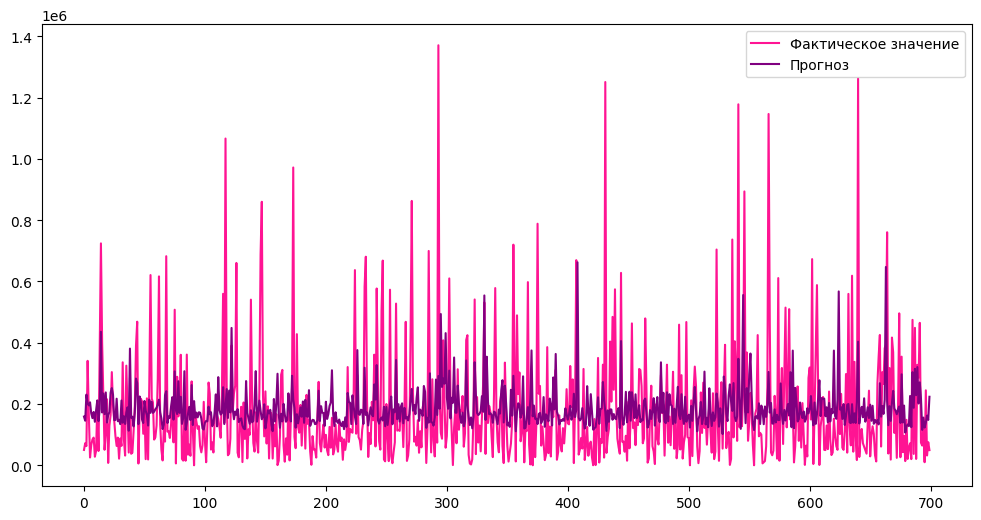

0:	learn: 235905.6757652	total: 1.34ms	remaining: 187ms
1:	learn: 235478.4567023	total: 2.9ms	remaining: 202ms
2:	learn: 234938.4702930	total: 3.96ms	remaining: 182ms
3:	learn: 234572.9340588	total: 4.81ms	remaining: 165ms
4:	learn: 234176.4517313	total: 5.69ms	remaining: 155ms
5:	learn: 233754.6999063	total: 6.63ms	remaining: 149ms
6:	learn: 233306.1281693	total: 7.51ms	remaining: 144ms
7:	learn: 232932.6072471	total: 8.34ms	remaining: 139ms
8:	learn: 232583.0301082	total: 9.12ms	remaining: 134ms
9:	learn: 232252.4864718	total: 10ms	remaining: 131ms
10:	learn: 231752.5881515	total: 11ms	remaining: 130ms
11:	learn: 231382.2588335	total: 11.9ms	remaining: 127ms
12:	learn: 231079.1297762	total: 12.7ms	remaining: 125ms
13:	learn: 230746.7143196	total: 13.5ms	remaining: 122ms
14:	learn: 230417.9208488	total: 14.4ms	remaining: 121ms
15:	learn: 230103.5086836	total: 15.2ms	remaining: 119ms
16:	learn: 229811.5821097	total: 15.9ms	remaining: 116ms
17:	learn: 229527.7547519	total: 16.8ms	remain

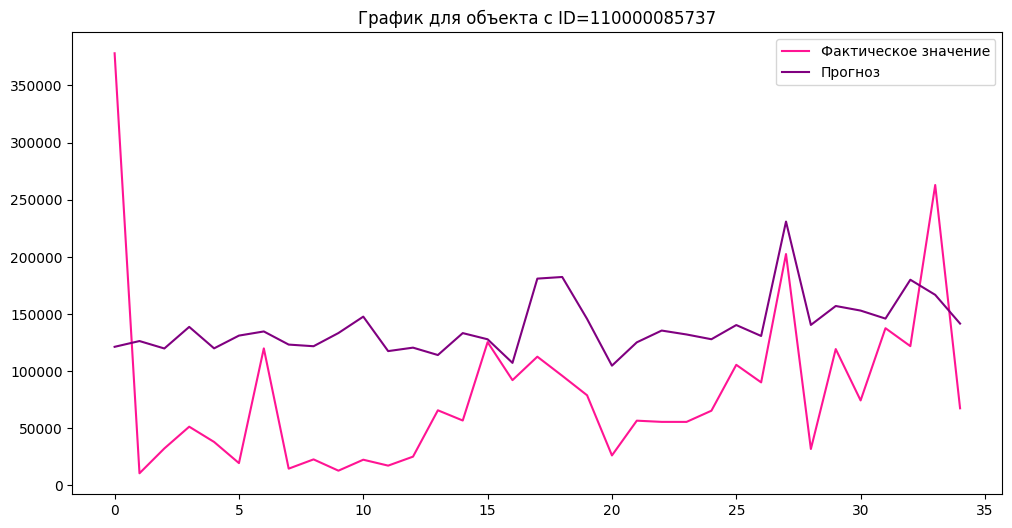

Лучшие гиперпараметры: {'learning_rate': 0.026057708295449688, 'depth': 3, 'iterations': 141, 'l2_leaf_reg': 0.9415248814220931, 'random_state': 11}
MAPE: 2.1392698272911892e+18


In [47]:
import pandas as pd
import numpy as np
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

data = pd.read_csv('1_train.csv')

print(data.head())
print(data.describe())

data['target'] = data['target'].shift(1, fill_value=0)

x = data.drop(['target'], axis=1)
y = data['target']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
        'random_state': trial.suggest_int('random_state', 0, 100)
    }

    model = CatBoostRegressor(**params)
    model.fit(x_train, y_train)
    predictions = model.predict(x_val)
    mape = mean_absolute_percentage_error(y_val, predictions)

    return mape

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_model = CatBoostRegressor(**best_params)
best_model.fit(x_train, y_train)

best_predictions = best_model.predict(x_val)
best_mape = mean_absolute_percentage_error(y_val, best_predictions)

plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Фактическое значение', color='deeppink')
plt.plot(best_predictions, label='Прогноз', color='purple')
plt.legend()
plt.show()



model_full = CatBoostRegressor(**best_params)
model_full.fit(x, y)

def plot_data_by_id(data, id):
    plt.figure(figsize=(12, 6))
    data_id = data[data['ID'] == id]
    plt.plot(data_id['target'].values, label='Фактическое значение', color='deeppink')
    predictions_id = model_full.predict(data_id.drop(columns=['target']))
    plt.plot(predictions_id, label='Прогноз', color='purple')
    plt.legend()
    plt.title(f'График для объекта с ID={id}')
    plt.show()

plot_data_by_id(data, 110000085737)
print(f'Лучшие гиперпараметры: {best_params}')
print(f'MAPE: {best_mape}')
